In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgbm
#from sklearn.experimental import enable_hist_gradient_boosting
#from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold
import optuna

import matplotlib.pyplot as plt
import seaborn as sns


import joblib
from pathlib import Path
from warnings import filterwarnings
filterwarnings('ignore')

/home/arma/miniforge3/envs/teachopencadd/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# Set path to this notebook
HERE = Path(_dh[-1])
HDAC1and6 = Path(HERE).resolve().parents[1]/'input'

In [3]:
df = pd.read_pickle(HDAC1and6/"HDAC1and6_1024B.csv")
df = df.sample(frac=1).reset_index(drop=True)
df.head(5)

,molecule_chembl_id,fp_MACCS,fp_Morgan3,fp_MorganF,fp_MAP4,SelectivityWindow
0,CHEMBL4550522,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, ...","[5547132, 2349897, 7998790, 3060600, 13538872,...",0.82
1,CHEMBL221655,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, ...","[3357707, 3346815, 1052992, 6116087, 30496230,...",-0.35
2,CHEMBL3339032,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, ...","[1705, 13925431, 5032800, 4181618, 729515, 693...",0.19
3,CHEMBL3670680,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...","[3568556, 3234227, 1578989, 11354240, 6804879,...",-0.94
4,CHEMBL3622727,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2060065, 2673342, 2475943, 1535176, 3310692, ...",-2.32


In [4]:
df_labeled = pd.read_csv(HDAC1and6/"HDAC1and6_SemiSel_dataset.csv", )
df_labeled

,molecule_chembl_id,smiles,type_HDAC1,Standard_Value_HDAC1,pChEMBL_HDAC1,type_HDAC6,Standard_Value_HDAC6,pChEMBL_HDAC6,SelectivityRatio,SelectivityWindow,label
0,CHEMBL4098975,O=C(CCCCCCC(=O)Nc1ccc(NCCCn2cc(-c3ncnc4[nH]ccc...,IC50,109.647820,6.96,IC50,0.141254,9.85,776.247117,2.89,HDAC6-selective
1,CHEMBL3912061,CS(=O)(=O)NCCc1cn(Cc2ccc(C(=O)NO)cc2)c2ccccc12,IC50,616.595002,6.21,IC50,0.169824,9.77,3630.780548,3.56,HDAC6-selective
2,CHEMBL4243347,O=C(CCCCCCC(=O)Nc1ccc(Nc2nc(-c3cn[nH]c3)c3cc[n...,IC50,1.995262,8.70,IC50,0.199526,9.70,10.000000,1.00,Dual-binder
3,CHEMBL4247128,C=CCCn1cc(-c2nc(Nc3ccc(NC(=O)CCCCCCC(=O)NO)cc3...,IC50,83.176377,7.08,IC50,0.251189,9.60,331.131122,2.52,HDAC6-selective
4,CHEMBL4126811,CC(C)(C)OC(=O)Nc1ccc(-c2cc(C(=O)NCc3ccc(C(=O)N...,IC50,436.515832,6.36,IC50,0.331131,9.48,1318.256739,3.12,HDAC6-selective
...,...,...,...,...,...,...,...,...,...,...,...
1905,CHEMBL4167599,NCCCCNCCCCNCCCN1C(=O)c2ccc3c4c(ccc(c24)C1=O)C(...,IC50,4073.802778,5.39,IC50,50.118723,7.30,81.283052,1.91,Semi-selective
1906,CHEMBL4282471,CC(=O)Nc1ccc(-c2ccnc(Nc3ccc(NC(=O)CCCCC(=O)NO)...,IC50,3388.441561,5.47,IC50,117.489756,6.93,28.840315,1.46,Semi-selective
1907,CHEMBL470843,O=C(/C=C/c1ccc(-c2cc(CN3CCOCC3)on2)cc1)NO,IC50,6309.573445,5.20,IC50,173.780083,6.76,36.307805,1.56,Semi-selective
1908,CHEMBL3215861,CCCCc1nc2cc(/C=C/C(=O)NO)ccc2n1CCN(CC)CC,Ki,28.183829,7.55,Ki,245.470892,6.61,0.114815,-0.94,Dual-binder


In [5]:
df = pd.merge(df, df_labeled[['molecule_chembl_id',  'label']], on='molecule_chembl_id')

In [6]:
df[df['label'] == 'Dual-binder']['SelectivityWindow'].max()

1.0

In [7]:
#df['Classes'] = np.where(df['label']== 'hDAC1-selective', 2)
df['Class'] = np.zeros(len(df))

df.loc[df[df.label == 'hDAC1-selective'].index, "Class"] = 1.0
df.loc[df[df.label == 'hDAC6-selective'].index, "Class"] = 2.0
df.loc[df[df.label == 'Dual-binder'].index, "Class"] = 3.0
df.loc[df[df.label == 'Non-binder'].index, "Class"] = 4.0

df.head(4)

,molecule_chembl_id,fp_MACCS,fp_Morgan3,fp_MorganF,fp_MAP4,SelectivityWindow,label,Class
0,CHEMBL4550522,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, ...","[5547132, 2349897, 7998790, 3060600, 13538872,...",0.82,Dual-binder,3.0
1,CHEMBL221655,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, ...","[3357707, 3346815, 1052992, 6116087, 30496230,...",-0.35,Dual-binder,3.0
2,CHEMBL3339032,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, ...","[1705, 13925431, 5032800, 4181618, 729515, 693...",0.19,Dual-binder,3.0
3,CHEMBL3670680,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, ...","[3568556, 3234227, 1578989, 11354240, 6804879,...",-0.94,Non-binder,4.0


In [8]:
# Add column for selectivity
df["selectivity"] = np.zeros(len(df))

# Mark every molecule as selective if SelectivityWindow is >=2 or >=-2, 0 otherwise
df.loc[df[df.SelectivityWindow >= 2.0].index, "selectivity"] = 1.0
df.loc[df[df.SelectivityWindow <= -2.0].index, "selectivity"] = 1.0
#By using Morgan fingerprints with radius of 3 and 1024 bits
indices =  np.array(df.index)
X = np.array(list((df['fp_Morgan3']))).astype(float)
#X.shape
Y = df["SelectivityWindow"].values
Y_cat =  df["selectivity"].values
Y_class = df['Class'].values

In [9]:
NUMS = 10
random_state= [146736, 1367, 209056, 1847464, 89563, 967034, 3689, 689547, 578929, 7458910]
X_tr_all = []
Y_tr_all = []
X_te_all = []
Y_te_all = []
Y_tr_class_all = []
Y_te_class_all = []
index_tr_all= []
index_te_all = []

for i in range(NUMS):
    X_tr, X_te, Y_tr, Y_te, Y_tr_class, Y_te_class, index_tr, index_te = train_test_split(X, Y, Y_class,indices, test_size=0.2, random_state=random_state[i], stratify=Y_class)
    X_tr_all.append(X_tr)
    Y_tr_all.append(Y_tr)
    X_te_all.append(X_te)
    Y_te_all.append(Y_te)
    Y_tr_class_all.append(Y_tr_class)
    Y_te_class_all.append(Y_te_class)
    index_tr_all.append(index_tr)
    index_te_all.append(index_te)
globals_dict = globals()
    
for i in range(0, len(index_te_all)):
    globals_dict[f"trainSet{i}"] = df.iloc[index_tr_all[i]]
    globals_dict[f"testSet{i}"] = df.iloc[index_te_all[i]]
    globals_dict[f"trainindex{i}"] = df.index[index_tr_all[i]]
    globals_dict[f"testindex{i}"] = df.index[index_te_all[i]]  
    globals_dict[f"X_trainSet{i}"] = np.array(list(df.iloc[index_tr_all[i]]['fp_Morgan3'])).astype(float)
    globals_dict[f"Y_trainSet{i}"] = np.array(list(df.iloc[index_tr_all[i]]['SelectivityWindow'])).astype(float)
    globals_dict[f"Y_trainSet{i}_cat"] = np.array(list(df.iloc[index_tr_all[i]]['selectivity'])).astype(float)
    globals_dict[f"Y_trainSet{i}_class"] = np.array(list(df.iloc[index_tr_all[i]]['Class'])).astype(float)
    globals_dict[f"X_testSet{i}"] = np.array(list(df.iloc[index_te_all[i]]['fp_Morgan3'])).astype(float)
    globals_dict[f"Y_testSet{i}"] = np.array(list(df.iloc[index_te_all[i]]['SelectivityWindow'])).astype(float)
    globals_dict[f"Y_testSet{i}_cat"] = np.array(list(df.iloc[index_te_all[i]]['selectivity'])).astype(float)
    globals_dict[f"Y_testSet{i}_class"] = np.array(list(df.iloc[index_te_all[i]]['Class'])).astype(float)
    

In [10]:
import sklearn.metrics
import math

def matrix_metrix(real_values,pred_values,beta):

    CM = confusion_matrix(real_values,pred_values)
    TN = CM[0][0]
    FN = CM[1][0] 
    TP = CM[1][1]
    FP = CM[0][1]
    Population = TN+FN+TP+FP
    Prevalence = round( (TP+FP) / Population,2)
    Accuracy   = round( (TP+TN) / Population,4)
    Precision  = round( TP / (TP+FP),4 )
    NPV        = round( TN / (TN+FN),4 )
    FDR        = round( FP / (TP+FP),4 )
    FOR        = round( FN / (TN+FN),4 ) 
    check_Pos  = Precision + FDR
    check_Neg  = NPV + FOR
    Recall     = round( TP / (TP+FN),4 )
    FPR        = round( FP / (TN+FP),4 )
    FNR        = round( FN / (TP+FN),4 )
    TNR        = round( TN / (TN+FP),4 ) 
    check_Pos2 = Recall + FNR
    check_Neg2 = FPR + TNR
    LRPos      = round( Recall/FPR,4 ) 
    LRNeg      = round( FNR / TNR ,4 )
    DOR        = round( LRPos/LRNeg)
    BalancedAccuracy = round( 0.5*(Recall+TNR),4)
    F1         = round ( 2 * ((Precision*Recall)/(Precision+Recall)),4)   
    F1_weighted = round(f1_score(real_values, pred_values, average="weighted"), 4)
    F1_micro = round(f1_score(real_values, pred_values, average="micro"), 4)
    F1_macro = round(f1_score(real_values, pred_values, average="macro"), 4)
    FBeta      = round ( (1+beta**2)*((Precision*Recall)/((beta**2 * Precision)+ Recall)) ,4)
    MCC        = round ( ((TP*TN)-(FP*FN))/math.sqrt((TP+FP)*(TP+FN)*(TN+FP)*(TN+FN))  ,4)
    BM         = Recall+TNR-1
    MK         = Precision+NPV-1

    mat_met = pd.DataFrame({
    'Metric':['TP','TN','FP','FN','Prevalence','Accuracy','Precision','NPV','FDR','FOR','check_Pos',
              'check_Neg','Recall','FPR','FNR','TNR','check_Pos2','check_Neg2','LR+','LR-','DOR','BalancedAccuracy',
              'F1','F1_weighted','F1_micro', 'F1_macro', 'FBeta','MCC','BM','MK'],     
    'Value':[TP,TN,FP,FN,Prevalence,Accuracy,Precision,NPV,FDR,FOR,check_Pos,check_Neg,Recall,FPR,FNR,TNR,check_Pos2,check_Neg2,LRPos,LRNeg,DOR,BalancedAccuracy,F1,F1_weighted,F1_micro, F1_macro, FBeta,MCC,BM,MK]})  
    return (mat_met)


## Random Forest 

In [11]:
%%time

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1121218)

r2_scores = np.empty(10)
TP =np.empty(10)
TN = np.empty(10)
FP = np.empty(10)
FN = np.empty(10)
Accuracy = np.empty(10)
Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
f1_scores = np.empty(10)
f1_scores_W = np.empty(10)
f1_scores_M = np.empty(10)
BA_scores = np.empty(10)
MCC = np.empty(10)
NPV = np.empty(10)
ROC_AUC= np.empty(10)


for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        x_train, x_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]

        rf_reg =  RandomForestRegressor(random_state=1121218, max_features = None, n_jobs=4,oob_score=True,
                                           max_samples=0.8, )
        rf_reg.fit(x_train, y_train)
        y_pred = rf_reg.predict(x_test)  
        # r2 score of the regression model before evaluating categorical evaluation parameters
        r2_scores[idx] = r2_score(y_test, y_pred)
        # now convert the resuls to binary with cutoff 6.3
        y_test_cat = np.where( ((y_test>=2) | (y_test<= -2.0)), 1, 0) 
        y_pred_cat = np.where(((y_pred>=2) | (y_pred<= -2.0)), 1, 0)
        #calculate the evaluation results
        conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
        Precision[idx] = precision_score(y_test_cat, y_pred_cat)
        Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
        f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
        f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
        f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
        MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)



mat_met_rf = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       }) 
                    
print(mat_met_rf)

                 Metric  Value (average)  Value (std)
0                    R2         0.689245     0.071103
1                    TP        17.500000     2.273030
2                    TN        98.600000     1.173788
3                    FP         1.900000     1.100505
4                    FN        15.900000     2.726414
5              Accuracy         0.867074     0.021280
6             Precision         0.902773     0.051079
7           Sensitivity         0.524871     0.074117
8           Specificity         0.981110     0.010904
9              F1 score         0.661080     0.064462
10  F1 score (weighted)         0.853262     0.026337
11     F1 score (macro)         0.789183     0.038459
12    Balanced Accuracy         0.752990     0.037331
13                  MCC         0.620971     0.064955
14                  NPV         0.861520     0.020888
15              ROC_AUC         0.752990     0.037331
CPU times: user 1min 15s, sys: 168 ms, total: 1min 16s
Wall time: 21.1 s


In [12]:
import optuna  


def objective_rf_CV(trial, X, Y, Y_class):
    param_grid = {
    #min_samples_split : trial.suggest_int('min_samples_split', 2, 50)
    #min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 25)
    #max_depth = trial.suggest_int('max_depth', 1, 10000)
    #"max_features" : trial.suggest_categorical("max_features", [None]),
    #oob_score = trial.suggest_categorical('oob_score', ['True','False']),
    #max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 1, 10000)
    "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
    }
    
    

    cv_scores = np.empty(10)
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        x_train, x_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        rf = RandomForestRegressor(**param_grid, n_jobs=4, random_state=1121218, max_features = None, 
                                   oob_score=True,
                                   max_samples=0.8,) 
        
        rf.fit(x_train, y_train)
        y_pred = rf.predict(x_test)
        cv_scores[idx] = r2_score(y_test, y_pred)
      
    
    return np.mean(cv_scores)

In [13]:
def detailed_objective_rf_CV(trial,X, Y, Y_class):
    param_grid = {
    #min_samples_split : trial.suggest_int('min_samples_split', 2, 50)
    #min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 25)
    #max_depth = trial.suggest_int('max_depth', 1, 10000)
    #"max_features" : trial.suggest_categorical("max_features", [None]),
    #oob_score = trial.suggest_categorical('oob_score', ['True','False']),
    #max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 1, 10000)
    "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
    }
    
    
    r2_scores = np.empty(10)
    TP=np.empty(10)
    TN = np.empty(10)
    FP= np.empty(10)
    FN= np.empty(10)
    Accuracy = np.empty(10)
    Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
    Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
    Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
    f1_scores = np.empty(10)
    f1_scores_W=np.empty(10)
    f1_scores_M=np.empty(10)
    BA_scores = np.empty(10)
    MCC = np.empty(10)
    NPV = np.empty(10)
    ROC_AUC= np.empty(10)
    
    
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        rf = RandomForestRegressor(**param_grid, n_jobs=4, random_state=1121218, max_features = None, oob_score=True,
                                           max_samples=0.8,)
   
        #X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
        rf.fit(X_train, y_train)
        y_pred = rf.predict(X_test)
        # r2 score of the regression model before evaluating categorical evaluation parameters
        r2_scores[idx] = r2_score(y_test, y_pred)
        # convert to categorical values
        y_test_cat = np.where( ((y_test>=2) | (y_test<= -2.0)), 1, 0) 
        y_pred_cat = np.where(((y_pred>=2) | (y_pred<= -2.0)), 1, 0)
       
           
        #calculate parameters
        conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)      
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
        Precision[idx] = precision_score(y_test_cat, y_pred_cat)
        Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
        f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
        f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
        MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)

    mat_met = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })   
    
    return (mat_met)
    
  

In [14]:
#Execute optuna and set hyperparameters
study_rf = optuna.create_study(direction='maximize', study_name="RFRegressor")
func_rf_0 = lambda trial: objective_rf_CV(trial, X_trainSet0, Y_trainSet0, Y_trainSet0_class)
study_rf.optimize(func_rf_0, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-19 15:47:14,322] A new study created in memory with name: RFRegressor
[I 2023-12-19 15:48:06,405] Trial 0 finished with value: 0.6863943445696583 and parameters: {'n_estimators': 320}. Best is trial 0 with value: 0.6863943445696583.
[I 2023-12-19 15:50:18,076] Trial 1 finished with value: 0.6864746129117472 and parameters: {'n_estimators': 797}. Best is trial 1 with value: 0.6864746129117472.
[I 2023-12-19 15:52:21,063] Trial 2 finished with value: 0.6863950803117922 and parameters: {'n_estimators': 642}. Best is trial 1 with value: 0.6864746129117472.
[I 2023-12-19 15:55:19,318] Trial 3 finished with value: 0.6870257557219486 and parameters: {'n_estimators': 904}. Best is trial 3 with value: 0.6870257557219486.
[I 2023-12-19 15:57:10,308] Trial 4 finished with value: 0.6866406481777363 and parameters: {'n_estimators': 572}. Best is trial 3 with value: 0.6870257557219486.
[I 2023-12-19 15:57:42,043] Trial 5 finished with value: 0.6855481457232355 and parameters: {'n_estimato

	Number of trials: 50.0
	Best value (r2_score): 0.6871
	Best params:
		n_estimators: 922


In [15]:
optimized_rf_0 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=4, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
 
data_testing = pd.DataFrame()    
    
optimized_rf_0.fit(X_trainSet0, Y_trainSet0,)

#predict        
y_pred_rf_0 = optimized_rf_0.predict(X_testSet0)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet0, y_pred_rf_0)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet0 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_rf_0_cat = np.where(((y_pred_rf_0 >= 2) | (y_pred_rf_0 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet0_cat, y_pred_rf_0_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet0_cat, y_pred_rf_0_cat)
Precision = precision_score(Y_testSet0_cat, y_pred_rf_0_cat)
Sensitivity = recall_score(Y_testSet0_cat, y_pred_rf_0_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet0_cat, y_pred_rf_0_cat)      
f1_scores_W = f1_score(Y_testSet0_cat, y_pred_rf_0_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet0_cat, y_pred_rf_0_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet0_cat, y_pred_rf_0_cat)
MCC = matthews_corrcoef(Y_testSet0_cat, y_pred_rf_0_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet0_cat, y_pred_rf_0_cat)
data_testing['y_test_idx0'] = testindex0
data_testing['y_test_Set0'] = Y_testSet0
data_testing['y_pred_Set0'] = y_pred_rf_0


mat_met_rf_test = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Set0':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
    
print(mat_met_rf_test)


                 Metric        Set0
0                    R2    0.685238
1                    TP   27.000000
2                    TN  200.000000
3                    FP    2.000000
4                    FN   39.000000
5              Accuracy    0.847015
6             Precision    0.931034
7           Sensitivity    0.409091
8           Specificity    0.990100
9              F1 score    0.568421
10  F1 score (weighted)    0.823641
11     F1 score (macro)    0.737725
12    Balanced Accuracy    0.699595
13                  MCC    0.553642
14                  NPV    0.836800
15              ROC_AUC    0.699595


In [16]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFRegressor_1")
func_rf_1 = lambda trial: objective_rf_CV(trial, X_trainSet1, Y_trainSet1, Y_trainSet1_class)
study_rf.optimize(func_rf_1, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-19 17:43:27,231] Trial 50 finished with value: 0.6650062214730194 and parameters: {'n_estimators': 858}. Best is trial 45 with value: 0.6870886734241599.
[I 2023-12-19 17:46:17,738] Trial 51 finished with value: 0.6649380661020325 and parameters: {'n_estimators': 910}. Best is trial 45 with value: 0.6870886734241599.
[I 2023-12-19 17:48:25,742] Trial 52 finished with value: 0.664941955635052 and parameters: {'n_estimators': 690}. Best is trial 45 with value: 0.6870886734241599.
[I 2023-12-19 17:51:13,355] Trial 53 finished with value: 0.665019072294076 and parameters: {'n_estimators': 878}. Best is trial 45 with value: 0.6870886734241599.
[I 2023-12-19 17:54:18,152] Trial 54 finished with value: 0.6657610123077536 and parameters: {'n_estimators': 995}. Best is trial 45 with value: 0.6870886734241599.
[I 2023-12-19 17:57:09,394] Trial 55 finished with value: 0.6651068650706653 and parameters: {'n_estimators': 918}. Best is trial 45 with value: 0.6870886734241599.
[I 2023-12-1

	Number of trials: 100.0
	Best value (r2_score): 0.6871
	Best params:
		n_estimators: 922


In [17]:
optimized_rf_1 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=4, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_1.fit(X_trainSet1, Y_trainSet1,)

#predict        
y_pred_rf_1 = optimized_rf_1.predict(X_testSet1)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet1, y_pred_rf_1)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet1 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_rf_1_cat = np.where(((y_pred_rf_1 >= 2) | (y_pred_rf_1 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet1_cat, y_pred_rf_1_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet1_cat, y_pred_rf_1_cat)
Precision = precision_score(Y_testSet1_cat, y_pred_rf_1_cat)
Sensitivity = recall_score(Y_testSet1_cat, y_pred_rf_1_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet1_cat, y_pred_rf_1_cat)      
f1_scores_W = f1_score(Y_testSet1_cat, y_pred_rf_1_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet1_cat, y_pred_rf_1_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet1_cat, y_pred_rf_1_cat)
MCC = matthews_corrcoef(Y_testSet1_cat, y_pred_rf_1_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet1_cat, y_pred_rf_1_cat)
data_testing['y_test_idx1'] = testindex1
data_testing['y_test_Set1'] = Y_testSet1
data_testing['y_pred_Set1'] = y_pred_rf_1


set1 = pd.DataFrame({ 'Set1':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_rf_test['Set1'] =set1
print(mat_met_rf_test)


                 Metric        Set0        Set1
0                    R2    0.685238    0.711248
1                    TP   27.000000   33.000000
2                    TN  200.000000  197.000000
3                    FP    2.000000    3.000000
4                    FN   39.000000   35.000000
5              Accuracy    0.847015    0.858209
6             Precision    0.931034    0.916667
7           Sensitivity    0.409091    0.485294
8           Specificity    0.990100    0.985000
9              F1 score    0.568421    0.634615
10  F1 score (weighted)    0.823641    0.841646
11     F1 score (macro)    0.737725    0.773326
12    Balanced Accuracy    0.699595    0.735147
13                  MCC    0.553642    0.600128
14                  NPV    0.836800    0.849100
15              ROC_AUC    0.699595    0.735147


In [18]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFRegressor_1")
func_rf_2 = lambda trial: objective_rf_CV(trial, X_trainSet2, Y_trainSet2, Y_trainSet2_class)
study_rf.optimize(func_rf_2, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-19 19:48:21,578] Trial 100 finished with value: 0.6904270604882713 and parameters: {'n_estimators': 898}. Best is trial 100 with value: 0.6904270604882713.
[I 2023-12-19 19:51:23,143] Trial 101 finished with value: 0.6904485120731224 and parameters: {'n_estimators': 930}. Best is trial 101 with value: 0.6904485120731224.
[I 2023-12-19 19:54:27,907] Trial 102 finished with value: 0.6904317829638156 and parameters: {'n_estimators': 936}. Best is trial 101 with value: 0.6904485120731224.
[I 2023-12-19 19:57:24,781] Trial 103 finished with value: 0.6902981889202078 and parameters: {'n_estimators': 910}. Best is trial 101 with value: 0.6904485120731224.
[I 2023-12-19 20:00:11,334] Trial 104 finished with value: 0.6902895238064768 and parameters: {'n_estimators': 865}. Best is trial 101 with value: 0.6904485120731224.
[I 2023-12-19 20:02:56,993] Trial 105 finished with value: 0.6900809128566434 and parameters: {'n_estimators': 854}. Best is trial 101 with value: 0.6904485120731224

	Number of trials: 150.0
	Best value (r2_score): 0.6918
	Best params:
		n_estimators: 635


In [19]:

optimized_rf_2 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=4, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_2.fit(X_trainSet2, Y_trainSet2,)

#predict        
y_pred_rf_2 = optimized_rf_2.predict(X_testSet2)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet2, y_pred_rf_2)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet2 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_rf_2_cat = np.where(((y_pred_rf_2 >= 2) | (y_pred_rf_2 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet2_cat, y_pred_rf_2_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet2_cat, y_pred_rf_2_cat)
Precision = precision_score(Y_testSet2_cat, y_pred_rf_2_cat)
Sensitivity = recall_score(Y_testSet2_cat, y_pred_rf_2_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet2_cat, y_pred_rf_2_cat)      
f1_scores_W = f1_score(Y_testSet2_cat, y_pred_rf_2_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet2_cat, y_pred_rf_2_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet2_cat, y_pred_rf_2_cat)
MCC = matthews_corrcoef(Y_testSet2_cat, y_pred_rf_2_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet2_cat, y_pred_rf_2_cat)
data_testing['y_test_idx2'] = testindex2
data_testing['y_test_Set2'] = Y_testSet2
data_testing['y_pred_Set2'] = y_pred_rf_2

set2 = pd.DataFrame({'Set2':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_rf_test['Set2'] =set2
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2
0                    R2    0.685238    0.711248    0.698779
1                    TP   27.000000   33.000000   34.000000
2                    TN  200.000000  197.000000  196.000000
3                    FP    2.000000    3.000000    4.000000
4                    FN   39.000000   35.000000   34.000000
5              Accuracy    0.847015    0.858209    0.858209
6             Precision    0.931034    0.916667    0.894737
7           Sensitivity    0.409091    0.485294    0.500000
8           Specificity    0.990100    0.985000    0.980000
9              F1 score    0.568421    0.634615    0.641509
10  F1 score (weighted)    0.823641    0.841646    0.843090
11     F1 score (macro)    0.737725    0.773326    0.776569
12    Balanced Accuracy    0.699595    0.735147    0.740000
13                  MCC    0.553642    0.600128    0.598763
14                  NPV    0.836800    0.849100    0.852200
15              ROC_AUC    0.699595    0

In [20]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFRegressor_1")
func_rf_3 = lambda trial: objective_rf_CV(trial, X_trainSet3, Y_trainSet3, Y_trainSet3_class)
study_rf.optimize(func_rf_3, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-19 21:43:00,022] Trial 150 finished with value: 0.6656234373694757 and parameters: {'n_estimators': 620}. Best is trial 138 with value: 0.6917909965989291.
[I 2023-12-19 21:44:45,972] Trial 151 finished with value: 0.665707236575979 and parameters: {'n_estimators': 571}. Best is trial 138 with value: 0.6917909965989291.
[I 2023-12-19 21:46:42,091] Trial 152 finished with value: 0.6656020261183226 and parameters: {'n_estimators': 628}. Best is trial 138 with value: 0.6917909965989291.
[I 2023-12-19 21:48:32,272] Trial 153 finished with value: 0.6657686081809958 and parameters: {'n_estimators': 601}. Best is trial 138 with value: 0.6917909965989291.
[I 2023-12-19 21:50:27,682] Trial 154 finished with value: 0.6655745483343282 and parameters: {'n_estimators': 637}. Best is trial 138 with value: 0.6917909965989291.
[I 2023-12-19 21:52:13,053] Trial 155 finished with value: 0.6657344951721004 and parameters: {'n_estimators': 572}. Best is trial 138 with value: 0.6917909965989291.

	Number of trials: 200.0
	Best value (r2_score): 0.6918
	Best params:
		n_estimators: 635


In [21]:
optimized_rf_3 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=4, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_3.fit(X_trainSet3, Y_trainSet3,)

#predict        
y_pred_rf_3 = optimized_rf_3.predict(X_testSet3)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet3, y_pred_rf_3)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet3 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_rf_3_cat = np.where(((y_pred_rf_3 >= 2) | (y_pred_rf_3 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet3_cat, y_pred_rf_3_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet3_cat, y_pred_rf_3_cat)
Precision = precision_score(Y_testSet3_cat, y_pred_rf_3_cat)
Sensitivity = recall_score(Y_testSet3_cat, y_pred_rf_3_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet3_cat, y_pred_rf_3_cat)      
f1_scores_W = f1_score(Y_testSet3_cat, y_pred_rf_3_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet3_cat, y_pred_rf_3_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet3_cat, y_pred_rf_3_cat)
MCC = matthews_corrcoef(Y_testSet3_cat, y_pred_rf_3_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet3_cat, y_pred_rf_3_cat)
data_testing['y_test_idx3'] = testindex3
data_testing['y_test_Set3'] = Y_testSet3
data_testing['y_pred_Set3'] = y_pred_rf_3


set3 = pd.DataFrame({'Set3':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set3'] =set3   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3
0                    R2    0.685238    0.711248    0.698779    0.683476
1                    TP   27.000000   33.000000   34.000000   38.000000
2                    TN  200.000000  197.000000  196.000000  197.000000
3                    FP    2.000000    3.000000    4.000000    2.000000
4                    FN   39.000000   35.000000   34.000000   31.000000
5              Accuracy    0.847015    0.858209    0.858209    0.876866
6             Precision    0.931034    0.916667    0.894737    0.950000
7           Sensitivity    0.409091    0.485294    0.500000    0.550725
8           Specificity    0.990100    0.985000    0.980000    0.989900
9              F1 score    0.568421    0.634615    0.641509    0.697248
10  F1 score (weighted)    0.823641    0.841646    0.843090    0.864667
11     F1 score (macro)    0.737725    0.773326    0.776569    0.809982
12    Balanced Accuracy    0.699595    0.735147    0.740000    0

In [22]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFRegressor_1")
func_rf_4 = lambda trial: objective_rf_CV(trial, X_trainSet4, Y_trainSet4, Y_trainSet4_class)
study_rf.optimize(func_rf_4, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-19 23:18:54,981] Trial 200 finished with value: 0.6688858324073903 and parameters: {'n_estimators': 590}. Best is trial 138 with value: 0.6917909965989291.
[I 2023-12-19 23:21:06,051] Trial 201 finished with value: 0.6686380763890893 and parameters: {'n_estimators': 679}. Best is trial 138 with value: 0.6917909965989291.
[I 2023-12-19 23:23:06,583] Trial 202 finished with value: 0.6681812934233813 and parameters: {'n_estimators': 632}. Best is trial 138 with value: 0.6917909965989291.
[I 2023-12-19 23:25:18,805] Trial 203 finished with value: 0.6686581840550924 and parameters: {'n_estimators': 686}. Best is trial 138 with value: 0.6917909965989291.
[I 2023-12-19 23:27:27,469] Trial 204 finished with value: 0.6684103620659279 and parameters: {'n_estimators': 662}. Best is trial 138 with value: 0.6917909965989291.
[I 2023-12-19 23:29:29,710] Trial 205 finished with value: 0.6682702804447114 and parameters: {'n_estimators': 644}. Best is trial 138 with value: 0.6917909965989291

	Number of trials: 250.0
	Best value (r2_score): 0.6918
	Best params:
		n_estimators: 635


In [23]:
optimized_rf_4 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=4, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_4.fit(X_trainSet4, Y_trainSet4,)

#predict        
y_pred_rf_4 = optimized_rf_4.predict(X_testSet4)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet4, y_pred_rf_4)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet4 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_rf_4_cat = np.where(((y_pred_rf_4 >= 2) | (y_pred_rf_4 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet4_cat, y_pred_rf_4_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet4_cat, y_pred_rf_4_cat)
Precision = precision_score(Y_testSet4_cat, y_pred_rf_4_cat)
Sensitivity = recall_score(Y_testSet4_cat, y_pred_rf_4_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet4_cat, y_pred_rf_4_cat)      
f1_scores_W = f1_score(Y_testSet4_cat, y_pred_rf_4_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet4_cat, y_pred_rf_4_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet4_cat, y_pred_rf_4_cat)
MCC = matthews_corrcoef(Y_testSet4_cat, y_pred_rf_4_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet4_cat, y_pred_rf_4_cat)
data_testing['y_test_idx4'] = testindex4
data_testing['y_test_Set4'] = Y_testSet4
data_testing['y_pred_Set4'] = y_pred_rf_4

set4 = pd.DataFrame({'Set4':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set4'] =set4   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.685238    0.711248    0.698779    0.683476   
1                    TP   27.000000   33.000000   34.000000   38.000000   
2                    TN  200.000000  197.000000  196.000000  197.000000   
3                    FP    2.000000    3.000000    4.000000    2.000000   
4                    FN   39.000000   35.000000   34.000000   31.000000   
5              Accuracy    0.847015    0.858209    0.858209    0.876866   
6             Precision    0.931034    0.916667    0.894737    0.950000   
7           Sensitivity    0.409091    0.485294    0.500000    0.550725   
8           Specificity    0.990100    0.985000    0.980000    0.989900   
9              F1 score    0.568421    0.634615    0.641509    0.697248   
10  F1 score (weighted)    0.823641    0.841646    0.843090    0.864667   
11     F1 score (macro)    0.737725    0.773326    0.776569    0.809982   
12    Balanced Accuracy  

In [24]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFRegressor_1")
func_rf_5 = lambda trial: objective_rf_CV(trial, X_trainSet5, Y_trainSet5, Y_trainSet5_class)
study_rf.optimize(func_rf_5, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 00:51:44,730] Trial 250 finished with value: 0.673427110779109 and parameters: {'n_estimators': 653}. Best is trial 138 with value: 0.6917909965989291.
[I 2023-12-20 00:53:13,694] Trial 251 finished with value: 0.6729466936100653 and parameters: {'n_estimators': 583}. Best is trial 138 with value: 0.6917909965989291.
[I 2023-12-20 00:54:48,186] Trial 252 finished with value: 0.6731924623368302 and parameters: {'n_estimators': 614}. Best is trial 138 with value: 0.6917909965989291.
[I 2023-12-20 00:56:27,106] Trial 253 finished with value: 0.6735359759760335 and parameters: {'n_estimators': 638}. Best is trial 138 with value: 0.6917909965989291.
[I 2023-12-20 00:58:05,433] Trial 254 finished with value: 0.6732420252982763 and parameters: {'n_estimators': 677}. Best is trial 138 with value: 0.6917909965989291.
[I 2023-12-20 00:59:47,534] Trial 255 finished with value: 0.6732706163849348 and parameters: {'n_estimators': 659}. Best is trial 138 with value: 0.6917909965989291.

	Number of trials: 300.0
	Best value (r2_score): 0.6918
	Best params:
		n_estimators: 635


In [25]:
optimized_rf_5 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=4, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_5.fit(X_trainSet5, Y_trainSet5,)

#predict        
y_pred_rf_5 = optimized_rf_5.predict(X_testSet5)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet5, y_pred_rf_5)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet5 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_rf_5_cat = np.where(((y_pred_rf_5 >= 2) | (y_pred_rf_5 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet5_cat, y_pred_rf_5_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet5_cat, y_pred_rf_5_cat)
Precision = precision_score(Y_testSet5_cat, y_pred_rf_5_cat)
Sensitivity = recall_score(Y_testSet5_cat, y_pred_rf_5_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet5_cat, y_pred_rf_5_cat)      
f1_scores_W = f1_score(Y_testSet5_cat, y_pred_rf_5_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet5_cat, y_pred_rf_5_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet5_cat, y_pred_rf_5_cat)
MCC = matthews_corrcoef(Y_testSet5_cat, y_pred_rf_5_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet5_cat, y_pred_rf_5_cat)
data_testing['y_test_idx5'] = testindex5
data_testing['y_test_Set5'] = Y_testSet5
data_testing['y_pred_Set5'] = y_pred_rf_5


Set5 = pd.DataFrame({'Set5':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set5'] =Set5   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.685238    0.711248    0.698779    0.683476   
1                    TP   27.000000   33.000000   34.000000   38.000000   
2                    TN  200.000000  197.000000  196.000000  197.000000   
3                    FP    2.000000    3.000000    4.000000    2.000000   
4                    FN   39.000000   35.000000   34.000000   31.000000   
5              Accuracy    0.847015    0.858209    0.858209    0.876866   
6             Precision    0.931034    0.916667    0.894737    0.950000   
7           Sensitivity    0.409091    0.485294    0.500000    0.550725   
8           Specificity    0.990100    0.985000    0.980000    0.989900   
9              F1 score    0.568421    0.634615    0.641509    0.697248   
10  F1 score (weighted)    0.823641    0.841646    0.843090    0.864667   
11     F1 score (macro)    0.737725    0.773326    0.776569    0.809982   
12    Balanced Accuracy  

In [26]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFRegressor_1")
func_rf_6 = lambda trial: objective_rf_CV(trial, X_trainSet6, Y_trainSet6, Y_trainSet6_class)
study_rf.optimize(func_rf_6, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 02:12:16,614] Trial 300 finished with value: 0.6613557957946947 and parameters: {'n_estimators': 623}. Best is trial 138 with value: 0.6917909965989291.
[I 2023-12-20 02:14:01,682] Trial 301 finished with value: 0.6617003563375847 and parameters: {'n_estimators': 668}. Best is trial 138 with value: 0.6917909965989291.
[I 2023-12-20 02:15:52,246] Trial 302 finished with value: 0.6617359341987348 and parameters: {'n_estimators': 721}. Best is trial 138 with value: 0.6917909965989291.
[I 2023-12-20 02:17:31,600] Trial 303 finished with value: 0.6613298460677043 and parameters: {'n_estimators': 642}. Best is trial 138 with value: 0.6917909965989291.
[I 2023-12-20 02:19:07,856] Trial 304 finished with value: 0.6612739355686938 and parameters: {'n_estimators': 609}. Best is trial 138 with value: 0.6917909965989291.
[I 2023-12-20 02:20:50,386] Trial 305 finished with value: 0.6615514495025021 and parameters: {'n_estimators': 661}. Best is trial 138 with value: 0.6917909965989291

	Number of trials: 350.0
	Best value (r2_score): 0.6918
	Best params:
		n_estimators: 635


In [27]:
optimized_rf_6 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=4, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_6.fit(X_trainSet6, Y_trainSet6,)

#predict        
y_pred_rf_6 = optimized_rf_6.predict(X_testSet6)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet6, y_pred_rf_6)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet6 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_rf_6_cat = np.where(((y_pred_rf_6 >= 2) | (y_pred_rf_6 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet6_cat, y_pred_rf_6_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet6_cat, y_pred_rf_6_cat)
Precision = precision_score(Y_testSet6_cat, y_pred_rf_6_cat)
Sensitivity = recall_score(Y_testSet6_cat, y_pred_rf_6_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet6_cat, y_pred_rf_6_cat)      
f1_scores_W = f1_score(Y_testSet6_cat, y_pred_rf_6_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet6_cat, y_pred_rf_6_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet6_cat, y_pred_rf_6_cat)
MCC = matthews_corrcoef(Y_testSet6_cat, y_pred_rf_6_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet6_cat, y_pred_rf_6_cat)
data_testing['y_test_idx6'] = testindex6
data_testing['y_test_Set6'] = Y_testSet6
data_testing['y_pred_Set6'] = y_pred_rf_6


Set6 = pd.DataFrame({'Set6':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set6'] =Set6   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.685238    0.711248    0.698779    0.683476   
1                    TP   27.000000   33.000000   34.000000   38.000000   
2                    TN  200.000000  197.000000  196.000000  197.000000   
3                    FP    2.000000    3.000000    4.000000    2.000000   
4                    FN   39.000000   35.000000   34.000000   31.000000   
5              Accuracy    0.847015    0.858209    0.858209    0.876866   
6             Precision    0.931034    0.916667    0.894737    0.950000   
7           Sensitivity    0.409091    0.485294    0.500000    0.550725   
8           Specificity    0.990100    0.985000    0.980000    0.989900   
9              F1 score    0.568421    0.634615    0.641509    0.697248   
10  F1 score (weighted)    0.823641    0.841646    0.843090    0.864667   
11     F1 score (macro)    0.737725    0.773326    0.776569    0.809982   
12    Balanced Accuracy  

In [28]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFRegressor_1")
func_rf_7 = lambda trial: objective_rf_CV(trial, X_trainSet7, Y_trainSet7, Y_trainSet7_class)
study_rf.optimize(func_rf_7, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 03:34:54,088] Trial 350 finished with value: 0.6883368685069984 and parameters: {'n_estimators': 637}. Best is trial 138 with value: 0.6917909965989291.
[I 2023-12-20 03:36:29,852] Trial 351 finished with value: 0.6884707209994941 and parameters: {'n_estimators': 666}. Best is trial 138 with value: 0.6917909965989291.
[I 2023-12-20 03:38:18,847] Trial 352 finished with value: 0.6883047854349572 and parameters: {'n_estimators': 722}. Best is trial 138 with value: 0.6917909965989291.
[I 2023-12-20 03:39:43,870] Trial 353 finished with value: 0.6879468009786953 and parameters: {'n_estimators': 570}. Best is trial 138 with value: 0.6917909965989291.
[I 2023-12-20 03:41:16,864] Trial 354 finished with value: 0.6882802829001705 and parameters: {'n_estimators': 621}. Best is trial 138 with value: 0.6917909965989291.
[I 2023-12-20 03:41:34,782] Trial 355 finished with value: 0.6841190436007629 and parameters: {'n_estimators': 116}. Best is trial 138 with value: 0.6917909965989291

	Number of trials: 400.0
	Best value (r2_score): 0.6918
	Best params:
		n_estimators: 635


In [29]:
optimized_rf_7 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=4, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_7.fit(X_trainSet7, Y_trainSet7,)

#predict        
y_pred_rf_7 = optimized_rf_7.predict(X_testSet7)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet7, y_pred_rf_7)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet7 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_rf_7_cat = np.where(((y_pred_rf_7 >= 2) | (y_pred_rf_7 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet7_cat, y_pred_rf_7_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet7_cat, y_pred_rf_7_cat)
Precision = precision_score(Y_testSet7_cat, y_pred_rf_7_cat)
Sensitivity = recall_score(Y_testSet7_cat, y_pred_rf_7_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet7_cat, y_pred_rf_7_cat)      
f1_scores_W = f1_score(Y_testSet7_cat, y_pred_rf_7_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet7_cat, y_pred_rf_7_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet7_cat, y_pred_rf_7_cat)
MCC = matthews_corrcoef(Y_testSet7_cat, y_pred_rf_7_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet7_cat, y_pred_rf_7_cat)
data_testing['y_test_idx7'] = testindex7
data_testing['y_test_Set7'] = Y_testSet7
data_testing['y_pred_Set7'] = y_pred_rf_7

Set7 = pd.DataFrame({'Set7':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set7'] =Set7   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.685238    0.711248    0.698779    0.683476   
1                    TP   27.000000   33.000000   34.000000   38.000000   
2                    TN  200.000000  197.000000  196.000000  197.000000   
3                    FP    2.000000    3.000000    4.000000    2.000000   
4                    FN   39.000000   35.000000   34.000000   31.000000   
5              Accuracy    0.847015    0.858209    0.858209    0.876866   
6             Precision    0.931034    0.916667    0.894737    0.950000   
7           Sensitivity    0.409091    0.485294    0.500000    0.550725   
8           Specificity    0.990100    0.985000    0.980000    0.989900   
9              F1 score    0.568421    0.634615    0.641509    0.697248   
10  F1 score (weighted)    0.823641    0.841646    0.843090    0.864667   
11     F1 score (macro)    0.737725    0.773326    0.776569    0.809982   
12    Balanced Accuracy  

In [30]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFRegressor_1")
func_rf_8 = lambda trial: objective_rf_CV(trial, X_trainSet8, Y_trainSet8, Y_trainSet8_class)
study_rf.optimize(func_rf_8, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 04:54:24,254] Trial 400 finished with value: 0.6945503000970982 and parameters: {'n_estimators': 609}. Best is trial 400 with value: 0.6945503000970982.
[I 2023-12-20 04:55:50,063] Trial 401 finished with value: 0.6941508161353108 and parameters: {'n_estimators': 581}. Best is trial 400 with value: 0.6945503000970982.
[I 2023-12-20 04:57:15,346] Trial 402 finished with value: 0.6940371292169263 and parameters: {'n_estimators': 560}. Best is trial 400 with value: 0.6945503000970982.
[I 2023-12-20 04:58:33,421] Trial 403 finished with value: 0.6937995596188818 and parameters: {'n_estimators': 536}. Best is trial 400 with value: 0.6945503000970982.
[I 2023-12-20 04:59:54,290] Trial 404 finished with value: 0.6937882072599083 and parameters: {'n_estimators': 543}. Best is trial 400 with value: 0.6945503000970982.
[I 2023-12-20 05:01:13,757] Trial 405 finished with value: 0.6939887552919694 and parameters: {'n_estimators': 529}. Best is trial 400 with value: 0.6945503000970982

	Number of trials: 450.0
	Best value (r2_score): 0.6946
	Best params:
		n_estimators: 609


In [31]:
optimized_rf_8 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=4, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_8.fit(X_trainSet8, Y_trainSet8,)

#predict        
y_pred_rf_8 = optimized_rf_8.predict(X_testSet8)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet8, y_pred_rf_8)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet8 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_rf_8_cat = np.where(((y_pred_rf_8 >= 2) | (y_pred_rf_8 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet8_cat, y_pred_rf_8_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet8_cat, y_pred_rf_8_cat)
Precision = precision_score(Y_testSet8_cat, y_pred_rf_8_cat)
Sensitivity = recall_score(Y_testSet8_cat, y_pred_rf_8_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet8_cat, y_pred_rf_8_cat)      
f1_scores_W = f1_score(Y_testSet8_cat, y_pred_rf_8_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet8_cat, y_pred_rf_8_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet8_cat, y_pred_rf_8_cat)
MCC = matthews_corrcoef(Y_testSet8_cat, y_pred_rf_8_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet8_cat, y_pred_rf_8_cat)
data_testing['y_test_idx8'] = testindex8
data_testing['y_test_Set8'] = Y_testSet8
data_testing['y_pred_Set8'] = y_pred_rf_8

Set8 = pd.DataFrame({'Set8':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set8'] =Set8   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.685238    0.711248    0.698779    0.683476   
1                    TP   27.000000   33.000000   34.000000   38.000000   
2                    TN  200.000000  197.000000  196.000000  197.000000   
3                    FP    2.000000    3.000000    4.000000    2.000000   
4                    FN   39.000000   35.000000   34.000000   31.000000   
5              Accuracy    0.847015    0.858209    0.858209    0.876866   
6             Precision    0.931034    0.916667    0.894737    0.950000   
7           Sensitivity    0.409091    0.485294    0.500000    0.550725   
8           Specificity    0.990100    0.985000    0.980000    0.989900   
9              F1 score    0.568421    0.634615    0.641509    0.697248   
10  F1 score (weighted)    0.823641    0.841646    0.843090    0.864667   
11     F1 score (macro)    0.737725    0.773326    0.776569    0.809982   
12    Balanced Accuracy  

In [32]:
#Execute optuna and set hyperparameters
#study_rf_1 = optuna.create_study(direction='maximize', study_name="RFRegressor_1")
func_rf_9 = lambda trial: objective_rf_CV(trial, X_trainSet9, Y_trainSet9, Y_trainSet9_class)
study_rf.optimize(func_rf_9, n_trials=50)  
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 05:56:02,243] Trial 450 finished with value: 0.6838757614033291 and parameters: {'n_estimators': 444}. Best is trial 400 with value: 0.6945503000970982.
[I 2023-12-20 05:57:08,420] Trial 451 finished with value: 0.6834990705207773 and parameters: {'n_estimators': 405}. Best is trial 400 with value: 0.6945503000970982.
[I 2023-12-20 05:58:05,439] Trial 452 finished with value: 0.6836806101202907 and parameters: {'n_estimators': 447}. Best is trial 400 with value: 0.6945503000970982.
[I 2023-12-20 05:58:59,411] Trial 453 finished with value: 0.6837510438119085 and parameters: {'n_estimators': 425}. Best is trial 400 with value: 0.6945503000970982.
[I 2023-12-20 05:59:57,384] Trial 454 finished with value: 0.6836162303012268 and parameters: {'n_estimators': 454}. Best is trial 400 with value: 0.6945503000970982.
[I 2023-12-20 06:00:49,268] Trial 455 finished with value: 0.6833540530807533 and parameters: {'n_estimators': 403}. Best is trial 400 with value: 0.6945503000970982

	Number of trials: 500.0
	Best value (r2_score): 0.6946
	Best params:
		n_estimators: 609


In [33]:
optimized_rf_9 = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=4, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )


#learn
        
optimized_rf_9.fit(X_trainSet9, Y_trainSet9,)

#predict        
y_pred_rf_9 = optimized_rf_9.predict(X_testSet9)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet9, y_pred_rf_9)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet9 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_rf_9_cat = np.where(((y_pred_rf_9 >= 2) | (y_pred_rf_9 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet9_cat, y_pred_rf_9_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet9_cat, y_pred_rf_9_cat)
Precision = precision_score(Y_testSet9_cat, y_pred_rf_9_cat)
Sensitivity = recall_score(Y_testSet9_cat, y_pred_rf_9_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet9_cat, y_pred_rf_9_cat)      
f1_scores_W = f1_score(Y_testSet9_cat, y_pred_rf_9_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet9_cat, y_pred_rf_9_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet9_cat, y_pred_rf_9_cat)
MCC = matthews_corrcoef(Y_testSet9_cat, y_pred_rf_9_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet9_cat, y_pred_rf_9_cat)
data_testing['y_test_idx9'] = testindex9
data_testing['y_test_Set9'] = Y_testSet9
data_testing['y_pred_Set9'] = y_pred_rf_9

Set9 = pd.DataFrame({'Set9':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
mat_met_rf_test['Set9'] =Set9   
print(mat_met_rf_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.685238    0.711248    0.698779    0.683476   
1                    TP   27.000000   33.000000   34.000000   38.000000   
2                    TN  200.000000  197.000000  196.000000  197.000000   
3                    FP    2.000000    3.000000    4.000000    2.000000   
4                    FN   39.000000   35.000000   34.000000   31.000000   
5              Accuracy    0.847015    0.858209    0.858209    0.876866   
6             Precision    0.931034    0.916667    0.894737    0.950000   
7           Sensitivity    0.409091    0.485294    0.500000    0.550725   
8           Specificity    0.990100    0.985000    0.980000    0.989900   
9              F1 score    0.568421    0.634615    0.641509    0.697248   
10  F1 score (weighted)    0.823641    0.841646    0.843090    0.864667   
11     F1 score (macro)    0.737725    0.773326    0.776569    0.809982   
12    Balanced Accuracy  

In [34]:
print(f"\tNumber of trials: {len(study_rf.trials):.1f}")
print(f"\tBest value (r2_score): {study_rf.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_rf.best_params.items():
    print(f"\t\t{key}: {value}")

	Number of trials: 500.0
	Best value (r2_score): 0.6946
	Best params:
		n_estimators: 609


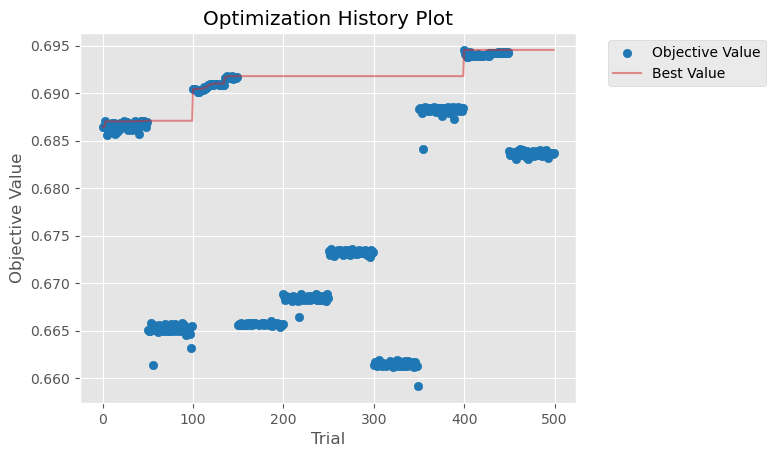

In [35]:
from optuna.visualization.matplotlib import plot_optimization_history

plot_optimization_history(study_rf);

In [36]:
detailed_objective_rf_CV(study_rf.best_trial, X, Y, Y_class)

,Metric,Value (average),Value (std)
0,R2,0.689422,0.074949
1,TP,17.300000,2.406011
2,TN,98.600000,1.173788
3,FP,1.900000,1.100505
4,FN,16.100000,2.884826
5,Accuracy,0.865576,0.022493
6,Precision,0.901852,0.051374
7,Sensitivity,0.518983,0.078566
8,Specificity,0.981110,0.010904
9,F1 score,0.655728,0.068184


In [37]:
mat_met_rf_test['ave'] = mat_met_rf_test.iloc[:,1:11].mean(axis='columns', numeric_only=True)
mat_met_rf_test['std'] = mat_met_rf_test.iloc[:,1:11].std(axis='columns', numeric_only=True)
mat_met_rf_test

,Metric,Set0,Set1,Set2,Set3,Set4,Set5,Set6,Set7,Set8,Set9,ave,std
0,R2,0.685238,0.711248,0.698779,0.683476,0.682063,0.698584,0.735695,0.615020,0.640357,0.673751,0.682421,0.034310
1,TP,27.000000,33.000000,34.000000,38.000000,37.000000,38.000000,36.000000,33.000000,33.000000,30.000000,33.900000,3.541814
2,TN,200.000000,197.000000,196.000000,197.000000,199.000000,198.000000,199.000000,195.000000,198.000000,199.000000,197.800000,1.549193
3,FP,2.000000,3.000000,4.000000,2.000000,3.000000,2.000000,1.000000,6.000000,2.000000,2.000000,2.700000,1.418136
4,FN,39.000000,35.000000,34.000000,31.000000,29.000000,30.000000,32.000000,34.000000,35.000000,37.000000,33.600000,3.134042
5,Accuracy,0.847015,0.858209,0.858209,0.876866,0.880597,0.880597,0.876866,0.850746,0.861940,0.854478,0.864552,0.012932
6,Precision,0.931034,0.916667,0.894737,0.950000,0.925000,0.950000,0.972973,0.846154,0.942857,0.937500,0.926692,0.035334
7,Sensitivity,0.409091,0.485294,0.500000,0.550725,0.560606,0.558824,0.529412,0.492537,0.485294,0.447761,0.501954,0.049458
8,Specificity,0.990100,0.985000,0.980000,0.989900,0.985100,0.990000,0.995000,0.970100,0.990000,0.990000,0.986520,0.007063
9,F1 score,0.568421,0.634615,0.641509,0.697248,0.698113,0.703704,0.685714,0.622642,0.640777,0.606061,0.649880,0.045258


In [38]:
#change to fit into these X values 

TP =np.empty(10)
TN = np.empty(10)
FP = np.empty(10)
FN = np.empty(10)


r2_scores_outer = []
Accuracy_outer = []
Precision_outer = [] #Also called Positive Predictive Value(PPV)
Sensitivity_outer = [] # Also called Recall or True Positive Rate (TPR)
Specificity_outer = [] #Also called selectivity or True Negative Rate  (TNR)
f1_scores_outer = []
f1_scores_W_outer = []
f1_scores_M_outer = []
BA_scores_outer = []
MCC_outer = []
NPV_outer = []
ROC_AUC_outer = []
data_rf=pd.DataFrame()

NUM_TRIALS = 5
random_state= [687266, 98656, 56, 280189, 76543] # 

for i in range(NUM_TRIALS):
    cv_change = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state[i])
    data_inner = pd.DataFrame({'y_test_idx': pd.Series(dtype='int'),
                   'y_test': pd.Series(dtype='float'),
                   'y_pred': pd.Series(dtype='float')})
    
    
    for idx, (train_idx, test_idx) in enumerate(cv_change.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        eval_set = [(X_train, y_train), (X_test, y_test)]
        optimizedCV_rf = RandomForestRegressor(n_estimators = study_rf.best_params['n_estimators'],
                                            n_jobs=4, 
                                            random_state=5, 
                                            max_features = None,
                                            oob_score=True,
                                            max_samples=0.8,
                                          )
        optimizedCV_rf.fit(X_train,
                          y_train, 
                          
                  )
        #print(test_idx)
        y_pred_optimized_rf = optimizedCV_rf.predict(X_test) 
        data_inner = data_inner.append(pd.DataFrame({'y_test_idx': test_idx, 'y_test': y_test, 'y_pred_rf': y_pred_optimized_rf } ), )
        data_inner.reset_index(inplace=True, drop=True) 
        data_inner.sort_values(by='y_test_idx', inplace=True) 
        
        y_test_cat = np.where(((y_test>=2) | (y_test<=-2)), 1, 0) 
        y_pred_optimized_rf_cat = np.where(((y_pred_optimized_rf >= 2) | (y_pred_optimized_rf <= -2)), 1, 0)
        
        conf_matrix = confusion_matrix(y_test_cat, y_pred_optimized_rf_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        
        r2_scores_outer.append(r2_score(y_test, y_pred_optimized_rf))
        Accuracy_outer.append(accuracy_score(y_test_cat, y_pred_optimized_rf_cat))
        Precision_outer.append(precision_score(y_test_cat, y_pred_optimized_rf_cat))
        Sensitivity_outer.append(recall_score(y_test_cat, y_pred_optimized_rf_cat))
        Specificity_outer.append(round( TN[idx] / (TN[idx]+FP[idx]),4 ))
        f1_scores_outer.append(f1_score(y_test_cat, y_pred_optimized_rf_cat))
        f1_scores_W_outer.append(f1_score(y_test_cat, y_pred_optimized_rf_cat, average="weighted"))
        f1_scores_M_outer.append(f1_score(y_test_cat, y_pred_optimized_rf_cat, average="macro"))
        BA_scores_outer.append(balanced_accuracy_score(y_test_cat, y_pred_optimized_rf_cat))
        MCC_outer.append(matthews_corrcoef(y_test_cat, y_pred_optimized_rf_cat))
        NPV_outer.append(round( TN[idx] / (TN[idx]+FN[idx]),4 ))
        ROC_AUC_outer.append(roc_auc_score(y_test_cat, y_pred_optimized_rf_cat))
    data_rf['y_test_idx' + str(i)] = data_inner['y_test_idx']
    data_rf['y_test' + str(i)] = data_inner['y_test']
    data_rf['y_pred_rf' + str(i)] = data_inner['y_pred_rf']
   # data_rf['correct' + str(i)] = correct_value
   # data_rf['pred' + str(i)] = y_pred_optimized_rf

mat_met_optimized_rf = pd.DataFrame({'Metric':['R2','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores_outer), np.mean(Accuracy_outer),np.mean(Precision_outer),
                                           np.mean(Sensitivity_outer),np.mean(Specificity_outer),np.mean(f1_scores_outer),
                                           np.mean(f1_scores_W_outer), np.mean(f1_scores_M_outer), np.mean(BA_scores_outer), 
                                           np.mean(MCC_outer),np.mean(NPV_outer),np.mean(ROC_AUC_outer)],
                        'Value (std)': [np.std(r2_scores_outer, ddof=1), np.std(Accuracy_outer, ddof=1),np.std(Precision_outer, ddof=1),
                                        np.std(Sensitivity_outer,ddof=1),np.std(Specificity_outer,ddof=1),np.std(f1_scores_outer, ddof=1),
                                        np.std(f1_scores_W_outer, ddof=1),np.std(f1_scores_M_outer, ddof=1), np.std(BA_scores_outer, ddof=1), 
                                        np.std(MCC_outer, ddof=1),np.std(NPV_outer, ddof=1),np.std(ROC_AUC_outer, ddof=1)]
                       }) 


rf_run0 = data_rf[['y_test_idx0', 'y_test0', 'y_pred_rf0']]
rf_run0.sort_values(by='y_test_idx0', inplace=True)
rf_run0.reset_index(inplace=True, drop=True)
rf_run1 = data_rf[['y_test_idx1', 'y_test1', 'y_pred_rf1']]
rf_run1.sort_values(by='y_test_idx1', inplace=True)
rf_run1.reset_index(inplace=True, drop=True)
rf_run2 = data_rf[['y_test_idx2', 'y_test2', 'y_pred_rf2']]
rf_run2.sort_values(by='y_test_idx2', inplace=True)
rf_run2.reset_index(inplace=True, drop=True)
rf_run3 = data_rf[['y_test_idx3', 'y_test3', 'y_pred_rf3']]
rf_run3.sort_values(by='y_test_idx3', inplace=True)
rf_run3.reset_index(inplace=True, drop=True)
rf_run4 = data_rf[['y_test_idx4', 'y_test4', 'y_pred_rf4']]
rf_run4.sort_values(by='y_test_idx4', inplace=True)
rf_run4.reset_index(inplace=True, drop=True)
chembl_id = df['molecule_chembl_id']
rf_5preds = pd.concat([chembl_id, rf_run0, rf_run1, rf_run2, rf_run3, rf_run4], axis=1)
rf_5preds = rf_5preds[['molecule_chembl_id', 'y_test_idx0', 'y_test0', 'y_pred_rf0', 'y_pred_rf1', 'y_pred_rf2', 'y_pred_rf3', 'y_pred_rf4']]
rf_5preds['y_pred_rf_ave'] = rf_5preds.iloc[:,2:11].mean(axis='columns', numeric_only=True)
rf_5preds['y_pred_rf_std'] = rf_5preds.iloc[:,2:].std(axis='columns', numeric_only=True)
# maybe also calculate the std for each value
mat_met_optimized_rf

,Metric,Value (average),Value (std)
0,R2,0.702569,0.055436
1,Accuracy,0.870351,0.023735
2,Precision,0.923268,0.050407
3,Sensitivity,0.523376,0.093296
4,Specificity,0.985484,0.009427
5,F1 score,0.663628,0.078671
6,F1 score (weighted),0.855867,0.029471
7,F1 score (macro),0.791607,0.046016
8,Balanced Accuracy,0.754429,0.046836
9,MCC,0.630638,0.075878


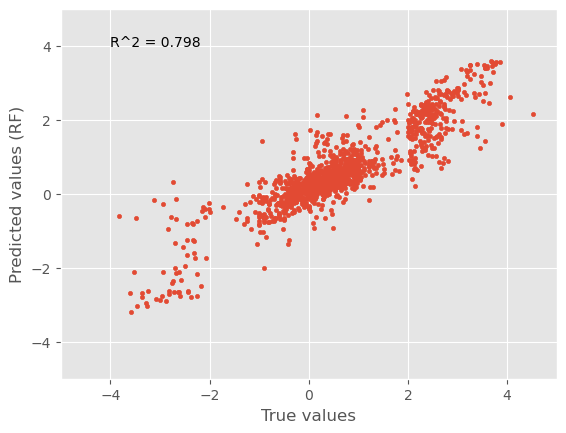

In [39]:
# Scatter plot

limits = -5,5
plt.figsize=(10,10)

plt.scatter(rf_5preds['y_test0'], rf_5preds['y_pred_rf_ave'], marker=".")
lin = np.linspace(*limits, 100)

plt.ylabel("Predicted values (RF)")
plt.xlabel("True values")

plt.xlim(limits)
plt.ylim(limits)

plt.annotate("R^2 = {:.3f}".format(r2_score(rf_5preds['y_test0'], rf_5preds['y_pred_rf_ave'])), (-4, 4))
plt.show()

In [40]:
#cross valide using this optimized RF 
rf_baseline_CVscore = cross_val_score(rf_reg, X, Y, cv=10, scoring="r2")
#rf_opt_testSet_score = cross_val_score(optimized_rf, X, Y, cv=10, scoring="r2")
rf_opt_CVscore = cross_val_score(optimizedCV_rf, X, Y, cv=10, scoring="r2")
print("RF baseline model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(rf_baseline_CVscore), np.std(rf_baseline_CVscore, ddof=1)))
#print("RF optimized model (tested on Y_te) r2_score %0.4f with a standard deviation of %0.4f" % (rf_opt_testSet_score.mean(), rf_opt_testSet_score.std()))
print("RF optimized model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(rf_opt_CVscore), np.std(rf_opt_CVscore, ddof=1)))

RF baseline model r2_score 0.7009 with a standard deviation of 0.0764
RF optimized model r2_score 0.7014 with a standard deviation of 0.0709


In [41]:
import joblib
joblib.dump(rf_reg, "OUTPUT/rf_reg.joblib")
#joblib.dump(optimized_rf, "OUTPUT/optimized_rf.joblib") # fitted to whole training set with last random_state selected
joblib.dump(optimizedCV_rf, "OUTPUT/optimizedCV_rf.joblib")

['OUTPUT/optimizedCV_rf.joblib']

## LGBMRegressor

In [42]:
%%time


r2_scores = np.empty(10)
TP=np.empty(10)
TN = np.empty(10)
FP= np.empty(10)
FN= np.empty(10)
Accuracy = np.empty(10)
Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
f1_scores = np.empty(10)
f1_scores_W=np.empty(10)
f1_scores_M = np.empty(10)
BA_scores = np.empty(10)
MCC = np.empty(10)
NPV = np.empty(10)
ROC_AUC= np.empty(10)

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1121218)

for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]

        
        lgbm_reg = lgbm.LGBMRegressor(
        objective="regression",
        random_state=1121218,
        #n_estimators=150,
        boosting_type ="gbdt",  # default histogram binning of LGBM,
        n_jobs=4,
        #min_child_samples = 15,
        subsample=0.8, # also called bagging_fraction
        subsample_freq=10,
     
           )


        eval_set = [(X_train, y_train), (X_test, y_test)]
        lgbm_reg.fit(
                    X_train,
                    y_train,
                    eval_set=eval_set,
                    eval_metric="rmse",
                    #early_stopping_rounds=150,
                    verbose=False,
                    )

        y_pred = lgbm_reg.predict(X_test) 
        # r2 score of the regression model before evaluating categorical evaluation parameters
        r2_scores[idx] = r2_score(y_test, y_pred)
        # now convert the resuls to binary with cutoff 6.3
        y_test_cat = np.where(((y_test>=2) | (y_test<=-2)), 1, 0) 
        y_pred_cat = np.where(((y_pred >= 2) | (y_pred <= -2)), 1, 0)
        #calculate the evaluation results
        conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
        Precision[idx] = precision_score(y_test_cat, y_pred_cat)
        Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
        f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
        f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
        f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
        MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)


mat_met_lgbm = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })  
print(mat_met_lgbm)

                 Metric  Value (average)  Value (std)
0                    R2         0.680184     0.062393
1                    TP        18.600000     2.756810
2                    TN        98.500000     1.354006
3                    FP         2.000000     1.154701
4                    FN        14.800000     3.293090
5              Accuracy         0.874554     0.027573
6             Precision         0.902831     0.053697
7           Sensitivity         0.558220     0.091265
8           Specificity         0.980100     0.011452
9              F1 score         0.686608     0.077634
10  F1 score (weighted)         0.862746     0.032640
11     F1 score (macro)         0.804073     0.047063
12    Balanced Accuracy         0.769159     0.047279
13                  MCC         0.643892     0.081040
14                  NPV         0.869900     0.026197
15              ROC_AUC         0.769159     0.047279
CPU times: user 6.68 s, sys: 84 ms, total: 6.77 s
Wall time: 1.74 s


In [43]:
import optuna  

def objective_lgbm_CV(trial, X, Y, Y_class):
    param_grid = {
        #"device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_int("n_estimators", 50, 900),
        "learning_rate": trial.suggest_float("learning_rate", 1e-4, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        #"min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 20, 100),
        "max_bin": trial.suggest_int("max_bin", 150, 300),
        #"min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        #"lambda_l1": trial.suggest_float("lambda_l1", 0, 0.001),
        #"lambda_l2": trial.suggest_float("lambda_l2", 1.0,100),
        "num_leaves": trial.suggest_int("num_leaves", 30, 750),
        #"min_child_samples": trial.suggest_int("min_child_samples", 15, 100),
        #"min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        #"bagging_fraction": trial.suggest_float("bagging_fraction", 0.6,1),
        #"bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        }
  
    
    
    
    cv_scores=np.empty(10)
    
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        lgbm_model = lgbm.LGBMRegressor(objective="regression", 
                                            random_state=1121218, 
                                            boosting_type ="gbdt", 
                                            **param_grid, n_jobs=4,
                                            subsample=0.8, # also called bagging_fraction
                                            subsample_freq=10,
                                         )
    
        eval_set = [(X_train, y_train), (X_test, y_test)]
        lgbm_model.fit(
                X_train,
                y_train,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        y_pred = lgbm_model.predict(X_test)
        cv_scores[idx] = r2_score(y_test, y_pred)
       
        
    return np.mean(cv_scores)

In [44]:
#this is basically inner set parameters
def detailed_objective_lgbm_cv(trial, X, Y, Y_class):
    param_grid = {
        #"device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_int("n_estimators", 50, 900),
        "learning_rate": trial.suggest_float("learning_rate", 1e-4, 0.2),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        #"min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 20, 100),
        "max_bin": trial.suggest_int("max_bin", 150, 300),
        #"min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        #"lambda_l1": trial.suggest_float("lambda_l1", 0, 0.001),
        #"lambda_l2": trial.suggest_float("lambda_l2", 1.0,100),
        "num_leaves": trial.suggest_int("num_leaves", 30, 750),
        #"min_child_samples": trial.suggest_int("min_child_samples", 15, 100),
        #"min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
        #"bagging_fraction": trial.suggest_float("bagging_fraction", 0.6,1),
        #"bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
        
    }
    
    
    
    
    
    r2_scores = np.empty(10)
    TP=np.empty(10)
    TN = np.empty(10)
    FP= np.empty(10)
    FN= np.empty(10)
    Accuracy = np.empty(10)
    Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
    Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
    Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
    f1_scores = np.empty(10)
    f1_scores_W = np.empty(10)
    f1_scores_M =np.empty(10)
    BA_scores = np.empty(10)
    MCC = np.empty(10)
    NPV = np.empty(10)
    ROC_AUC= np.empty(10)
    
    
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        lgbm_model = lgbm.LGBMRegressor(objective="regression", 
                                            random_state=1121218, 
                                            boosting_type ="gbdt", 
                                            **param_grid, n_jobs=4,
                                            subsample=0.8, # also called bagging_fraction
                                            subsample_freq=10,
                                         )
    
        eval_set = [(X_train, y_train), (X_test, y_test)]
        lgbm_model.fit(
                X_train,
                y_train,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        y_pred = lgbm_model.predict(X_test)
         # r2 score of the regression model before evaluating categorical evaluation parameters
        r2_scores[idx] = r2_score(y_test, y_pred)
        # now convert the resuls to binary with cutoff 6.3
        y_test_cat = np.where(((y_test>=2) | (y_test<=-2)), 1, 0) 
        y_pred_cat = np.where(((y_pred >= 2) | (y_pred <= -2)), 1, 0)
        #calculate the evaluation results
        conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
        Precision[idx] = precision_score(y_test_cat, y_pred_cat)
        Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
        f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
        f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
        MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)


    mat_met = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [ np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })  
    print(mat_met)

In [45]:
#Execute optuna and set hyperparameters
study_lgbm = optuna.create_study(direction='maximize', study_name="lgbmRegressor")
func_lgbm_0 = lambda trial: objective_lgbm_CV(trial, X_trainSet0, Y_trainSet0, Y_trainSet0_class)
study_lgbm.optimize(func_lgbm_0, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 06:53:35,389] A new study created in memory with name: lgbmRegressor
[I 2023-12-20 06:53:36,941] Trial 0 finished with value: 0.6734305039855422 and parameters: {'n_estimators': 342, 'learning_rate': 0.1427494247912503, 'max_depth': 9, 'max_bin': 298, 'num_leaves': 557}. Best is trial 0 with value: 0.6734305039855422.
[I 2023-12-20 06:53:38,171] Trial 1 finished with value: 0.6675669632972875 and parameters: {'n_estimators': 134, 'learning_rate': 0.11232944732508023, 'max_depth': 8, 'max_bin': 199, 'num_leaves': 224}. Best is trial 0 with value: 0.6734305039855422.
[I 2023-12-20 06:53:40,052] Trial 2 finished with value: 0.6711336450284485 and parameters: {'n_estimators': 540, 'learning_rate': 0.08619065143833218, 'max_depth': 8, 'max_bin': 295, 'num_leaves': 267}. Best is trial 0 with value: 0.6734305039855422.
[I 2023-12-20 06:53:41,141] Trial 3 finished with value: 0.6573893745063785 and parameters: {'n_estimators': 105, 'learning_rate': 0.07160765992923751, 'max_depth

	Number of trials: 50.0
	Best value (r2_score): 0.6893
	Best params:
		n_estimators: 308
		learning_rate: 0.18451558747223668
		max_depth: 12
		max_bin: 248
		num_leaves: 670


In [46]:
optimized_lgbm_0 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )
                                         
    
eval_set = [(X_testSet0, Y_testSet0)]
optimized_lgbm_0.fit(X_trainSet0,
                Y_trainSet0,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )

#predict        
y_pred_lgbm_0 = optimized_lgbm_0.predict(X_testSet0)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet0, y_pred_lgbm_0)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet1 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_lgbm_0_cat = np.where(((y_pred_lgbm_0 >= 2) | (y_pred_lgbm_0 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet0_cat, y_pred_lgbm_0_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet0_cat, y_pred_lgbm_0_cat)
Precision = precision_score(Y_testSet0_cat, y_pred_lgbm_0_cat)
Sensitivity = recall_score(Y_testSet0_cat, y_pred_lgbm_0_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet0_cat, y_pred_lgbm_0_cat)      
f1_scores_W = f1_score(Y_testSet0_cat, y_pred_lgbm_0_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet0_cat, y_pred_lgbm_0_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet0_cat, y_pred_lgbm_0_cat)
MCC = matthews_corrcoef(Y_testSet0_cat, y_pred_lgbm_0_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet0_cat, y_pred_lgbm_0_cat)


mat_met_lgbm_test = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Set0':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    
    
print(mat_met_lgbm_test)



                 Metric        Set0
0                    R2    0.708945
1                    TP   34.000000
2                    TN  201.000000
3                    FP    1.000000
4                    FN   32.000000
5              Accuracy    0.876866
6             Precision    0.971429
7           Sensitivity    0.515152
8           Specificity    0.995000
9              F1 score    0.673267
10  F1 score (weighted)    0.862356
11     F1 score (macro)    0.798703
12    Balanced Accuracy    0.755101
13                  MCC    0.652344
14                  NPV    0.862700
15              ROC_AUC    0.755101


In [47]:
#Execute optuna and set hyperparameters

func_lgbm_1 = lambda trial: objective_lgbm_CV(trial, X_trainSet1, Y_trainSet1, Y_trainSet1_class)
study_lgbm.optimize(func_lgbm_1, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 06:54:41,302] Trial 50 finished with value: 0.6438247368040639 and parameters: {'n_estimators': 407, 'learning_rate': 0.17435532434802736, 'max_depth': 4, 'max_bin': 251, 'num_leaves': 94}. Best is trial 7 with value: 0.6893429214347069.
[I 2023-12-20 06:54:42,417] Trial 51 finished with value: 0.6744248657321634 and parameters: {'n_estimators': 318, 'learning_rate': 0.1930800282943822, 'max_depth': 12, 'max_bin': 242, 'num_leaves': 210}. Best is trial 7 with value: 0.6893429214347069.
[I 2023-12-20 06:54:43,526] Trial 52 finished with value: 0.6702450985897658 and parameters: {'n_estimators': 301, 'learning_rate': 0.17051807936351754, 'max_depth': 11, 'max_bin': 263, 'num_leaves': 182}. Best is trial 7 with value: 0.6893429214347069.
[I 2023-12-20 06:54:44,582] Trial 53 finished with value: 0.6623906258287502 and parameters: {'n_estimators': 351, 'learning_rate': 0.17885589081001474, 'max_depth': 12, 'max_bin': 230, 'num_leaves': 235}. Best is trial 7 with value: 0.68934

	Number of trials: 100.0
	Best value (r2_score): 0.6893
	Best params:
		n_estimators: 308
		learning_rate: 0.18451558747223668
		max_depth: 12
		max_bin: 248
		num_leaves: 670


In [48]:
optimized_lgbm_1 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )
    
eval_set = [(X_testSet1, Y_testSet1)]
optimized_lgbm_1.fit(X_trainSet1,
                Y_trainSet1,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )

#predict        
y_pred_lgbm_1 = optimized_lgbm_1.predict(X_testSet1)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet1, y_pred_lgbm_1)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet1 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_lgbm_1_cat = np.where(((y_pred_lgbm_1 >= 2) | (y_pred_lgbm_1 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet1_cat, y_pred_lgbm_1_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet1_cat, y_pred_lgbm_1_cat)
Precision = precision_score(Y_testSet1_cat, y_pred_lgbm_1_cat)
Sensitivity = recall_score(Y_testSet1_cat, y_pred_lgbm_1_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet1_cat, y_pred_lgbm_1_cat)      
f1_scores_W = f1_score(Y_testSet1_cat, y_pred_lgbm_1_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet1_cat, y_pred_lgbm_1_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet1_cat, y_pred_lgbm_1_cat)
MCC = matthews_corrcoef(Y_testSet1_cat, y_pred_lgbm_1_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet1_cat, y_pred_lgbm_1_cat)


set1 = pd.DataFrame({ 'Set1':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set1'] =set1
print(mat_met_lgbm_test)


                 Metric        Set0        Set1
0                    R2    0.708945    0.673766
1                    TP   34.000000   33.000000
2                    TN  201.000000  194.000000
3                    FP    1.000000    6.000000
4                    FN   32.000000   35.000000
5              Accuracy    0.876866    0.847015
6             Precision    0.971429    0.846154
7           Sensitivity    0.515152    0.485294
8           Specificity    0.995000    0.970000
9              F1 score    0.673267    0.616822
10  F1 score (weighted)    0.862356    0.831454
11     F1 score (macro)    0.798703    0.760626
12    Balanced Accuracy    0.755101    0.727647
13                  MCC    0.652344    0.561838
14                  NPV    0.862700    0.847200
15              ROC_AUC    0.755101    0.727647


In [49]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="lgbmRegressor_1")
func_lgbm_2 = lambda trial: objective_lgbm_CV(trial, X_trainSet2, Y_trainSet2, Y_trainSet2_class)
study_lgbm.optimize(func_lgbm_2, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 06:55:41,887] Trial 100 finished with value: 0.6727781048046029 and parameters: {'n_estimators': 569, 'learning_rate': 0.18858329986849878, 'max_depth': 12, 'max_bin': 209, 'num_leaves': 120}. Best is trial 7 with value: 0.6893429214347069.
[I 2023-12-20 06:55:43,301] Trial 101 finished with value: 0.6754858004712467 and parameters: {'n_estimators': 365, 'learning_rate': 0.1561278007080272, 'max_depth': 10, 'max_bin': 184, 'num_leaves': 368}. Best is trial 7 with value: 0.6893429214347069.
[I 2023-12-20 06:55:44,832] Trial 102 finished with value: 0.6738684377473042 and parameters: {'n_estimators': 456, 'learning_rate': 0.16277610011180804, 'max_depth': 12, 'max_bin': 174, 'num_leaves': 412}. Best is trial 7 with value: 0.6893429214347069.
[I 2023-12-20 06:55:46,340] Trial 103 finished with value: 0.6772091624570119 and parameters: {'n_estimators': 300, 'learning_rate': 0.14548735743936436, 'max_depth': 9, 'max_bin': 206, 'num_leaves': 340}. Best is trial 7 with value: 0.

	Number of trials: 150.0
	Best value (r2_score): 0.6933
	Best params:
		n_estimators: 681
		learning_rate: 0.17725588980199594
		max_depth: 12
		max_bin: 280
		num_leaves: 424


In [50]:
optimized_lgbm_2 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet2, Y_testSet2)]
optimized_lgbm_2.fit(X_trainSet2,
                Y_trainSet2,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_2 = optimized_lgbm_2.predict(X_testSet2)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet2, y_pred_lgbm_2)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet2 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_lgbm_2_cat = np.where(((y_pred_lgbm_2 >= 2) | (y_pred_lgbm_2 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet2_cat, y_pred_lgbm_2_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet2_cat, y_pred_lgbm_2_cat)
Precision = precision_score(Y_testSet2_cat, y_pred_lgbm_2_cat)
Sensitivity = recall_score(Y_testSet2_cat, y_pred_lgbm_2_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet2_cat, y_pred_lgbm_2_cat)      
f1_scores_W = f1_score(Y_testSet2_cat, y_pred_lgbm_2_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet2_cat, y_pred_lgbm_2_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet2_cat, y_pred_lgbm_2_cat)
MCC = matthews_corrcoef(Y_testSet2_cat, y_pred_lgbm_2_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet2_cat, y_pred_lgbm_2_cat)


Set2 = pd.DataFrame({ 'Set2':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set2'] = Set2
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2
0                    R2    0.708945    0.673766    0.671030
1                    TP   34.000000   33.000000   36.000000
2                    TN  201.000000  194.000000  197.000000
3                    FP    1.000000    6.000000    3.000000
4                    FN   32.000000   35.000000   32.000000
5              Accuracy    0.876866    0.847015    0.869403
6             Precision    0.971429    0.846154    0.923077
7           Sensitivity    0.515152    0.485294    0.529412
8           Specificity    0.995000    0.970000    0.985000
9              F1 score    0.673267    0.616822    0.672897
10  F1 score (weighted)    0.862356    0.831454    0.856119
11     F1 score (macro)    0.798703    0.760626    0.795656
12    Balanced Accuracy    0.755101    0.727647    0.757206
13                  MCC    0.652344    0.561838    0.634790
14                  NPV    0.862700    0.847200    0.860300
15              ROC_AUC    0.755101    0

In [51]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="lgbmRegressor_1")
func_lgbm_3 = lambda trial: objective_lgbm_CV(trial, X_trainSet3, Y_trainSet3, Y_trainSet3_class)
study_lgbm.optimize(func_lgbm_3, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 06:57:04,294] Trial 150 finished with value: 0.653295317297223 and parameters: {'n_estimators': 652, 'learning_rate': 0.1787421830186268, 'max_depth': 12, 'max_bin': 297, 'num_leaves': 417}. Best is trial 139 with value: 0.6933131199103784.
[I 2023-12-20 06:57:05,810] Trial 151 finished with value: 0.6539290925198226 and parameters: {'n_estimators': 738, 'learning_rate': 0.16828519324125227, 'max_depth': 12, 'max_bin': 287, 'num_leaves': 453}. Best is trial 139 with value: 0.6933131199103784.
[I 2023-12-20 06:57:07,593] Trial 152 finished with value: 0.6533749367848658 and parameters: {'n_estimators': 760, 'learning_rate': 0.1741920182545224, 'max_depth': 12, 'max_bin': 284, 'num_leaves': 434}. Best is trial 139 with value: 0.6933131199103784.
[I 2023-12-20 06:57:09,149] Trial 153 finished with value: 0.6464991697364864 and parameters: {'n_estimators': 862, 'learning_rate': 0.18203664089543545, 'max_depth': 12, 'max_bin': 282, 'num_leaves': 491}. Best is trial 139 with va

	Number of trials: 200.0
	Best value (r2_score): 0.6933
	Best params:
		n_estimators: 681
		learning_rate: 0.17725588980199594
		max_depth: 12
		max_bin: 280
		num_leaves: 424


In [52]:
optimized_lgbm_3 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet3, Y_testSet3)]
optimized_lgbm_3.fit(X_trainSet3,
                Y_trainSet3,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_3 = optimized_lgbm_3.predict(X_testSet3)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet3, y_pred_lgbm_3)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet3 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_lgbm_3_cat = np.where(((y_pred_lgbm_3 >= 2) | (y_pred_lgbm_3 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet3_cat, y_pred_lgbm_3_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet3_cat, y_pred_lgbm_3_cat)
Precision = precision_score(Y_testSet3_cat, y_pred_lgbm_3_cat)
Sensitivity = recall_score(Y_testSet3_cat, y_pred_lgbm_3_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet3_cat, y_pred_lgbm_3_cat)      
f1_scores_W = f1_score(Y_testSet3_cat, y_pred_lgbm_3_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet3_cat, y_pred_lgbm_3_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet3_cat, y_pred_lgbm_3_cat)
MCC = matthews_corrcoef(Y_testSet3_cat, y_pred_lgbm_3_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet3_cat, y_pred_lgbm_3_cat)


Set3 = pd.DataFrame({ 'Set3':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set3'] = Set3
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3
0                    R2    0.708945    0.673766    0.671030    0.711722
1                    TP   34.000000   33.000000   36.000000   41.000000
2                    TN  201.000000  194.000000  197.000000  197.000000
3                    FP    1.000000    6.000000    3.000000    2.000000
4                    FN   32.000000   35.000000   32.000000   28.000000
5              Accuracy    0.876866    0.847015    0.869403    0.888060
6             Precision    0.971429    0.846154    0.923077    0.953488
7           Sensitivity    0.515152    0.485294    0.529412    0.594203
8           Specificity    0.995000    0.970000    0.985000    0.989900
9              F1 score    0.673267    0.616822    0.672897    0.732143
10  F1 score (weighted)    0.862356    0.831454    0.856119    0.878499
11     F1 score (macro)    0.798703    0.760626    0.795656    0.830694
12    Balanced Accuracy    0.755101    0.727647    0.757206    0

In [53]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="lgbmRegressor_1")
func_lgbm_4 = lambda trial: objective_lgbm_CV(trial, X_trainSet4, Y_trainSet4, Y_trainSet4_class)
study_lgbm.optimize(func_lgbm_4, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 06:58:18,397] Trial 200 finished with value: 0.6530129660690668 and parameters: {'n_estimators': 877, 'learning_rate': 0.17296830980293912, 'max_depth': 12, 'max_bin': 278, 'num_leaves': 621}. Best is trial 139 with value: 0.6933131199103784.
[I 2023-12-20 06:58:20,214] Trial 201 finished with value: 0.6516357981296726 and parameters: {'n_estimators': 801, 'learning_rate': 0.18544930235591048, 'max_depth': 12, 'max_bin': 272, 'num_leaves': 438}. Best is trial 139 with value: 0.6933131199103784.
[I 2023-12-20 06:58:21,901] Trial 202 finished with value: 0.6553404435722461 and parameters: {'n_estimators': 822, 'learning_rate': 0.1875801806874714, 'max_depth': 12, 'max_bin': 271, 'num_leaves': 428}. Best is trial 139 with value: 0.6933131199103784.
[I 2023-12-20 06:58:23,341] Trial 203 finished with value: 0.6602833113160246 and parameters: {'n_estimators': 843, 'learning_rate': 0.18009644956500628, 'max_depth': 12, 'max_bin': 276, 'num_leaves': 445}. Best is trial 139 with 

	Number of trials: 250.0
	Best value (r2_score): 0.6933
	Best params:
		n_estimators: 681
		learning_rate: 0.17725588980199594
		max_depth: 12
		max_bin: 280
		num_leaves: 424


In [54]:
optimized_lgbm_4 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet4, Y_testSet4)]
optimized_lgbm_4.fit(X_trainSet4,
                Y_trainSet4,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_4 = optimized_lgbm_4.predict(X_testSet4)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet4, y_pred_lgbm_4)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet4 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_lgbm_4_cat = np.where(((y_pred_lgbm_4 >= 2) | (y_pred_lgbm_4 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet4_cat, y_pred_lgbm_4_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet4_cat, y_pred_lgbm_4_cat)
Precision = precision_score(Y_testSet4_cat, y_pred_lgbm_4_cat)
Sensitivity = recall_score(Y_testSet4_cat, y_pred_lgbm_4_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet4_cat, y_pred_lgbm_4_cat)      
f1_scores_W = f1_score(Y_testSet4_cat, y_pred_lgbm_4_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet4_cat, y_pred_lgbm_4_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet4_cat, y_pred_lgbm_4_cat)
MCC = matthews_corrcoef(Y_testSet4_cat, y_pred_lgbm_4_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet4_cat, y_pred_lgbm_4_cat)


Set4 = pd.DataFrame({ 'Set4':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set4'] = Set4
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.708945    0.673766    0.671030    0.711722   
1                    TP   34.000000   33.000000   36.000000   41.000000   
2                    TN  201.000000  194.000000  197.000000  197.000000   
3                    FP    1.000000    6.000000    3.000000    2.000000   
4                    FN   32.000000   35.000000   32.000000   28.000000   
5              Accuracy    0.876866    0.847015    0.869403    0.888060   
6             Precision    0.971429    0.846154    0.923077    0.953488   
7           Sensitivity    0.515152    0.485294    0.529412    0.594203   
8           Specificity    0.995000    0.970000    0.985000    0.989900   
9              F1 score    0.673267    0.616822    0.672897    0.732143   
10  F1 score (weighted)    0.862356    0.831454    0.856119    0.878499   
11     F1 score (macro)    0.798703    0.760626    0.795656    0.830694   
12    Balanced Accuracy  

In [55]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="lgbmRegressor_1")
func_lgbm_5 = lambda trial: objective_lgbm_CV(trial, X_trainSet5, Y_trainSet5, Y_trainSet5_class)
study_lgbm.optimize(func_lgbm_5, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 06:59:36,792] Trial 250 finished with value: 0.6512107110803834 and parameters: {'n_estimators': 624, 'learning_rate': 0.17071130668317863, 'max_depth': 12, 'max_bin': 278, 'num_leaves': 456}. Best is trial 139 with value: 0.6933131199103784.
[I 2023-12-20 06:59:38,010] Trial 251 finished with value: 0.6519867825571541 and parameters: {'n_estimators': 169, 'learning_rate': 0.14831311823230267, 'max_depth': 11, 'max_bin': 243, 'num_leaves': 213}. Best is trial 139 with value: 0.6933131199103784.
[I 2023-12-20 06:59:39,101] Trial 252 finished with value: 0.6392264373216946 and parameters: {'n_estimators': 724, 'learning_rate': 0.18327399933294614, 'max_depth': 9, 'max_bin': 273, 'num_leaves': 399}. Best is trial 139 with value: 0.6933131199103784.
[I 2023-12-20 06:59:40,360] Trial 253 finished with value: 0.6452919132670323 and parameters: {'n_estimators': 688, 'learning_rate': 0.17910663185794948, 'max_depth': 12, 'max_bin': 264, 'num_leaves': 417}. Best is trial 139 with 

	Number of trials: 300.0
	Best value (r2_score): 0.6933
	Best params:
		n_estimators: 681
		learning_rate: 0.17725588980199594
		max_depth: 12
		max_bin: 280
		num_leaves: 424


In [56]:
optimized_lgbm_5 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet5, Y_testSet5)]
optimized_lgbm_5.fit(X_trainSet5,
                Y_trainSet5,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_5 = optimized_lgbm_5.predict(X_testSet5)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet5, y_pred_lgbm_5)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet5 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_lgbm_5_cat = np.where(((y_pred_lgbm_5 >= 2) | (y_pred_lgbm_5 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet5_cat, y_pred_lgbm_5_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet5_cat, y_pred_lgbm_5_cat)
Precision = precision_score(Y_testSet5_cat, y_pred_lgbm_5_cat)
Sensitivity = recall_score(Y_testSet5_cat, y_pred_lgbm_5_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet5_cat, y_pred_lgbm_5_cat)      
f1_scores_W = f1_score(Y_testSet5_cat, y_pred_lgbm_5_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet5_cat, y_pred_lgbm_5_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet5_cat, y_pred_lgbm_5_cat)
MCC = matthews_corrcoef(Y_testSet5_cat, y_pred_lgbm_5_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet5_cat, y_pred_lgbm_5_cat)


Set5 = pd.DataFrame({ 'Set5':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set5'] = Set5
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.708945    0.673766    0.671030    0.711722   
1                    TP   34.000000   33.000000   36.000000   41.000000   
2                    TN  201.000000  194.000000  197.000000  197.000000   
3                    FP    1.000000    6.000000    3.000000    2.000000   
4                    FN   32.000000   35.000000   32.000000   28.000000   
5              Accuracy    0.876866    0.847015    0.869403    0.888060   
6             Precision    0.971429    0.846154    0.923077    0.953488   
7           Sensitivity    0.515152    0.485294    0.529412    0.594203   
8           Specificity    0.995000    0.970000    0.985000    0.989900   
9              F1 score    0.673267    0.616822    0.672897    0.732143   
10  F1 score (weighted)    0.862356    0.831454    0.856119    0.878499   
11     F1 score (macro)    0.798703    0.760626    0.795656    0.830694   
12    Balanced Accuracy  

In [57]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="lgbmRegressor_1")
func_lgbm_6 = lambda trial: objective_lgbm_CV(trial, X_trainSet6, Y_trainSet6, Y_trainSet6_class)
study_lgbm.optimize(func_lgbm_6, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.6f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 07:00:53,948] Trial 300 finished with value: 0.65641461596413 and parameters: {'n_estimators': 422, 'learning_rate': 0.11477168844126676, 'max_depth': 10, 'max_bin': 186, 'num_leaves': 585}. Best is trial 139 with value: 0.6933131199103784.
[I 2023-12-20 07:00:55,824] Trial 301 finished with value: 0.6485595460466584 and parameters: {'n_estimators': 703, 'learning_rate': 0.174814670885208, 'max_depth': 12, 'max_bin': 232, 'num_leaves': 474}. Best is trial 139 with value: 0.6933131199103784.
[I 2023-12-20 07:00:57,596] Trial 302 finished with value: 0.654924038409926 and parameters: {'n_estimators': 323, 'learning_rate': 0.18756713373762163, 'max_depth': 12, 'max_bin': 278, 'num_leaves': 608}. Best is trial 139 with value: 0.6933131199103784.
[I 2023-12-20 07:00:58,660] Trial 303 finished with value: 0.63936803190994 and parameters: {'n_estimators': 669, 'learning_rate': 0.16725884213765008, 'max_depth': 6, 'max_bin': 272, 'num_leaves': 398}. Best is trial 139 with value: 

	Number of trials: 350.0
	Best value (r2_score): 0.693313
	Best params:
		n_estimators: 681
		learning_rate: 0.17725588980199594
		max_depth: 12
		max_bin: 280
		num_leaves: 424


In [58]:
optimized_lgbm_6 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet6, Y_testSet6)]
optimized_lgbm_6.fit(X_trainSet6,
                Y_trainSet6,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_6 = optimized_lgbm_6.predict(X_testSet6)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet6, y_pred_lgbm_6)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet6 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_lgbm_6_cat = np.where(((y_pred_lgbm_6 >= 2) | (y_pred_lgbm_6 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet6_cat, y_pred_lgbm_6_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet6_cat, y_pred_lgbm_6_cat)
Precision = precision_score(Y_testSet6_cat, y_pred_lgbm_6_cat)
Sensitivity = recall_score(Y_testSet6_cat, y_pred_lgbm_6_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet6_cat, y_pred_lgbm_6_cat)      
f1_scores_W = f1_score(Y_testSet6_cat, y_pred_lgbm_6_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet6_cat, y_pred_lgbm_6_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet6_cat, y_pred_lgbm_6_cat)
MCC = matthews_corrcoef(Y_testSet6_cat, y_pred_lgbm_6_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet6_cat, y_pred_lgbm_6_cat)


Set6 = pd.DataFrame({ 'Set6':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set6'] = Set6
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.708945    0.673766    0.671030    0.711722   
1                    TP   34.000000   33.000000   36.000000   41.000000   
2                    TN  201.000000  194.000000  197.000000  197.000000   
3                    FP    1.000000    6.000000    3.000000    2.000000   
4                    FN   32.000000   35.000000   32.000000   28.000000   
5              Accuracy    0.876866    0.847015    0.869403    0.888060   
6             Precision    0.971429    0.846154    0.923077    0.953488   
7           Sensitivity    0.515152    0.485294    0.529412    0.594203   
8           Specificity    0.995000    0.970000    0.985000    0.989900   
9              F1 score    0.673267    0.616822    0.672897    0.732143   
10  F1 score (weighted)    0.862356    0.831454    0.856119    0.878499   
11     F1 score (macro)    0.798703    0.760626    0.795656    0.830694   
12    Balanced Accuracy  

In [59]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="lgbmRegressor_1")
func_lgbm_7 = lambda trial: objective_lgbm_CV(trial, X_trainSet7, Y_trainSet7, Y_trainSet7_class)
study_lgbm.optimize(func_lgbm_7, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.7f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 07:02:14,000] Trial 350 finished with value: 0.6959005951249126 and parameters: {'n_estimators': 695, 'learning_rate': 0.18355222483593647, 'max_depth': 12, 'max_bin': 230, 'num_leaves': 377}. Best is trial 350 with value: 0.6959005951249126.
[I 2023-12-20 07:02:16,402] Trial 351 finished with value: 0.7011130985935945 and parameters: {'n_estimators': 704, 'learning_rate': 0.18207322485580765, 'max_depth': 12, 'max_bin': 228, 'num_leaves': 433}. Best is trial 351 with value: 0.7011130985935945.
[I 2023-12-20 07:02:18,422] Trial 352 finished with value: 0.7012570192905636 and parameters: {'n_estimators': 720, 'learning_rate': 0.19142464906098378, 'max_depth': 12, 'max_bin': 230, 'num_leaves': 403}. Best is trial 352 with value: 0.7012570192905636.
[I 2023-12-20 07:02:20,722] Trial 353 finished with value: 0.704754290920893 and parameters: {'n_estimators': 716, 'learning_rate': 0.19360057162963062, 'max_depth': 12, 'max_bin': 228, 'num_leaves': 387}. Best is trial 353 with 

	Number of trials: 400.0
	Best value (r2_score): 0.7127150
	Best params:
		n_estimators: 742
		learning_rate: 0.19954488235092985
		max_depth: 12
		max_bin: 221
		num_leaves: 336


In [60]:
optimized_lgbm_7 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet7, Y_testSet7)]
optimized_lgbm_7.fit(X_trainSet7,
                Y_trainSet7,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_7 = optimized_lgbm_7.predict(X_testSet7)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet7, y_pred_lgbm_7)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet7 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_lgbm_7_cat = np.where(((y_pred_lgbm_7 >= 2) | (y_pred_lgbm_7 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet7_cat, y_pred_lgbm_7_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet7_cat, y_pred_lgbm_7_cat)
Precision = precision_score(Y_testSet7_cat, y_pred_lgbm_7_cat)
Sensitivity = recall_score(Y_testSet7_cat, y_pred_lgbm_7_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet7_cat, y_pred_lgbm_7_cat)      
f1_scores_W = f1_score(Y_testSet7_cat, y_pred_lgbm_7_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet7_cat, y_pred_lgbm_7_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet7_cat, y_pred_lgbm_7_cat)
MCC = matthews_corrcoef(Y_testSet7_cat, y_pred_lgbm_7_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet7_cat, y_pred_lgbm_7_cat)


Set7 = pd.DataFrame({ 'Set7':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set7'] = Set7
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.708945    0.673766    0.671030    0.711722   
1                    TP   34.000000   33.000000   36.000000   41.000000   
2                    TN  201.000000  194.000000  197.000000  197.000000   
3                    FP    1.000000    6.000000    3.000000    2.000000   
4                    FN   32.000000   35.000000   32.000000   28.000000   
5              Accuracy    0.876866    0.847015    0.869403    0.888060   
6             Precision    0.971429    0.846154    0.923077    0.953488   
7           Sensitivity    0.515152    0.485294    0.529412    0.594203   
8           Specificity    0.995000    0.970000    0.985000    0.989900   
9              F1 score    0.673267    0.616822    0.672897    0.732143   
10  F1 score (weighted)    0.862356    0.831454    0.856119    0.878499   
11     F1 score (macro)    0.798703    0.760626    0.795656    0.830694   
12    Balanced Accuracy  

In [61]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="lgbmRegressor_1")
func_lgbm_8 = lambda trial: objective_lgbm_CV(trial, X_trainSet8, Y_trainSet8, Y_trainSet8_class)
study_lgbm.optimize(func_lgbm_8, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.8f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 07:03:50,012] Trial 400 finished with value: 0.6846438987392776 and parameters: {'n_estimators': 796, 'learning_rate': 0.19943313759511688, 'max_depth': 12, 'max_bin': 216, 'num_leaves': 326}. Best is trial 382 with value: 0.7127149507043422.
[I 2023-12-20 07:03:50,988] Trial 401 finished with value: 0.6812610523043222 and parameters: {'n_estimators': 766, 'learning_rate': 0.19995552643251827, 'max_depth': 12, 'max_bin': 219, 'num_leaves': 304}. Best is trial 382 with value: 0.7127149507043422.
[I 2023-12-20 07:03:52,086] Trial 402 finished with value: 0.6907844765627401 and parameters: {'n_estimators': 785, 'learning_rate': 0.19418964451030837, 'max_depth': 12, 'max_bin': 220, 'num_leaves': 336}. Best is trial 382 with value: 0.7127149507043422.
[I 2023-12-20 07:03:53,208] Trial 403 finished with value: 0.6833201806913073 and parameters: {'n_estimators': 765, 'learning_rate': 0.19977519657008733, 'max_depth': 12, 'max_bin': 216, 'num_leaves': 337}. Best is trial 382 with

	Number of trials: 450.0
	Best value (r2_score): 0.71271495
	Best params:
		n_estimators: 742
		learning_rate: 0.19954488235092985
		max_depth: 12
		max_bin: 221
		num_leaves: 336


In [62]:
optimized_lgbm_8 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet8, Y_testSet8)]
optimized_lgbm_8.fit(X_trainSet8,
                Y_trainSet8,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_8 = optimized_lgbm_8.predict(X_testSet8)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet8, y_pred_lgbm_8)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet8 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_lgbm_8_cat = np.where(((y_pred_lgbm_8 >= 2) | (y_pred_lgbm_8 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet8_cat, y_pred_lgbm_8_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet8_cat, y_pred_lgbm_8_cat)
Precision = precision_score(Y_testSet8_cat, y_pred_lgbm_8_cat)
Sensitivity = recall_score(Y_testSet8_cat, y_pred_lgbm_8_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet8_cat, y_pred_lgbm_8_cat)      
f1_scores_W = f1_score(Y_testSet8_cat, y_pred_lgbm_8_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet8_cat, y_pred_lgbm_8_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet8_cat, y_pred_lgbm_8_cat)
MCC = matthews_corrcoef(Y_testSet8_cat, y_pred_lgbm_8_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet8_cat, y_pred_lgbm_8_cat)


Set8 = pd.DataFrame({ 'Set8':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set8'] = Set8
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.708945    0.673766    0.671030    0.711722   
1                    TP   34.000000   33.000000   36.000000   41.000000   
2                    TN  201.000000  194.000000  197.000000  197.000000   
3                    FP    1.000000    6.000000    3.000000    2.000000   
4                    FN   32.000000   35.000000   32.000000   28.000000   
5              Accuracy    0.876866    0.847015    0.869403    0.888060   
6             Precision    0.971429    0.846154    0.923077    0.953488   
7           Sensitivity    0.515152    0.485294    0.529412    0.594203   
8           Specificity    0.995000    0.970000    0.985000    0.989900   
9              F1 score    0.673267    0.616822    0.672897    0.732143   
10  F1 score (weighted)    0.862356    0.831454    0.856119    0.878499   
11     F1 score (macro)    0.798703    0.760626    0.795656    0.830694   
12    Balanced Accuracy  

In [63]:
#Execute optuna and set hyperparameters
#study_lgbm_1 = optuna.create_study(direction='maximize', study_name="lgbmRegressor_1")
func_lgbm_9 = lambda trial: objective_lgbm_CV(trial, X_trainSet9, Y_trainSet9, Y_trainSet9_class)
study_lgbm.optimize(func_lgbm_9, n_trials=50)  
print(f"\tNumber of trials: {len(study_lgbm.trials):.1f}")
print(f"\tBest value (r2_score): {study_lgbm.best_value:.9f}")
print(f"\tBest params:")

for key, value in study_lgbm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 07:04:51,509] Trial 450 finished with value: 0.6912795796229696 and parameters: {'n_estimators': 815, 'learning_rate': 0.1999973490323622, 'max_depth': 12, 'max_bin': 210, 'num_leaves': 367}. Best is trial 382 with value: 0.7127149507043422.
[I 2023-12-20 07:04:53,304] Trial 451 finished with value: 0.692167685691987 and parameters: {'n_estimators': 768, 'learning_rate': 0.19997669353858796, 'max_depth': 12, 'max_bin': 220, 'num_leaves': 289}. Best is trial 382 with value: 0.7127149507043422.
[I 2023-12-20 07:04:55,248] Trial 452 finished with value: 0.6964399410330292 and parameters: {'n_estimators': 742, 'learning_rate': 0.1959107736860247, 'max_depth': 12, 'max_bin': 222, 'num_leaves': 352}. Best is trial 382 with value: 0.7127149507043422.
[I 2023-12-20 07:04:56,836] Trial 453 finished with value: 0.689743577202414 and parameters: {'n_estimators': 783, 'learning_rate': 0.18941970014475604, 'max_depth': 12, 'max_bin': 214, 'num_leaves': 336}. Best is trial 382 with val

	Number of trials: 500.0
	Best value (r2_score): 0.712714951
	Best params:
		n_estimators: 742
		learning_rate: 0.19954488235092985
		max_depth: 12
		max_bin: 221
		num_leaves: 336


In [64]:
optimized_lgbm_9 = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


#learn
eval_set = [(X_testSet9, Y_testSet9)]
optimized_lgbm_9.fit(X_trainSet9,
                Y_trainSet9,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
        

#predict        
y_pred_lgbm_9 = optimized_lgbm_9.predict(X_testSet9)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet9, y_pred_lgbm_9)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet9 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_lgbm_9_cat = np.where(((y_pred_lgbm_9 >= 2) | (y_pred_lgbm_9 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet9_cat, y_pred_lgbm_9_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet9_cat, y_pred_lgbm_9_cat)
Precision = precision_score(Y_testSet9_cat, y_pred_lgbm_9_cat)
Sensitivity = recall_score(Y_testSet9_cat, y_pred_lgbm_9_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet9_cat, y_pred_lgbm_9_cat)      
f1_scores_W = f1_score(Y_testSet9_cat, y_pred_lgbm_9_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet9_cat, y_pred_lgbm_9_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet9_cat, y_pred_lgbm_9_cat)
MCC = matthews_corrcoef(Y_testSet9_cat, y_pred_lgbm_9_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet9_cat, y_pred_lgbm_9_cat)


Set9 = pd.DataFrame({ 'Set9':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_lgbm_test['Set9'] = Set9
print(mat_met_lgbm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.708945    0.673766    0.671030    0.711722   
1                    TP   34.000000   33.000000   36.000000   41.000000   
2                    TN  201.000000  194.000000  197.000000  197.000000   
3                    FP    1.000000    6.000000    3.000000    2.000000   
4                    FN   32.000000   35.000000   32.000000   28.000000   
5              Accuracy    0.876866    0.847015    0.869403    0.888060   
6             Precision    0.971429    0.846154    0.923077    0.953488   
7           Sensitivity    0.515152    0.485294    0.529412    0.594203   
8           Specificity    0.995000    0.970000    0.985000    0.989900   
9              F1 score    0.673267    0.616822    0.672897    0.732143   
10  F1 score (weighted)    0.862356    0.831454    0.856119    0.878499   
11     F1 score (macro)    0.798703    0.760626    0.795656    0.830694   
12    Balanced Accuracy  

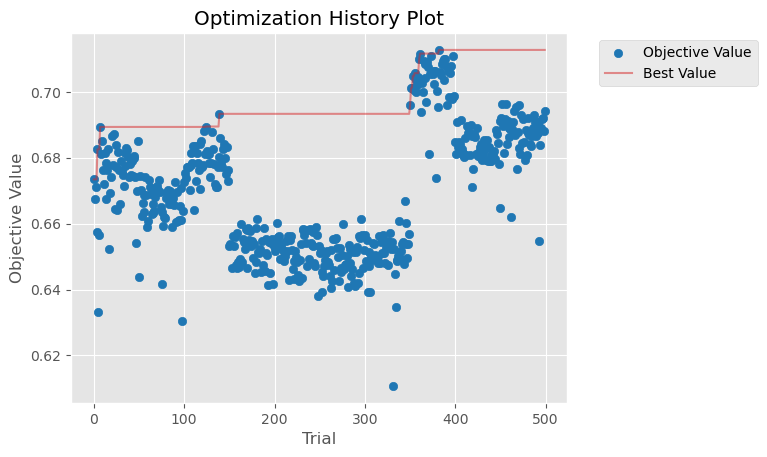

In [65]:
from optuna.visualization.matplotlib import plot_optimization_history

plot_optimization_history(study_lgbm);

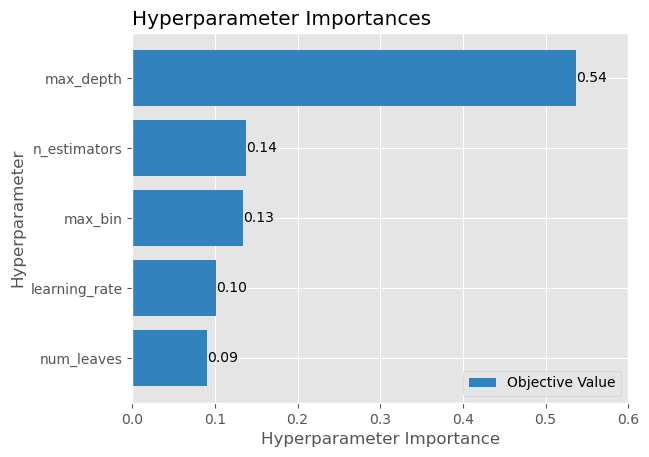

In [66]:
from optuna.visualization.matplotlib import plot_param_importances
plot_param_importances(study_lgbm);

In [67]:
detailed_objective_lgbm_cv(study_lgbm.best_trial, X, Y, Y_class)

                 Metric  Value (average)  Value (std)
0                    R2         0.681501     0.061641
1                    TP        18.700000     1.766981
2                    TN        98.900000     1.370320
3                    FP         1.600000     1.074968
4                    FN        14.700000     2.110819
5              Accuracy         0.878280     0.016430
6             Precision         0.923565     0.049191
7           Sensitivity         0.560458     0.058211
8           Specificity         0.984070     0.010732
9              F1 score         0.695569     0.045761
10  F1 score (weighted)         0.866879     0.019367
11     F1 score (macro)         0.809732     0.027676
12    Balanced Accuracy         0.772263     0.028684
13                  MCC         0.657042     0.048323
14                  NPV         0.870850     0.016625
15              ROC_AUC         0.772263     0.028684


In [68]:
mat_met_lgbm_test['ave'] = mat_met_lgbm_test.iloc[:,1:11].mean(axis='columns', numeric_only=True)
mat_met_lgbm_test['std'] = mat_met_lgbm_test.iloc[:,1:11].std(axis='columns', numeric_only=True)
mat_met_lgbm_test

,Metric,Set0,Set1,Set2,Set3,Set4,Set5,Set6,Set7,Set8,Set9,ave,std
0,R2,0.708945,0.673766,0.671030,0.711722,0.685058,0.678225,0.715178,0.590449,0.617881,0.629364,0.668162,0.042518
1,TP,34.000000,33.000000,36.000000,41.000000,40.000000,44.000000,38.000000,34.000000,32.000000,32.000000,36.400000,4.168666
2,TN,201.000000,194.000000,197.000000,197.000000,197.000000,195.000000,199.000000,194.000000,196.000000,199.000000,196.900000,2.282786
3,FP,1.000000,6.000000,3.000000,2.000000,5.000000,5.000000,1.000000,7.000000,4.000000,2.000000,3.600000,2.118700
4,FN,32.000000,35.000000,32.000000,28.000000,26.000000,24.000000,30.000000,33.000000,36.000000,35.000000,31.100000,4.040077
5,Accuracy,0.876866,0.847015,0.869403,0.888060,0.884328,0.891791,0.884328,0.850746,0.850746,0.861940,0.870522,0.016967
6,Precision,0.971429,0.846154,0.923077,0.953488,0.888889,0.897959,0.974359,0.829268,0.888889,0.941176,0.911469,0.050065
7,Sensitivity,0.515152,0.485294,0.529412,0.594203,0.606061,0.647059,0.558824,0.507463,0.470588,0.477612,0.539167,0.060187
8,Specificity,0.995000,0.970000,0.985000,0.989900,0.975200,0.975000,0.995000,0.965200,0.980000,0.990000,0.982030,0.010535
9,F1 score,0.673267,0.616822,0.672897,0.732143,0.720721,0.752137,0.710280,0.629630,0.615385,0.633663,0.675695,0.050836


In [69]:
#change to fit into these X values 

TP = np.empty(10)
FP = np.empty(10)
TN = np.empty(10)
FN = np.empty(10)

r2_scores_outer = []
Accuracy_outer = []
Precision_outer = [] #Also called Positive Predictive Value(PPV)
Sensitivity_outer = [] # Also called Recall or True Positive Rate (TPR)
Specificity_outer = [] #Also called selectivity or True Negative Rate  (TNR)
f1_scores_outer = []
f1_scores_W_outer = []
f1_scores_M_outer = []
BA_scores_outer = []
MCC_outer = []
NPV_outer = []
ROC_AUC_outer = []

NUM_TRIALS = 5
random_state= [687266, 98656, 56, 280189, 76543] # 
data_lgbm=pd.DataFrame()

for i in range(NUM_TRIALS):
    cv_change = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state[i])
    data_inner = pd.DataFrame({'y_test_idx': pd.Series(dtype='int'),
                   'y_test': pd.Series(dtype='float'),
                   'y_pred': pd.Series(dtype='float')})
    
    
    for idx, (train_idx, test_idx) in enumerate(cv_change.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        eval_set = [(X_train, y_train), (X_test, y_test)]
        optimizedCV_lgbm = lgbm.LGBMRegressor(objective="regression", 
                                      random_state=1121218, 
                                      boosting_type ="gbdt", 
                                      subsample=0.8, # also called bagging_fraction
                                      subsample_freq=10,
                                      n_estimators=study_lgbm.best_params['n_estimators'],
                                      learning_rate=study_lgbm.best_params['learning_rate'],
                                      max_depth = study_lgbm.best_params['max_depth'],
                                      max_bin=study_lgbm.best_params['max_bin'],
                                      #lambda_l1 = study_lgbm.best_params['lambda_l1'],
                                      #lambda_l2= study_lgbm.best_params['lambda_l2'],
                                      num_leaves=study_lgbm.best_params['num_leaves'],
                                      #min_child_samples = study_lgbm.best_params['min_child_samples'],
                                      #bagging_fraction = study_lgbm.best_params['bagging_fraction'],
                                      #bagging_freq = study_lgbm.best_params['bagging_freq'],
                                        
                                        )


        #learn
        eval_set = [(X_test, y_test)]
        optimizedCV_lgbm.fit(X_train,
                y_train,
                eval_set=eval_set,
                eval_metric="rmse",     
                early_stopping_rounds=50,
                verbose = False,
                )
                          
                  
        #print(test_idx)
        y_pred_optimized_lgbm = optimizedCV_lgbm.predict(X_test) 
        data_inner = data_inner.append(pd.DataFrame({'y_test_idx': test_idx, 'y_test': y_test, 'y_pred_lgbm': y_pred_optimized_lgbm } ), )
        data_inner.reset_index(inplace=True, drop=True) 
        data_inner.sort_values(by='y_test_idx', inplace=True) 
        
        y_test_cat = np.where(((y_test>=2) | (y_test<=-2)), 1, 0) 
        y_pred_optimized_lgbm_cat = np.where(((y_pred_optimized_lgbm >= 2) | (y_pred_optimized_lgbm <= -2)), 1, 0)
        
        conf_matrix = confusion_matrix(y_test_cat, y_pred_optimized_lgbm_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        
        
        r2_scores_outer.append(r2_score(y_test, y_pred_optimized_lgbm))
        Accuracy_outer.append(accuracy_score(y_test_cat, y_pred_optimized_lgbm_cat))
        Precision_outer.append(precision_score(y_test_cat, y_pred_optimized_lgbm_cat))
        Sensitivity_outer.append(recall_score(y_test_cat, y_pred_optimized_lgbm_cat))
        Specificity_outer.append(round( TN[idx] / (TN[idx]+FP[idx]),4 ))
        f1_scores_outer.append(f1_score(y_test_cat, y_pred_optimized_lgbm_cat))
        f1_scores_W_outer.append(f1_score(y_test_cat, y_pred_optimized_lgbm_cat, average="weighted"))
        f1_scores_M_outer.append(f1_score(y_test_cat, y_pred_optimized_lgbm_cat, average="macro"))
        BA_scores_outer.append(balanced_accuracy_score(y_test_cat, y_pred_optimized_lgbm_cat))
        MCC_outer.append(matthews_corrcoef(y_test_cat, y_pred_optimized_lgbm_cat))
        NPV_outer.append(round( TN[idx] / (TN[idx]+FN[idx]),4 ))
        ROC_AUC_outer.append(roc_auc_score(y_test_cat, y_pred_optimized_lgbm_cat))
        
    data_lgbm['y_test_idx' + str(i)] = data_inner['y_test_idx']
    data_lgbm['y_test' + str(i)] = data_inner['y_test']
    data_lgbm['y_pred_lgbm' + str(i)] = data_inner['y_pred_lgbm']
   # data_lgbm['correct' + str(i)] = correct_value
   # data_lgbm['pred' + str(i)] = y_pred_optimized_lgbm

mat_met_optimized_lgbm = pd.DataFrame({'Metric':['R2','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores_outer), np.mean(Accuracy_outer),np.mean(Precision_outer),
                                           np.mean(Sensitivity_outer),np.mean(Specificity_outer),np.mean(f1_scores_outer),
                                           np.mean(f1_scores_W_outer), np.mean(f1_scores_M_outer), np.mean(BA_scores_outer), 
                                           np.mean(MCC_outer),np.mean(NPV_outer),np.mean(ROC_AUC_outer)],
                        'Value (std)': [np.std(r2_scores_outer, ddof=1), np.std(Accuracy_outer, ddof=1),np.std(Precision_outer, ddof=1),
                                        np.std(Sensitivity_outer,ddof=1),np.std(Specificity_outer,ddof=1),np.std(f1_scores_outer, ddof=1),
                                        np.std(f1_scores_W_outer, ddof=1),np.std(f1_scores_M_outer, ddof=1), np.std(BA_scores_outer, ddof=1), 
                                        np.std(MCC_outer, ddof=1),np.std(NPV_outer, ddof=1),np.std(ROC_AUC_outer, ddof=1)]
                       }) 


lgbm_run0 = data_lgbm[['y_test_idx0', 'y_test0', 'y_pred_lgbm0']]
lgbm_run0.sort_values(by='y_test_idx0', inplace=True)
lgbm_run0.reset_index(inplace=True, drop=True)
lgbm_run1 = data_lgbm[['y_test_idx1', 'y_test1', 'y_pred_lgbm1']]
lgbm_run1.sort_values(by='y_test_idx1', inplace=True)
lgbm_run1.reset_index(inplace=True, drop=True)
lgbm_run2 = data_lgbm[['y_test_idx2', 'y_test2', 'y_pred_lgbm2']]
lgbm_run2.sort_values(by='y_test_idx2', inplace=True)
lgbm_run2.reset_index(inplace=True, drop=True)
lgbm_run3 = data_lgbm[['y_test_idx3', 'y_test3', 'y_pred_lgbm3']]
lgbm_run3.sort_values(by='y_test_idx3', inplace=True)
lgbm_run3.reset_index(inplace=True, drop=True)
lgbm_run4 = data_lgbm[['y_test_idx4', 'y_test4', 'y_pred_lgbm4']]
lgbm_run4.sort_values(by='y_test_idx4', inplace=True)
lgbm_run4.reset_index(inplace=True, drop=True)
chembl_id = df['molecule_chembl_id']
lgbm_5preds = pd.concat([chembl_id, lgbm_run0, lgbm_run1, lgbm_run2, lgbm_run3, lgbm_run4], axis=1)
lgbm_5preds = lgbm_5preds[['molecule_chembl_id', 'y_test_idx0', 'y_test0', 'y_pred_lgbm0', 'y_pred_lgbm1', 'y_pred_lgbm2', 'y_pred_lgbm3', 'y_pred_lgbm4']]
lgbm_5preds['y_pred_lgbm_ave'] = lgbm_5preds.iloc[:,2:11].mean(axis='columns', numeric_only=True)
lgbm_5preds['y_pred_lgbm_std'] = lgbm_5preds.iloc[:,2:].std(axis='columns', numeric_only=True)
# maybe also calculate the std for each value

mat_met_optimized_lgbm

,Metric,Value (average),Value (std)
0,R2,0.690248,0.050656
1,Accuracy,0.880367,0.025403
2,Precision,0.917352,0.051558
3,Sensitivity,0.571807,0.090913
4,Specificity,0.982888,0.010603
5,F1 score,0.700870,0.075780
6,F1 score (weighted),0.869235,0.030165
7,F1 score (macro),0.813006,0.045281
8,Balanced Accuracy,0.777347,0.046663
9,MCC,0.661346,0.077509


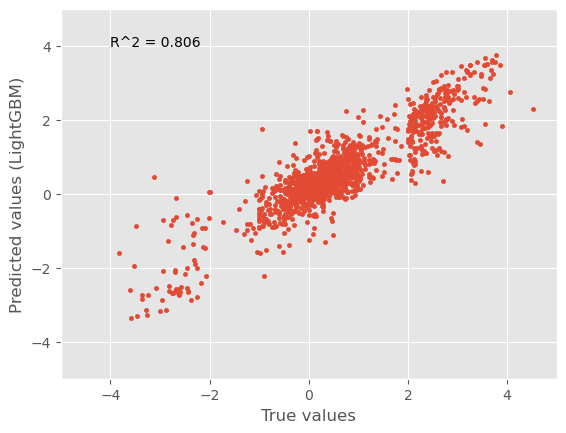

In [70]:
# Scatter plot

limits = -5,5
plt.figsize=(10,10)

plt.scatter(lgbm_5preds['y_test0'], lgbm_5preds['y_pred_lgbm_ave'], marker=".")
lin = np.linspace(*limits, 100)

plt.ylabel("Predicted values (LightGBM)")
plt.xlabel("True values")

plt.xlim(limits)
plt.ylim(limits)

plt.annotate("R^2 = {:.3f}".format(r2_score(lgbm_5preds['y_test0'], lgbm_5preds['y_pred_lgbm_ave'])), (-4, 4))
plt.show()

In [71]:
#cross valide using this optimized LightGBM 
fit_params={'early_stopping_rounds': 50, 
        'eval_set': [(X_tr, Y_tr), (X_te, Y_te)],
            'verbose':False,
           }
#cross valide using this optimized LightGBM 
lgbm_baseline_CVscore = cross_val_score(lgbm_reg, X, Y, cv=10, scoring="r2")
#r2_cv_lgbm_opt_testSet = cross_val_score(optimized_lgbm, X, Y, cv=10, scoring="r2")
r2_cv_lgbm_opt = cross_val_score(optimizedCV_lgbm, X, Y, cv=10, scoring="r2", fit_params=fit_params)
print("LightGBM baseline model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(lgbm_baseline_CVscore), np.std(lgbm_baseline_CVscore, ddof=1)))
#print("LightGBM optimized model (tested on Y_te)r2_score %0.4f with a standard deviation of %0.4f" % (r2_cv_lgbm_opt_testSet.mean(), r2_cv_lgbm_opt_testSet.std()))
print("LightGBM optimized model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(r2_cv_lgbm_opt), np.std(r2_cv_lgbm_opt, ddof=1)))

LightGBM baseline model r2_score 0.6997 with a standard deviation of 0.0751
LightGBM optimized model r2_score 0.6750 with a standard deviation of 0.0749


In [72]:
joblib.dump(lgbm_reg, "OUTPUT/lgbm_reg.joblib")
#joblib.dump(optimized_lgbm, "OUTPUT/optimized_lgbm.joblib")
joblib.dump(optimizedCV_lgbm, "OUTPUT/optimizedCV_lgbm.joblib") 
#loaded_rf = joblib.load("OUTPUT/optimized_rf.joblib")

['OUTPUT/optimizedCV_lgbm.joblib']

## XGBoost

In [73]:
%%time

r2_scores = np.empty(10)
TP =np.empty(10)
TN = np.empty(10)
FP = np.empty(10)
FN = np.empty(10)
Accuracy = np.empty(10)
Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
f1_scores = np.empty(10)
f1_scores_W = np.empty(10)
f1_scores_M = np.empty(10)
BA_scores = np.empty(10)
MCC = np.empty(10)
NPV = np.empty(10)
ROC_AUC= np.empty(10)



for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = Y[train_idx], Y[test_idx]

    xgb_reg = xgb.XGBRegressor(
    objective="reg:squarederror",
    random_state=1121218,
    #n_estimators=10000,  
    tree_method="hist",  # enable histogram binning in XGB
    subsample=0.8, 
    )
    
    eval_set = [(X_train, y_train), (X_test, y_test)]
    xgb_reg.fit(X_train,
                y_train,
    
    eval_set=eval_set,
    eval_metric="rmse",
    early_stopping_rounds=50,
    verbose=False,  # Disable logs
               )

    y_pred = xgb_reg.predict(X_test) 
    # r2 score of the regression model before evaluating categorical evaluation parameters
    r2_scores[idx] = r2_score(y_test, y_pred)
    # now convert the resuls to binary with cutoff 6.3
    y_test_cat = np.where(((y_test>=2) | (y_test<=-2)), 1, 0) 
    y_pred_cat = np.where(((y_pred >= 2) | (y_pred <= -2)), 1, 0)
    #calculate the evaluation results
    conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
    TP[idx] = conf_matrix[1][1]
    TN[idx] = conf_matrix[0][0]
    FP[idx] = conf_matrix[0][1] 
    FN[idx] = conf_matrix[1][0]
    Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
    Precision[idx] = precision_score(y_test_cat, y_pred_cat)
    Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
    Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
    f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
    f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
    f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
    BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
    MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
    NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
    ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)


mat_met = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores),np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })   
    
print(mat_met)


                 Metric  Value (average)  Value (std)
0                    R2         0.681838     0.065479
1                    TP        18.100000     2.131770
2                    TN        98.300000     1.159502
3                    FP         2.200000     0.788811
4                    FN        15.300000     2.451757
5              Accuracy         0.869313     0.018640
6             Precision         0.892240     0.036624
7           Sensitivity         0.542528     0.067596
8           Specificity         0.978100     0.007890
9              F1 score         0.672573     0.055212
10  F1 score (weighted)         0.856938     0.022794
11     F1 score (macro)         0.795447     0.033019
12    Balanced Accuracy         0.760313     0.033615
13                  MCC         0.627426     0.054655
14                  NPV         0.865650     0.019057
15              ROC_AUC         0.760313     0.033615
CPU times: user 1h 59min 57s, sys: 7.17 s, total: 2h 4s
Wall time: 5min 42s


In [74]:
def objective_xgb_CV(trial, X, Y, Y_class):
    param_grid = {
        
        "n_estimators": trial.suggest_int("n_estimators", 50, 900),
        "eta": trial.suggest_float("eta", 1e-6, 0.1),  
        "max_depth": trial.suggest_int("max_depth", 5, 12),  
        "alpha": trial.suggest_float("alpha", 0, 1, step=1e-04),
        "lambda": trial.suggest_float("lambda", 1,40),
        #"alpha": trial.suggest_float("alpha", 0, 1.0),
        #"lambda": trial.suggest_float("lambda", 1e-8, 40.0),
        "max_bin": trial.suggest_int("max_bin", 250, 500),
    }
    
    
    cv_scores=np.empty(10)
    #y_comb=pd.DataFrame()
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=1121218, booster ="gbtree", tree_method='hist',
                                  **param_grid,  n_jobs=4, subsample=0.8, )
    
        eval_set = [(X_test, y_test)]
        xgb_model.fit(
            X_train,
            y_train,
            eval_set=eval_set,
            eval_metric="rmse",    
            early_stopping_rounds=50,
            verbose=False)
    
        y_pred = xgb_model.predict(X_test)
        cv_scores[idx] = r2_score(y_test, y_pred)
            
    return np.mean(cv_scores)

In [75]:
def detailed_objective_xgb_CV(trial, X, Y, Y_class):
    param_grid = {
        
        "n_estimators": trial.suggest_int("n_estimators", 50, 900),
        "eta": trial.suggest_float("eta", 1e-6, 0.1),  
        "max_depth": trial.suggest_int("max_depth", 5, 12),  
        "alpha": trial.suggest_float("alpha", 0, 1, step=1e-04),
        "lambda": trial.suggest_float("lambda", 1,40),
        #"alpha": trial.suggest_float("alpha", 0, 1.0),
        #"lambda": trial.suggest_float("lambda", 1e-8, 40.0),
        "max_bin": trial.suggest_int("max_bin", 250, 500),
    }
    
    
    r2_scores = np.empty(10)
    TP=np.empty(10)
    TN = np.empty(10)
    FP= np.empty(10)
    FN= np.empty(10)
    Accuracy = np.empty(10)
    Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
    Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
    Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
    f1_scores = np.empty(10)
    f1_scores_W=np.empty(10)
    f1_scores_M=np.empty(10)
    BA_scores = np.empty(10)
    MCC = np.empty(10)
    NPV = np.empty(10)
    ROC_AUC= np.empty(10)
    
    
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=1121218, booster ="gbtree", tree_method='hist',
                                  **param_grid,  n_jobs=4, subsample=0.8, )
    
        eval_set = [(X_test, y_test)]
        xgb_model.fit(
            X_train,
            y_train,
            eval_set=eval_set,
            eval_metric="rmse",    
            early_stopping_rounds=50,
            verbose=False)
        
        y_pred = xgb_model.predict(X_test)
        # r2 score of the regression model before evaluating categorical evaluation parameters
        r2_scores[idx] = r2_score(y_test, y_pred)
        # convert to categorical values
        y_test_cat = np.where( ((y_test>=2) | (y_test<= -2.0)), 1, 0) 
        y_pred_cat = np.where(((y_pred>=2) | (y_pred<= -2.0)), 1, 0)
       
           
        #calculate parameters
        conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)      
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
        Precision[idx] = precision_score(y_test_cat, y_pred_cat)
        Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
        f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
        f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
        MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)

    mat_met = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })   
    
    return (mat_met)   

In [76]:
#Execute optuna and set hyperparameters
study_xgb = optuna.create_study(direction='maximize', study_name="XGBRegressor")
func_xgb_0 = lambda trial: objective_xgb_CV(trial, X_trainSet0, Y_trainSet0, Y_trainSet0_class)
study_xgb.optimize(func_xgb_0, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 07:12:31,987] A new study created in memory with name: XGBRegressor
[I 2023-12-20 07:12:37,990] Trial 0 finished with value: 0.6528073047900718 and parameters: {'n_estimators': 150, 'eta': 0.0263599150207785, 'max_depth': 12, 'alpha': 0.2099, 'lambda': 32.135516587182025, 'max_bin': 478}. Best is trial 0 with value: 0.6528073047900718.
[I 2023-12-20 07:12:44,674] Trial 1 finished with value: 0.6975041423961056 and parameters: {'n_estimators': 616, 'eta': 0.06763019192216786, 'max_depth': 5, 'alpha': 0.8944000000000001, 'lambda': 28.163801578421065, 'max_bin': 263}. Best is trial 1 with value: 0.6975041423961056.
[I 2023-12-20 07:12:50,960] Trial 2 finished with value: 0.23323082193586017 and parameters: {'n_estimators': 320, 'eta': 0.0012158881245137375, 'max_depth': 6, 'alpha': 0.47740000000000005, 'lambda': 16.0128738402708, 'max_bin': 485}. Best is trial 1 with value: 0.6975041423961056.
[I 2023-12-20 07:13:06,121] Trial 3 finished with value: 0.6992726153741023 and pa

	Number of trials: 50.0
	Best value (r2_score): 0.7082
	Best params:
		n_estimators: 524
		eta: 0.07101769028875411
		max_depth: 8
		alpha: 0.7864
		lambda: 35.72460692646191
		max_bin: 399


In [77]:
#Create an instance with tuned hyperparameters

optimized_xgb_0 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=4,
                                    subsample=0.8, 
                                   )
    #learn
eval_set = [(X_testSet0, Y_testSet0)]

optimized_xgb_0.fit(X_trainSet0,Y_trainSet0, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

    # r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_xgb_0 = optimized_xgb_0.predict(X_testSet0)
r2_scores = r2_score(Y_testSet0, y_pred_xgb_0)
# now convert the resuls to binary with cutoff 6.3
Y_testSet0_cat = np.where(((Y_testSet0>=2) | (Y_testSet0<=-2)), 1, 0) 
y_pred_xgb_0_cat = np.where(((y_pred_xgb_0 >= 2) | (y_pred_xgb_0 <= -2)), 1, 0)
    #calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet0_cat, y_pred_xgb_0_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet0_cat, y_pred_xgb_0_cat)
Precision = precision_score(Y_testSet0_cat, y_pred_xgb_0_cat)
Sensitivity = recall_score(Y_testSet0_cat, y_pred_xgb_0_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet0_cat, y_pred_xgb_0_cat)      
f1_scores_W = f1_score(Y_testSet0_cat, y_pred_xgb_0_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet0_cat, y_pred_xgb_0_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet0_cat, y_pred_xgb_0_cat)
MCC = matthews_corrcoef(Y_testSet0_cat, y_pred_xgb_0_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet0_cat, y_pred_xgb_0_cat)
    

mat_met_xgb_test = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Set0':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })    
print(mat_met_xgb_test)


                 Metric        Set0
0                    R2    0.689126
1                    TP   32.000000
2                    TN  201.000000
3                    FP    1.000000
4                    FN   34.000000
5              Accuracy    0.869403
6             Precision    0.969697
7           Sensitivity    0.484848
8           Specificity    0.995000
9              F1 score    0.646465
10  F1 score (weighted)    0.852568
11     F1 score (macro)    0.783187
12    Balanced Accuracy    0.739949
13                  MCC    0.629225
14                  NPV    0.855300
15              ROC_AUC    0.739949


In [78]:
#Execute optuna and set hyperparameters

func_xgb_1 = lambda trial: objective_xgb_CV(trial, X_trainSet1, Y_trainSet1, Y_trainSet1_class)
study_xgb.optimize(func_xgb_1, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 07:18:44,132] Trial 50 finished with value: 0.6969686373285711 and parameters: {'n_estimators': 341, 'eta': 0.08510079657711592, 'max_depth': 8, 'alpha': 0.8151, 'lambda': 35.59722262768717, 'max_bin': 383}. Best is trial 23 with value: 0.7082329914489204.
[I 2023-12-20 07:18:46,926] Trial 51 finished with value: 0.6785405114003986 and parameters: {'n_estimators': 143, 'eta': 0.09358755848054703, 'max_depth': 8, 'alpha': 0.8826, 'lambda': 32.310048175408035, 'max_bin': 342}. Best is trial 23 with value: 0.7082329914489204.
[I 2023-12-20 07:18:55,743] Trial 52 finished with value: 0.6987337427240905 and parameters: {'n_estimators': 695, 'eta': 0.07973642394300584, 'max_depth': 8, 'alpha': 0.8508, 'lambda': 35.34757937065807, 'max_bin': 278}. Best is trial 23 with value: 0.7082329914489204.
[I 2023-12-20 07:19:04,931] Trial 53 finished with value: 0.6961457534582907 and parameters: {'n_estimators': 750, 'eta': 0.07576768645533094, 'max_depth': 8, 'alpha': 0.9463, 'lambda': 

	Number of trials: 100.0
	Best value (r2_score): 0.7082
	Best params:
		n_estimators: 524
		eta: 0.07101769028875411
		max_depth: 8
		alpha: 0.7864
		lambda: 35.72460692646191
		max_bin: 399


In [79]:
optimized_xgb_1 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=4,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet1, Y_testSet1)]
optimized_xgb_1.fit(X_trainSet1,Y_trainSet1, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_1 = optimized_xgb_1.predict(X_testSet1)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet1, y_pred_xgb_1)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet1 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_xgb_1_cat = np.where(((y_pred_xgb_1 >= 2) | (y_pred_xgb_1 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet1_cat, y_pred_xgb_1_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet1_cat, y_pred_xgb_1_cat)
Precision = precision_score(Y_testSet1_cat, y_pred_xgb_1_cat)
Sensitivity = recall_score(Y_testSet1_cat, y_pred_xgb_1_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet1_cat, y_pred_xgb_1_cat)      
f1_scores_W = f1_score(Y_testSet1_cat, y_pred_xgb_1_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet1_cat, y_pred_xgb_1_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet1_cat, y_pred_xgb_1_cat)
MCC = matthews_corrcoef(Y_testSet1_cat, y_pred_xgb_1_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet1_cat, y_pred_xgb_1_cat)


set1 = pd.DataFrame({ 'Set1':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set1'] =set1
print(mat_met_xgb_test)


                 Metric        Set0        Set1
0                    R2    0.689126    0.712882
1                    TP   32.000000   41.000000
2                    TN  201.000000  194.000000
3                    FP    1.000000    6.000000
4                    FN   34.000000   27.000000
5              Accuracy    0.869403    0.876866
6             Precision    0.969697    0.872340
7           Sensitivity    0.484848    0.602941
8           Specificity    0.995000    0.970000
9              F1 score    0.646465    0.713043
10  F1 score (weighted)    0.852568    0.868694
11     F1 score (macro)    0.783187    0.817329
12    Balanced Accuracy    0.739949    0.786471
13                  MCC    0.629225    0.655593
14                  NPV    0.855300    0.877800
15              ROC_AUC    0.739949    0.786471


In [80]:
#Execute optuna and set hyperparameters
func_xgb_2 = lambda trial: objective_xgb_CV(trial, X_trainSet2, Y_trainSet2, Y_trainSet2_class)
study_xgb.optimize(func_xgb_2, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 07:25:20,801] Trial 100 finished with value: 0.7071717573271215 and parameters: {'n_estimators': 662, 'eta': 0.08280544874678454, 'max_depth': 9, 'alpha': 0.7039000000000001, 'lambda': 34.13882418603396, 'max_bin': 433}. Best is trial 23 with value: 0.7082329914489204.
[I 2023-12-20 07:25:28,845] Trial 101 finished with value: 0.7068741262482416 and parameters: {'n_estimators': 638, 'eta': 0.0894628530209697, 'max_depth': 9, 'alpha': 0.6916, 'lambda': 34.07386170111805, 'max_bin': 436}. Best is trial 23 with value: 0.7082329914489204.
[I 2023-12-20 07:25:39,153] Trial 102 finished with value: 0.6993558260014866 and parameters: {'n_estimators': 634, 'eta': 0.08331259623385129, 'max_depth': 10, 'alpha': 0.7132000000000001, 'lambda': 34.15832949082007, 'max_bin': 457}. Best is trial 23 with value: 0.7082329914489204.
[I 2023-12-20 07:25:48,198] Trial 103 finished with value: 0.7067851721048273 and parameters: {'n_estimators': 665, 'eta': 0.08754393855232949, 'max_depth': 9, 

	Number of trials: 150.0
	Best value (r2_score): 0.7108
	Best params:
		n_estimators: 570
		eta: 0.0960461800647675
		max_depth: 10
		alpha: 0.6382
		lambda: 28.76844285630968
		max_bin: 485


In [81]:
optimized_xgb_2 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=4,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet2, Y_testSet2)]
optimized_xgb_2.fit(X_trainSet2,Y_trainSet2, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_2 = optimized_xgb_2.predict(X_testSet2)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet2, y_pred_xgb_2)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet2 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_xgb_2_cat = np.where(((y_pred_xgb_2 >= 2) | (y_pred_xgb_2 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet2_cat, y_pred_xgb_2_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet2_cat, y_pred_xgb_2_cat)
Precision = precision_score(Y_testSet2_cat, y_pred_xgb_2_cat)
Sensitivity = recall_score(Y_testSet2_cat, y_pred_xgb_2_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet2_cat, y_pred_xgb_2_cat)      
f1_scores_W = f1_score(Y_testSet2_cat, y_pred_xgb_2_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet2_cat, y_pred_xgb_2_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet2_cat, y_pred_xgb_2_cat)
MCC = matthews_corrcoef(Y_testSet2_cat, y_pred_xgb_2_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet2_cat, y_pred_xgb_2_cat)


Set2 = pd.DataFrame({ 'Set2':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set2'] =Set2
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2
0                    R2    0.689126    0.712882    0.708425
1                    TP   32.000000   41.000000   39.000000
2                    TN  201.000000  194.000000  195.000000
3                    FP    1.000000    6.000000    5.000000
4                    FN   34.000000   27.000000   29.000000
5              Accuracy    0.869403    0.876866    0.873134
6             Precision    0.969697    0.872340    0.886364
7           Sensitivity    0.484848    0.602941    0.573529
8           Specificity    0.995000    0.970000    0.975000
9              F1 score    0.646465    0.713043    0.696429
10  F1 score (weighted)    0.852568    0.868694    0.863132
11     F1 score (macro)    0.783187    0.817329    0.808120
12    Balanced Accuracy    0.739949    0.786471    0.774265
13                  MCC    0.629225    0.655593    0.644346
14                  NPV    0.855300    0.877800    0.870500
15              ROC_AUC    0.739949    0

In [82]:
#Execute optuna and set hyperparameters
func_xgb_3 = lambda trial: objective_xgb_CV(trial, X_trainSet3, Y_trainSet3, Y_trainSet3_class)
study_xgb.optimize(func_xgb_3, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 07:32:43,342] Trial 150 finished with value: 0.6804864355985524 and parameters: {'n_estimators': 507, 'eta': 0.09780725444590554, 'max_depth': 10, 'alpha': 0.5848, 'lambda': 31.481349598062945, 'max_bin': 489}. Best is trial 121 with value: 0.7107864949635834.
[I 2023-12-20 07:32:50,900] Trial 151 finished with value: 0.6822258066810625 and parameters: {'n_estimators': 532, 'eta': 0.08532891328536724, 'max_depth': 10, 'alpha': 0.6472, 'lambda': 26.767193198515102, 'max_bin': 496}. Best is trial 121 with value: 0.7107864949635834.
[I 2023-12-20 07:32:57,810] Trial 152 finished with value: 0.6851963576605897 and parameters: {'n_estimators': 636, 'eta': 0.09286240519435611, 'max_depth': 9, 'alpha': 0.5595, 'lambda': 27.579397246551544, 'max_bin': 471}. Best is trial 121 with value: 0.7107864949635834.
[I 2023-12-20 07:33:06,148] Trial 153 finished with value: 0.6816788756778215 and parameters: {'n_estimators': 520, 'eta': 0.08978130927995895, 'max_depth': 10, 'alpha': 0.6286

	Number of trials: 200.0
	Best value (r2_score): 0.7108
	Best params:
		n_estimators: 570
		eta: 0.0960461800647675
		max_depth: 10
		alpha: 0.6382
		lambda: 28.76844285630968
		max_bin: 485


In [83]:
optimized_xgb_3 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=4,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet3, Y_testSet3)]
optimized_xgb_3.fit(X_trainSet3,Y_trainSet3, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_3 = optimized_xgb_3.predict(X_testSet3)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet3, y_pred_xgb_3)
# now convert the resuls to binary with cutoff 6.3
#Y_trainSet3 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_xgb_3_cat = np.where(((y_pred_xgb_3 >= 2) | (y_pred_xgb_3 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet3_cat, y_pred_xgb_3_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet3_cat, y_pred_xgb_3_cat)
Precision = precision_score(Y_testSet3_cat, y_pred_xgb_3_cat)
Sensitivity = recall_score(Y_testSet3_cat, y_pred_xgb_3_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet3_cat, y_pred_xgb_3_cat)      
f1_scores_W = f1_score(Y_testSet3_cat, y_pred_xgb_3_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet3_cat, y_pred_xgb_3_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet3_cat, y_pred_xgb_3_cat)
MCC = matthews_corrcoef(Y_testSet3_cat, y_pred_xgb_3_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet3_cat, y_pred_xgb_3_cat)


Set3 = pd.DataFrame({ 'Set3':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set3'] =Set3
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3
0                    R2    0.689126    0.712882    0.708425    0.727859
1                    TP   32.000000   41.000000   39.000000   41.000000
2                    TN  201.000000  194.000000  195.000000  197.000000
3                    FP    1.000000    6.000000    5.000000    2.000000
4                    FN   34.000000   27.000000   29.000000   28.000000
5              Accuracy    0.869403    0.876866    0.873134    0.888060
6             Precision    0.969697    0.872340    0.886364    0.953488
7           Sensitivity    0.484848    0.602941    0.573529    0.594203
8           Specificity    0.995000    0.970000    0.975000    0.989900
9              F1 score    0.646465    0.713043    0.696429    0.732143
10  F1 score (weighted)    0.852568    0.868694    0.863132    0.878499
11     F1 score (macro)    0.783187    0.817329    0.808120    0.830694
12    Balanced Accuracy    0.739949    0.786471    0.774265    0

In [84]:
#Execute optuna and set hyperparameters
func_xgb_4 = lambda trial: objective_xgb_CV(trial, X_trainSet4, Y_trainSet4, Y_trainSet4_class)
study_xgb.optimize(func_xgb_4, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 07:38:47,407] Trial 200 finished with value: 0.6799516286986759 and parameters: {'n_estimators': 605, 'eta': 0.09244694396163632, 'max_depth': 10, 'alpha': 0.7196, 'lambda': 32.47110971968645, 'max_bin': 460}. Best is trial 121 with value: 0.7107864949635834.
[I 2023-12-20 07:38:54,684] Trial 201 finished with value: 0.6800623351913496 and parameters: {'n_estimators': 622, 'eta': 0.0882230391493991, 'max_depth': 9, 'alpha': 0.7001000000000001, 'lambda': 30.227971748168176, 'max_bin': 466}. Best is trial 121 with value: 0.7107864949635834.
[I 2023-12-20 07:39:01,343] Trial 202 finished with value: 0.6758164477228749 and parameters: {'n_estimators': 650, 'eta': 0.09414993052733732, 'max_depth': 9, 'alpha': 0.6519, 'lambda': 29.495352669397715, 'max_bin': 500}. Best is trial 121 with value: 0.7107864949635834.
[I 2023-12-20 07:39:09,403] Trial 203 finished with value: 0.6746643166322451 and parameters: {'n_estimators': 619, 'eta': 0.09081810116663064, 'max_depth': 9, 'alpha'

	Number of trials: 250.0
	Best value (r2_score): 0.7108
	Best params:
		n_estimators: 570
		eta: 0.0960461800647675
		max_depth: 10
		alpha: 0.6382
		lambda: 28.76844285630968
		max_bin: 485


In [85]:
optimized_xgb_4 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=4,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet4, Y_testSet4)]
optimized_xgb_4.fit(X_trainSet4,Y_trainSet4, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_4 = optimized_xgb_4.predict(X_testSet4)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet4, y_pred_xgb_4)
# now convert the resuls to binary with cutoff 6.4
#Y_trainSet4 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_xgb_4_cat = np.where(((y_pred_xgb_4 >= 2) | (y_pred_xgb_4 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet4_cat, y_pred_xgb_4_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet4_cat, y_pred_xgb_4_cat)
Precision = precision_score(Y_testSet4_cat, y_pred_xgb_4_cat)
Sensitivity = recall_score(Y_testSet4_cat, y_pred_xgb_4_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet4_cat, y_pred_xgb_4_cat)      
f1_scores_W = f1_score(Y_testSet4_cat, y_pred_xgb_4_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet4_cat, y_pred_xgb_4_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet4_cat, y_pred_xgb_4_cat)
MCC = matthews_corrcoef(Y_testSet4_cat, y_pred_xgb_4_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet4_cat, y_pred_xgb_4_cat)


Set4 = pd.DataFrame({ 'Set4':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set4'] =Set4
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.689126    0.712882    0.708425    0.727859   
1                    TP   32.000000   41.000000   39.000000   41.000000   
2                    TN  201.000000  194.000000  195.000000  197.000000   
3                    FP    1.000000    6.000000    5.000000    2.000000   
4                    FN   34.000000   27.000000   29.000000   28.000000   
5              Accuracy    0.869403    0.876866    0.873134    0.888060   
6             Precision    0.969697    0.872340    0.886364    0.953488   
7           Sensitivity    0.484848    0.602941    0.573529    0.594203   
8           Specificity    0.995000    0.970000    0.975000    0.989900   
9              F1 score    0.646465    0.713043    0.696429    0.732143   
10  F1 score (weighted)    0.852568    0.868694    0.863132    0.878499   
11     F1 score (macro)    0.783187    0.817329    0.808120    0.830694   
12    Balanced Accuracy  

In [86]:
#Execute optuna and set hyperparameters
func_xgb_5 = lambda trial: objective_xgb_CV(trial, X_trainSet5, Y_trainSet5, Y_trainSet5_class)
study_xgb.optimize(func_xgb_5, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 07:45:23,493] Trial 250 finished with value: 0.7002221705303235 and parameters: {'n_estimators': 563, 'eta': 0.09988282532485435, 'max_depth': 10, 'alpha': 0.5914, 'lambda': 34.63832153742462, 'max_bin': 473}. Best is trial 121 with value: 0.7107864949635834.
[I 2023-12-20 07:45:30,440] Trial 251 finished with value: 0.7024031257564064 and parameters: {'n_estimators': 654, 'eta': 0.09382902822163076, 'max_depth': 9, 'alpha': 0.4726, 'lambda': 30.122531025062425, 'max_bin': 492}. Best is trial 121 with value: 0.7107864949635834.
[I 2023-12-20 07:45:37,579] Trial 252 finished with value: 0.7016409992690935 and parameters: {'n_estimators': 583, 'eta': 0.08828834030558391, 'max_depth': 10, 'alpha': 0.5216000000000001, 'lambda': 27.92943426538873, 'max_bin': 462}. Best is trial 121 with value: 0.7107864949635834.
[I 2023-12-20 07:45:43,813] Trial 253 finished with value: 0.6931765604505218 and parameters: {'n_estimators': 618, 'eta': 0.07241183141676551, 'max_depth': 10, 'alph

	Number of trials: 300.0
	Best value (r2_score): 0.7108
	Best params:
		n_estimators: 570
		eta: 0.0960461800647675
		max_depth: 10
		alpha: 0.6382
		lambda: 28.76844285630968
		max_bin: 485


In [87]:
optimized_xgb_5 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=4,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet5, Y_testSet5)]
optimized_xgb_5.fit(X_trainSet5,Y_trainSet5, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_5 = optimized_xgb_5.predict(X_testSet5)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet5, y_pred_xgb_5)
# now convert the resuls to binary with cutoff 6.5
#Y_trainSet5 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_xgb_5_cat = np.where(((y_pred_xgb_5 >= 2) | (y_pred_xgb_5 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet5_cat, y_pred_xgb_5_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet5_cat, y_pred_xgb_5_cat)
Precision = precision_score(Y_testSet5_cat, y_pred_xgb_5_cat)
Sensitivity = recall_score(Y_testSet5_cat, y_pred_xgb_5_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet5_cat, y_pred_xgb_5_cat)      
f1_scores_W = f1_score(Y_testSet5_cat, y_pred_xgb_5_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet5_cat, y_pred_xgb_5_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet5_cat, y_pred_xgb_5_cat)
MCC = matthews_corrcoef(Y_testSet5_cat, y_pred_xgb_5_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet5_cat, y_pred_xgb_5_cat)


Set5 = pd.DataFrame({ 'Set5':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set5'] =Set5
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.689126    0.712882    0.708425    0.727859   
1                    TP   32.000000   41.000000   39.000000   41.000000   
2                    TN  201.000000  194.000000  195.000000  197.000000   
3                    FP    1.000000    6.000000    5.000000    2.000000   
4                    FN   34.000000   27.000000   29.000000   28.000000   
5              Accuracy    0.869403    0.876866    0.873134    0.888060   
6             Precision    0.969697    0.872340    0.886364    0.953488   
7           Sensitivity    0.484848    0.602941    0.573529    0.594203   
8           Specificity    0.995000    0.970000    0.975000    0.989900   
9              F1 score    0.646465    0.713043    0.696429    0.732143   
10  F1 score (weighted)    0.852568    0.868694    0.863132    0.878499   
11     F1 score (macro)    0.783187    0.817329    0.808120    0.830694   
12    Balanced Accuracy  

In [88]:
#Execute optuna and set hyperparameters
func_xgb_6 = lambda trial: objective_xgb_CV(trial, X_trainSet6, Y_trainSet6, Y_trainSet6_class)
study_xgb.optimize(func_xgb_6, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 07:51:59,347] Trial 300 finished with value: 0.07368769511808432 and parameters: {'n_estimators': 691, 'eta': 0.00021485873439396064, 'max_depth': 9, 'alpha': 0.6828000000000001, 'lambda': 32.191712105925795, 'max_bin': 478}. Best is trial 121 with value: 0.7107864949635834.
[I 2023-12-20 07:52:06,954] Trial 301 finished with value: 0.6884168821469976 and parameters: {'n_estimators': 639, 'eta': 0.07766950951155663, 'max_depth': 8, 'alpha': 0.6052000000000001, 'lambda': 28.30979145201158, 'max_bin': 489}. Best is trial 121 with value: 0.7107864949635834.
[I 2023-12-20 07:52:15,279] Trial 302 finished with value: 0.6929317059131457 and parameters: {'n_estimators': 571, 'eta': 0.08821375419210539, 'max_depth': 10, 'alpha': 0.6294000000000001, 'lambda': 24.149033561031537, 'max_bin': 454}. Best is trial 121 with value: 0.7107864949635834.
[I 2023-12-20 07:52:24,299] Trial 303 finished with value: 0.6850784057249818 and parameters: {'n_estimators': 618, 'eta': 0.0856223994382

	Number of trials: 350.0
	Best value (r2_score): 0.7108
	Best params:
		n_estimators: 570
		eta: 0.0960461800647675
		max_depth: 10
		alpha: 0.6382
		lambda: 28.76844285630968
		max_bin: 485


In [89]:
optimized_xgb_6 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=4,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet6, Y_testSet6)]
optimized_xgb_6.fit(X_trainSet6,Y_trainSet6, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_6 = optimized_xgb_6.predict(X_testSet6)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet6, y_pred_xgb_6)
# now convert the resuls to binary with cutoff 6.6
#Y_trainSet6 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_xgb_6_cat = np.where(((y_pred_xgb_6 >= 2) | (y_pred_xgb_6 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet6_cat, y_pred_xgb_6_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet6_cat, y_pred_xgb_6_cat)
Precision = precision_score(Y_testSet6_cat, y_pred_xgb_6_cat)
Sensitivity = recall_score(Y_testSet6_cat, y_pred_xgb_6_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet6_cat, y_pred_xgb_6_cat)      
f1_scores_W = f1_score(Y_testSet6_cat, y_pred_xgb_6_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet6_cat, y_pred_xgb_6_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet6_cat, y_pred_xgb_6_cat)
MCC = matthews_corrcoef(Y_testSet6_cat, y_pred_xgb_6_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet6_cat, y_pred_xgb_6_cat)


Set6 = pd.DataFrame({ 'Set6':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set6'] =Set6
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.689126    0.712882    0.708425    0.727859   
1                    TP   32.000000   41.000000   39.000000   41.000000   
2                    TN  201.000000  194.000000  195.000000  197.000000   
3                    FP    1.000000    6.000000    5.000000    2.000000   
4                    FN   34.000000   27.000000   29.000000   28.000000   
5              Accuracy    0.869403    0.876866    0.873134    0.888060   
6             Precision    0.969697    0.872340    0.886364    0.953488   
7           Sensitivity    0.484848    0.602941    0.573529    0.594203   
8           Specificity    0.995000    0.970000    0.975000    0.989900   
9              F1 score    0.646465    0.713043    0.696429    0.732143   
10  F1 score (weighted)    0.852568    0.868694    0.863132    0.878499   
11     F1 score (macro)    0.783187    0.817329    0.808120    0.830694   
12    Balanced Accuracy  

In [90]:
#Execute optuna and set hyperparameters
func_xgb_7 = lambda trial: objective_xgb_CV(trial, X_trainSet7, Y_trainSet7, Y_trainSet7_class)
study_xgb.optimize(func_xgb_7, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 07:59:39,956] Trial 350 finished with value: 0.7149715502271825 and parameters: {'n_estimators': 610, 'eta': 0.09157451938115865, 'max_depth': 10, 'alpha': 0.5506, 'lambda': 30.46652912531221, 'max_bin': 455}. Best is trial 350 with value: 0.7149715502271825.
[I 2023-12-20 07:59:51,134] Trial 351 finished with value: 0.7154177562924535 and parameters: {'n_estimators': 610, 'eta': 0.08905912211598419, 'max_depth': 10, 'alpha': 0.533, 'lambda': 30.627566315327233, 'max_bin': 466}. Best is trial 351 with value: 0.7154177562924535.
[I 2023-12-20 08:00:03,873] Trial 352 finished with value: 0.7226681908653416 and parameters: {'n_estimators': 614, 'eta': 0.06117559311841911, 'max_depth': 10, 'alpha': 0.5549000000000001, 'lambda': 31.701499839532268, 'max_bin': 460}. Best is trial 352 with value: 0.7226681908653416.
[I 2023-12-20 08:00:17,435] Trial 353 finished with value: 0.7227373805685 and parameters: {'n_estimators': 613, 'eta': 0.060961615399032915, 'max_depth': 10, 'alpha

	Number of trials: 400.0
	Best value (r2_score): 0.7227
	Best params:
		n_estimators: 685
		eta: 0.06460101637469859
		max_depth: 10
		alpha: 0.5996
		lambda: 35.59493514629963
		max_bin: 435


In [91]:
optimized_xgb_7 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=4,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet7, Y_testSet7)]
optimized_xgb_7.fit(X_trainSet7,Y_trainSet7, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_7 = optimized_xgb_7.predict(X_testSet7)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet7, y_pred_xgb_7)
# now convert the resuls to binary with cutoff 6.7
#Y_trainSet7 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_xgb_7_cat = np.where(((y_pred_xgb_7 >= 2) | (y_pred_xgb_7 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet7_cat, y_pred_xgb_7_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet7_cat, y_pred_xgb_7_cat)
Precision = precision_score(Y_testSet7_cat, y_pred_xgb_7_cat)
Sensitivity = recall_score(Y_testSet7_cat, y_pred_xgb_7_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet7_cat, y_pred_xgb_7_cat)      
f1_scores_W = f1_score(Y_testSet7_cat, y_pred_xgb_7_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet7_cat, y_pred_xgb_7_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet7_cat, y_pred_xgb_7_cat)
MCC = matthews_corrcoef(Y_testSet7_cat, y_pred_xgb_7_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet7_cat, y_pred_xgb_7_cat)


Set7 = pd.DataFrame({ 'Set7':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set7'] =Set7
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.689126    0.712882    0.708425    0.727859   
1                    TP   32.000000   41.000000   39.000000   41.000000   
2                    TN  201.000000  194.000000  195.000000  197.000000   
3                    FP    1.000000    6.000000    5.000000    2.000000   
4                    FN   34.000000   27.000000   29.000000   28.000000   
5              Accuracy    0.869403    0.876866    0.873134    0.888060   
6             Precision    0.969697    0.872340    0.886364    0.953488   
7           Sensitivity    0.484848    0.602941    0.573529    0.594203   
8           Specificity    0.995000    0.970000    0.975000    0.989900   
9              F1 score    0.646465    0.713043    0.696429    0.732143   
10  F1 score (weighted)    0.852568    0.868694    0.863132    0.878499   
11     F1 score (macro)    0.783187    0.817329    0.808120    0.830694   
12    Balanced Accuracy  

In [92]:
#Execute optuna and set hyperparameters
func_xgb_8 = lambda trial: objective_xgb_CV(trial, X_trainSet8, Y_trainSet8, Y_trainSet8_class)
study_xgb.optimize(func_xgb_8, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 08:10:40,191] Trial 400 finished with value: 0.7091809302404478 and parameters: {'n_estimators': 730, 'eta': 0.06558686304691369, 'max_depth': 10, 'alpha': 0.5999, 'lambda': 35.67862243181243, 'max_bin': 434}. Best is trial 398 with value: 0.7227457002901749.
[I 2023-12-20 08:10:49,570] Trial 401 finished with value: 0.7080276374017179 and parameters: {'n_estimators': 752, 'eta': 0.06509382741284012, 'max_depth': 10, 'alpha': 0.604, 'lambda': 35.02868493299036, 'max_bin': 441}. Best is trial 398 with value: 0.7227457002901749.
[I 2023-12-20 08:11:02,178] Trial 402 finished with value: 0.7079765667514332 and parameters: {'n_estimators': 704, 'eta': 0.05678855343313068, 'max_depth': 10, 'alpha': 0.5820000000000001, 'lambda': 33.946789523688324, 'max_bin': 436}. Best is trial 398 with value: 0.7227457002901749.
[I 2023-12-20 08:11:12,735] Trial 403 finished with value: 0.7080095223169487 and parameters: {'n_estimators': 714, 'eta': 0.06437865403501114, 'max_depth': 10, 'alph

	Number of trials: 450.0
	Best value (r2_score): 0.7227
	Best params:
		n_estimators: 685
		eta: 0.06460101637469859
		max_depth: 10
		alpha: 0.5996
		lambda: 35.59493514629963
		max_bin: 435


In [93]:
optimized_xgb_8 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=4,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet8, Y_testSet8)]
optimized_xgb_8.fit(X_trainSet8,Y_trainSet8, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_8 = optimized_xgb_8.predict(X_testSet8)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet8, y_pred_xgb_8)
# now convert the resuls to binary with cutoff 6.8
#Y_trainSet8 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_xgb_8_cat = np.where(((y_pred_xgb_8 >= 2) | (y_pred_xgb_8 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet8_cat, y_pred_xgb_8_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet8_cat, y_pred_xgb_8_cat)
Precision = precision_score(Y_testSet8_cat, y_pred_xgb_8_cat)
Sensitivity = recall_score(Y_testSet8_cat, y_pred_xgb_8_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet8_cat, y_pred_xgb_8_cat)      
f1_scores_W = f1_score(Y_testSet8_cat, y_pred_xgb_8_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet8_cat, y_pred_xgb_8_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet8_cat, y_pred_xgb_8_cat)
MCC = matthews_corrcoef(Y_testSet8_cat, y_pred_xgb_8_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet8_cat, y_pred_xgb_8_cat)


Set8 = pd.DataFrame({ 'Set8':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set8'] =Set8
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.689126    0.712882    0.708425    0.727859   
1                    TP   32.000000   41.000000   39.000000   41.000000   
2                    TN  201.000000  194.000000  195.000000  197.000000   
3                    FP    1.000000    6.000000    5.000000    2.000000   
4                    FN   34.000000   27.000000   29.000000   28.000000   
5              Accuracy    0.869403    0.876866    0.873134    0.888060   
6             Precision    0.969697    0.872340    0.886364    0.953488   
7           Sensitivity    0.484848    0.602941    0.573529    0.594203   
8           Specificity    0.995000    0.970000    0.975000    0.989900   
9              F1 score    0.646465    0.713043    0.696429    0.732143   
10  F1 score (weighted)    0.852568    0.868694    0.863132    0.878499   
11     F1 score (macro)    0.783187    0.817329    0.808120    0.830694   
12    Balanced Accuracy  

In [94]:
#Execute optuna and set hyperparameters
func_xgb_9 = lambda trial: objective_xgb_CV(trial, X_trainSet9, Y_trainSet9, Y_trainSet9_class)
study_xgb.optimize(func_xgb_9, n_trials=50)
print(f"\tNumber of trials: {len(study_xgb.trials):.1f}")
print(f"\tBest value (r2_score): {study_xgb.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_xgb.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 08:20:26,226] Trial 450 finished with value: 0.718778490167765 and parameters: {'n_estimators': 630, 'eta': 0.05799819297878565, 'max_depth': 10, 'alpha': 0.5639000000000001, 'lambda': 34.52464795771282, 'max_bin': 440}. Best is trial 398 with value: 0.7227457002901749.
[I 2023-12-20 08:20:39,042] Trial 451 finished with value: 0.7172408225291482 and parameters: {'n_estimators': 695, 'eta': 0.06283851213576892, 'max_depth': 11, 'alpha': 0.5844, 'lambda': 35.4416405402366, 'max_bin': 445}. Best is trial 398 with value: 0.7227457002901749.
[I 2023-12-20 08:20:50,437] Trial 452 finished with value: 0.7202535604910597 and parameters: {'n_estimators': 740, 'eta': 0.06604140332523759, 'max_depth': 10, 'alpha': 0.6222, 'lambda': 22.451468999679587, 'max_bin': 454}. Best is trial 398 with value: 0.7227457002901749.
[I 2023-12-20 08:21:02,071] Trial 453 finished with value: 0.7211114162852155 and parameters: {'n_estimators': 716, 'eta': 0.06767680521028857, 'max_depth': 10, 'alpha

	Number of trials: 500.0
	Best value (r2_score): 0.7242
	Best params:
		n_estimators: 855
		eta: 0.06430359769393518
		max_depth: 12
		alpha: 0.6419
		lambda: 15.118611388777623
		max_bin: 460


In [95]:
optimized_xgb_9 = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=4,
                                    subsample=0.8, 
                                   )
    
eval_set = [(X_testSet9, Y_testSet9)]
optimized_xgb_9.fit(X_trainSet9,Y_trainSet9, 
                          eval_set=eval_set,
                          eval_metric=["rmse"],
                          early_stopping_rounds=50,
                          verbose= False,
                  )

#predict        
y_pred_xgb_9 = optimized_xgb_9.predict(X_testSet9)

# r2 score of the regression model before evaluating categorical evaluation parameters
r2_scores = r2_score(Y_testSet9, y_pred_xgb_9)
# now convert the resuls to binary with cutoff 6.9
#Y_trainSet9 = np.where(((Y_te>=2) | (Y_te<=-2)), 1, 0) 
y_pred_xgb_9_cat = np.where(((y_pred_xgb_9 >= 2) | (y_pred_xgb_9 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet9_cat, y_pred_xgb_9_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet9_cat, y_pred_xgb_9_cat)
Precision = precision_score(Y_testSet9_cat, y_pred_xgb_9_cat)
Sensitivity = recall_score(Y_testSet9_cat, y_pred_xgb_9_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet9_cat, y_pred_xgb_9_cat)      
f1_scores_W = f1_score(Y_testSet9_cat, y_pred_xgb_9_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet9_cat, y_pred_xgb_9_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet9_cat, y_pred_xgb_9_cat)
MCC = matthews_corrcoef(Y_testSet9_cat, y_pred_xgb_9_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet9_cat, y_pred_xgb_9_cat)


Set9 = pd.DataFrame({ 'Set9':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
            
                       })    

mat_met_xgb_test['Set9'] =Set9
print(mat_met_xgb_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.689126    0.712882    0.708425    0.727859   
1                    TP   32.000000   41.000000   39.000000   41.000000   
2                    TN  201.000000  194.000000  195.000000  197.000000   
3                    FP    1.000000    6.000000    5.000000    2.000000   
4                    FN   34.000000   27.000000   29.000000   28.000000   
5              Accuracy    0.869403    0.876866    0.873134    0.888060   
6             Precision    0.969697    0.872340    0.886364    0.953488   
7           Sensitivity    0.484848    0.602941    0.573529    0.594203   
8           Specificity    0.995000    0.970000    0.975000    0.989900   
9              F1 score    0.646465    0.713043    0.696429    0.732143   
10  F1 score (weighted)    0.852568    0.868694    0.863132    0.878499   
11     F1 score (macro)    0.783187    0.817329    0.808120    0.830694   
12    Balanced Accuracy  

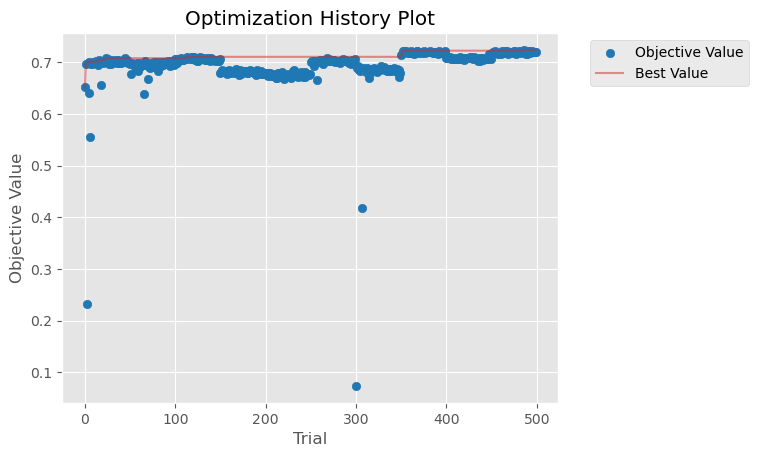

In [96]:
plot_optimization_history(study_xgb);

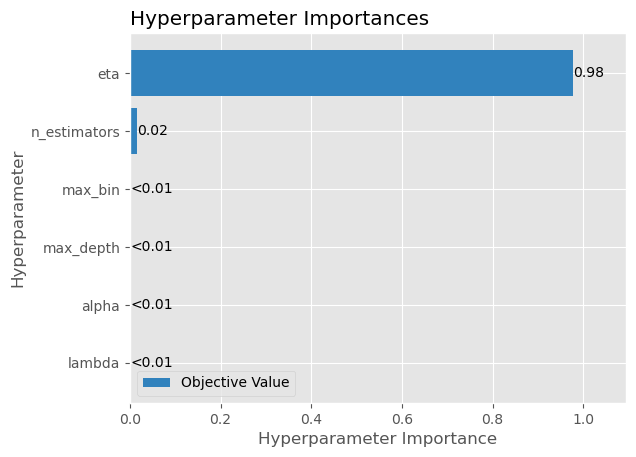

In [97]:
plot_param_importances(study_xgb);

In [98]:
detailed_objective_xgb_CV(study_xgb.best_trial, X, Y, Y_class)

,Metric,Value (average),Value (std)
0,R2,0.705004,0.073735
1,TP,19.300000,2.406011
2,TN,98.400000,1.429841
3,FP,2.100000,1.100505
4,FN,14.100000,2.884826
5,Accuracy,0.879032,0.023728
6,Precision,0.902500,0.053389
7,Sensitivity,0.578908,0.080263
8,Specificity,0.979090,0.010965
9,F1 score,0.702764,0.065740


In [99]:
mat_met_xgb_test['ave'] = mat_met_xgb_test.iloc[:,1:11].mean(axis='columns', numeric_only=True)
mat_met_xgb_test['std'] = mat_met_xgb_test.iloc[:,1:11].std(axis='columns', numeric_only=True)
mat_met_xgb_test

,Metric,Set0,Set1,Set2,Set3,Set4,Set5,Set6,Set7,Set8,Set9,ave,std
0,R2,0.689126,0.712882,0.708425,0.727859,0.704049,0.658896,0.728272,0.613857,0.660581,0.672381,0.687633,0.036277
1,TP,32.000000,41.000000,39.000000,41.000000,38.000000,36.000000,37.000000,33.000000,40.000000,34.000000,37.100000,3.281260
2,TN,201.000000,194.000000,195.000000,197.000000,199.000000,197.000000,198.000000,198.000000,195.000000,199.000000,197.300000,2.162817
3,FP,1.000000,6.000000,5.000000,2.000000,3.000000,3.000000,2.000000,3.000000,5.000000,2.000000,3.200000,1.619328
4,FN,34.000000,27.000000,29.000000,28.000000,28.000000,32.000000,31.000000,34.000000,28.000000,33.000000,30.400000,2.716207
5,Accuracy,0.869403,0.876866,0.873134,0.888060,0.884328,0.869403,0.876866,0.861940,0.876866,0.869403,0.874627,0.007707
6,Precision,0.969697,0.872340,0.886364,0.953488,0.926829,0.923077,0.948718,0.916667,0.888889,0.944444,0.923051,0.032246
7,Sensitivity,0.484848,0.602941,0.573529,0.594203,0.575758,0.529412,0.544118,0.492537,0.588235,0.507463,0.549304,0.043774
8,Specificity,0.995000,0.970000,0.975000,0.989900,0.985100,0.985000,0.990000,0.985100,0.975000,0.990000,0.984010,0.008091
9,F1 score,0.646465,0.713043,0.696429,0.732143,0.710280,0.672897,0.691589,0.640777,0.707965,0.660194,0.687178,0.030740


In [100]:
#change to fit into these X values 

TP = np.empty(10)
FP = np.empty(10)
TN = np.empty(10)
FN = np.empty(10)

r2_scores_outer = []
Accuracy_outer = []
Precision_outer = [] #Also called Positive Predictive Value(PPV)
Sensitivity_outer = [] # Also called Recall or True Positive Rate (TPR)
Specificity_outer = [] #Also called selectivity or True Negative Rate  (TNR)
f1_scores_outer = []
f1_scores_W_outer = []
f1_scores_M_outer = []
BA_scores_outer = []
MCC_outer = []
NPV_outer = []
ROC_AUC_outer = []

NUM_TRIALS = 5
random_state= [687266, 98656, 56, 280189, 76543] # 
data_xgb=pd.DataFrame()

for i in range(NUM_TRIALS):
    cv_change = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state[i])
    data_inner = pd.DataFrame({'y_test_idx': pd.Series(dtype='int'),
                   'y_test': pd.Series(dtype='float'),
                   'y_pred': pd.Series(dtype='float')})
    
    
    for idx, (train_idx, test_idx) in enumerate(cv_change.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        eval_set = [(X_train, y_train), (X_test, y_test)]
        optimizedCV_xgb = xgb.XGBRegressor(objective="reg:squarederror",
                                    random_state=1121218, 
                                    booster ="gbtree", 
                                    tree_method='hist', 
                                    n_estimators = study_xgb.best_params['n_estimators'], 
                                    eta = study_xgb.best_params['eta'],
                                    max_depth = study_xgb.best_params['max_depth'], 
                                    max_bin = study_xgb.best_params['max_bin'], 
                                    reg_lambda = study_xgb.best_params['lambda'], 
                                    alpha =study_xgb.best_params['alpha'],  
                                    n_jobs=4,
                                    subsample=0.8, 
                                   )


        #learn
        eval_set = [(X_test, y_test)]
        optimizedCV_xgb.fit(X_train,y_train, 
            eval_set=eval_set,
            eval_metric=["rmse"],
            early_stopping_rounds=50,
            verbose= False,
                  )
                          
                  
        #print(test_idx)
        y_pred_optimized_xgb = optimizedCV_xgb.predict(X_test) 
        data_inner = data_inner.append(pd.DataFrame({'y_test_idx': test_idx, 'y_test': y_test, 'y_pred_xgb': y_pred_optimized_xgb } ), )
        data_inner.reset_index(inplace=True, drop=True) 
        data_inner.sort_values(by='y_test_idx', inplace=True) 
        
        y_test_cat = np.where(((y_test>=2) | (y_test<=-2)), 1, 0) 
        y_pred_optimized_xgb_cat = np.where(((y_pred_optimized_xgb >= 2) | (y_pred_optimized_xgb <= -2)), 1, 0)
        
        conf_matrix = confusion_matrix(y_test_cat, y_pred_optimized_xgb_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        
        
        r2_scores_outer.append(r2_score(y_test, y_pred_optimized_xgb))
        Accuracy_outer.append(accuracy_score(y_test_cat, y_pred_optimized_xgb_cat))
        Precision_outer.append(precision_score(y_test_cat, y_pred_optimized_xgb_cat))
        Sensitivity_outer.append(recall_score(y_test_cat, y_pred_optimized_xgb_cat))
        Specificity_outer.append(round( TN[idx] / (TN[idx]+FP[idx]),4 ))
        f1_scores_outer.append(f1_score(y_test_cat, y_pred_optimized_xgb_cat))
        f1_scores_W_outer.append(f1_score(y_test_cat, y_pred_optimized_xgb_cat, average="weighted"))
        f1_scores_M_outer.append(f1_score(y_test_cat, y_pred_optimized_xgb_cat, average="macro"))
        BA_scores_outer.append(balanced_accuracy_score(y_test_cat, y_pred_optimized_xgb_cat))
        MCC_outer.append(matthews_corrcoef(y_test_cat, y_pred_optimized_xgb_cat))
        NPV_outer.append(round( TN[idx] / (TN[idx]+FN[idx]),4 ))
        ROC_AUC_outer.append(roc_auc_score(y_test_cat, y_pred_optimized_xgb_cat))
        
    data_xgb['y_test_idx' + str(i)] = data_inner['y_test_idx']
    data_xgb['y_test' + str(i)] = data_inner['y_test']
    data_xgb['y_pred_xgb' + str(i)] = data_inner['y_pred_xgb']
   # data_xgb['correct' + str(i)] = correct_value
   # data_xgb['pred' + str(i)] = y_pred_optimized_xgb

mat_met_optimized_xgb = pd.DataFrame({'Metric':['R2','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores_outer), np.mean(Accuracy_outer),np.mean(Precision_outer),
                                           np.mean(Sensitivity_outer),np.mean(Specificity_outer),np.mean(f1_scores_outer),
                                           np.mean(f1_scores_W_outer), np.mean(f1_scores_M_outer), np.mean(BA_scores_outer), 
                                           np.mean(MCC_outer),np.mean(NPV_outer),np.mean(ROC_AUC_outer)],
                        'Value (std)': [np.std(r2_scores_outer, ddof=1), np.std(Accuracy_outer, ddof=1),np.std(Precision_outer, ddof=1),
                                        np.std(Sensitivity_outer,ddof=1),np.std(Specificity_outer,ddof=1),np.std(f1_scores_outer, ddof=1),
                                        np.std(f1_scores_W_outer, ddof=1),np.std(f1_scores_M_outer, ddof=1), np.std(BA_scores_outer, ddof=1), 
                                        np.std(MCC_outer, ddof=1),np.std(NPV_outer, ddof=1),np.std(ROC_AUC_outer, ddof=1)]
                       }) 


xgb_run0 = data_xgb[['y_test_idx0', 'y_test0', 'y_pred_xgb0']]
xgb_run0.sort_values(by='y_test_idx0', inplace=True)
xgb_run0.reset_index(inplace=True, drop=True)
xgb_run1 = data_xgb[['y_test_idx1', 'y_test1', 'y_pred_xgb1']]
xgb_run1.sort_values(by='y_test_idx1', inplace=True)
xgb_run1.reset_index(inplace=True, drop=True)
xgb_run2 = data_xgb[['y_test_idx2', 'y_test2', 'y_pred_xgb2']]
xgb_run2.sort_values(by='y_test_idx2', inplace=True)
xgb_run2.reset_index(inplace=True, drop=True)
xgb_run3 = data_xgb[['y_test_idx3', 'y_test3', 'y_pred_xgb3']]
xgb_run3.sort_values(by='y_test_idx3', inplace=True)
xgb_run3.reset_index(inplace=True, drop=True)
xgb_run4 = data_xgb[['y_test_idx4', 'y_test4', 'y_pred_xgb4']]
xgb_run4.sort_values(by='y_test_idx4', inplace=True)
xgb_run4.reset_index(inplace=True, drop=True)
chembl_id = df['molecule_chembl_id']
xgb_5preds = pd.concat([chembl_id, xgb_run0, xgb_run1, xgb_run2, xgb_run3, xgb_run4], axis=1)
xgb_5preds = xgb_5preds[['molecule_chembl_id', 'y_test_idx0', 'y_test0', 'y_pred_xgb0', 'y_pred_xgb1', 'y_pred_xgb2', 'y_pred_xgb3', 'y_pred_xgb4']]
xgb_5preds['y_pred_xgb_ave'] = xgb_5preds.iloc[:,2:11].mean(axis='columns', numeric_only=True)
xgb_5preds['y_pred_xgb_std'] = xgb_5preds.iloc[:,2:].std(axis='columns', numeric_only=True)
# maybe also calculate the std for each value

mat_met_optimized_xgb

,Metric,Value (average),Value (std)
0,R2,0.721406,0.053239
1,Accuracy,0.887685,0.025934
2,Precision,0.908828,0.056694
3,Sensitivity,0.612529,0.095113
4,Specificity,0.979108,0.013800
5,F1 score,0.727542,0.074490
6,F1 score (weighted),0.878899,0.030117
7,F1 score (macro),0.828348,0.044823
8,Balanced Accuracy,0.795817,0.048059
9,MCC,0.683695,0.077660


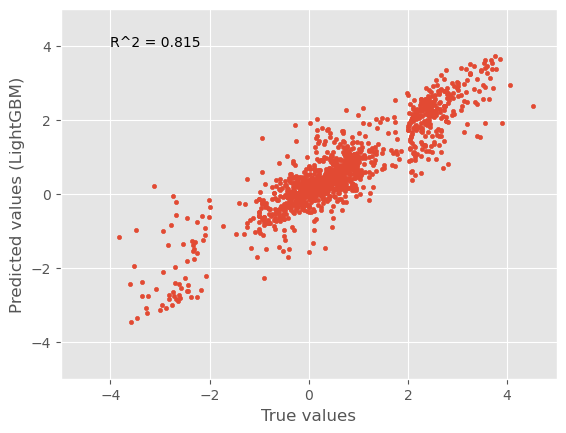

In [101]:
# Scatter plot

limits = -5,5
plt.figsize=(10,10)

plt.scatter(xgb_5preds['y_test0'], xgb_5preds['y_pred_xgb_ave'], marker=".")
lin = np.linspace(*limits, 100)

plt.ylabel("Predicted values (LightGBM)")
plt.xlabel("True values")

plt.xlim(limits)
plt.ylim(limits)

plt.annotate("R^2 = {:.3f}".format(r2_score(xgb_5preds['y_test0'], xgb_5preds['y_pred_xgb_ave'])), (-4, 4))
plt.show()

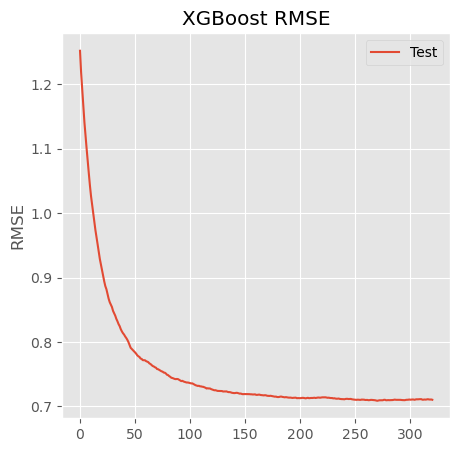

In [102]:
from matplotlib import pyplot
import matplotlib.pyplot as plt  
# retrieve performance metrics
results = optimized_xgb_0.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
    
# plot log loss
fig, ax = pyplot.subplots(figsize=(5,5))
ax.plot(x_axis, results['validation_0']['rmse'], label='Test')
ax.legend()
pyplot.ylabel('RMSE')
pyplot.title('XGBoost RMSE')
pyplot.show()

 # plot classification error
#fig, ax = pyplot.subplots(figsize=(5,5))
#ax.plot(x_axis, results['validation_0']['error'], label='Train')
#ax.plot(x_axis, results['validation_1']['error'], label='Test')
#ax.legend()
    
#pyplot.ylabel('Classification Error')
#pyplot.title('XGBoost Classification Error')
#pyplot.show()

In [103]:
#cross valide using this optimized XGBoost 
fit_params = {'early_stopping_rounds': 50, 
            'eval_set': [(X_tr, Y_tr), (X_te, Y_te)],
              'verbose' : False,
             }

xgb_baseline_CVscore = cross_val_score(xgb_reg, X, Y, cv=10, scoring="r2", )
#cv_xgb_opt_testSet = cross_val_score(optimized_xgb, X, Y, cv=10, scoring="r2", fit_params = fit_params)
cv_xgb_opt = cross_val_score(optimizedCV_xgb, X, Y, cv=10, scoring="r2", fit_params = fit_params)
print("XGBoost baseline model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(xgb_baseline_CVscore), np.std(xgb_baseline_CVscore, ddof=1)))
#print("XGBoost optimized model (tested with Y_te) r2_score %0.4f with a standard deviation of %0.4f" % (cv_xgb_opt_testSet.mean(), cv_xgb_opt_testSet.std()))
print("XGBoost optimized model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(cv_xgb_opt), np.std(cv_xgb_opt, ddof=1)))

XGBoost baseline model r2_score 0.6806 with a standard deviation of 0.0719
XGBoost optimized model r2_score 0.7180 with a standard deviation of 0.0529


In [104]:
joblib.dump(xgb_reg, "OUTPUT/xgb_reg.joblib")
#joblib.dump(optimized_xgb, "OUTPUT/optimized_xgb.joblib")
joblib.dump(optimizedCV_xgb, "OUTPUT/optimizedCV_xgb.joblib")


['OUTPUT/optimizedCV_xgb.joblib']

## KNeighbors (KNN)

In [105]:
%%time


r2_scores = np.empty(10)
TP =np.empty(10)
TN = np.empty(10)
FP = np.empty(10)
FN = np.empty(10)
Accuracy = np.empty(10)
Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
f1_scores = np.empty(10)
f1_scores_W = np.empty(10)
f1_scores_M = np.empty(10)
BA_scores = np.empty(10)
MCC = np.empty(10)
NPV = np.empty(10)
ROC_AUC= np.empty(10)



for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = Y[train_idx], Y[test_idx]

    knn_reg = KNeighborsRegressor()
    
    knn_reg.fit(X_train,y_train)

    y_pred = knn_reg.predict(X_test) 
    # r2 score of the regression model before evaluating categorical evaluation parameters
    r2_scores[idx] = r2_score(y_test, y_pred)
    # now convert the resuls to binary with cutoff 6.3
    y_test_cat = np.where(((y_test>=2) | (y_test<=-2)), 1, 0) 
    y_pred_cat = np.where(((y_pred >= 2) | (y_pred <= -2)), 1, 0)
    #calculate the evaluation results
    conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
    TP[idx] = conf_matrix[1][1]
    TN[idx] = conf_matrix[0][0]
    FP[idx] = conf_matrix[0][1] 
    FN[idx] = conf_matrix[1][0]
    Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
    Precision[idx] = precision_score(y_test_cat, y_pred_cat)
    Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
    Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
    f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
    f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
    f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
    BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
    MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
    NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
    ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)


mat_met = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })  
    
print(mat_met)


                 Metric  Value (average)  Value (std)
0                    R2         0.670702     0.100533
1                    TP        20.700000     2.710064
2                    TN        98.200000     1.988858
3                    FP         2.300000     1.946507
4                    FN        12.700000     3.128720
5              Accuracy         0.887970     0.032074
6             Precision         0.900579     0.086731
7           Sensitivity         0.620791     0.087166
8           Specificity         0.977130     0.019380
9              F1 score         0.732763     0.081611
10  F1 score (weighted)         0.880000     0.035900
11     F1 score (macro)         0.830934     0.050730
12    Balanced Accuracy         0.798960     0.048762
13                  MCC         0.685103     0.097150
14                  NPV         0.885870     0.026080
15              ROC_AUC         0.798960     0.048762
CPU times: user 1.31 s, sys: 5.22 s, total: 6.52 s
Wall time: 332 ms


In [106]:
def objective_knn_CV(trial, X, Y, Y_class):
    param_grid = {
        "n_neighbors" : trial.suggest_int("n_neighbors", 5, 30),
        "weights" :trial.suggest_categorical("weights", ['uniform', 'distance']),
        "metric" : trial.suggest_categorical("metric", ['euclidean', 'manhattan', 'minkowski']),
        "leaf_size": trial.suggest_int("leaf_size", 20, 100)
        #"device_type": trial.suggest_categorical("device_type", ['gpu']),
        
    }
    
   
    cv_scores=np.empty(10)
    
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        knn_model = KNeighborsRegressor(**param_grid, n_jobs=4)
        knn_model.fit(X_train,y_train)
    
        y_pred = knn_model.predict(X_test)
    
    
        cv_scores[idx] = r2_score(y_test, y_pred)
       
        
    return np.mean(cv_scores)

In [107]:
def detailed_objective_knn_CV(trial, X, Y, Y_class):
    param_grid = {
        "n_neighbors" : trial.suggest_int("n_neighbors", 1, 30),
        "weights" :trial.suggest_categorical("weights", ['uniform', 'distance']),
        "metric" : trial.suggest_categorical("metric", ['euclidean', 'manhattan', 'minkowski']),
        "leaf_size": trial.suggest_int("leaf_size", 20, 100)
        #"device_type": trial.suggest_categorical("device_type", ['gpu']),      
    }
    
    r2_scores = np.empty(10)
    TP =np.empty(10)
    TN = np.empty(10)
    FP = np.empty(10)
    FN = np.empty(10)
    Accuracy = np.empty(10)
    Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
    Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
    Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
    f1_scores = np.empty(10)
    f1_scores_W = np.empty(10)
    f1_scores_M = np.empty(10)
    BA_scores = np.empty(10)
    MCC = np.empty(10)
    NPV = np.empty(10)
    ROC_AUC= np.empty(10)

    cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=1121218)
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        knn_model = KNeighborsRegressor(**param_grid, n_jobs=4)
        knn_model.fit(X_train,y_train)
    
        y_pred = knn_model.predict(X_test)
        
        # r2 score of the regression model before evaluating categorical evaluation parameters
        r2_scores[idx] = r2_score(y_test, y_pred)
        # now convert the resuls to binary with cutoff 6.3
        y_test_cat = np.where(((y_test>=2) | (y_test<=-2)), 1, 0) 
        y_pred_cat = np.where(((y_pred >= 2) | (y_pred <= -2)), 1, 0)
        #calculate the evaluation results
        conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
        Precision[idx] = precision_score(y_test_cat, y_pred_cat)
        Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
        f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
        f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
        MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)


    mat_met = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [ np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })  
    
    return(mat_met)
    

In [108]:
#Execute optuna and set hyperparameters
study_knn = optuna.create_study(direction='maximize', study_name="KNNregressor")
func_knn_0 = lambda trial: objective_knn_CV(trial, X_trainSet0, Y_trainSet0, Y_trainSet0_class)
study_knn.optimize(func_knn_0, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 08:37:00,140] A new study created in memory with name: KNNregressor
[I 2023-12-20 08:37:00,317] Trial 0 finished with value: 0.5824926560250308 and parameters: {'n_neighbors': 15, 'weights': 'uniform', 'metric': 'minkowski', 'leaf_size': 52}. Best is trial 0 with value: 0.5824926560250308.
[I 2023-12-20 08:37:00,477] Trial 1 finished with value: 0.5835275969448117 and parameters: {'n_neighbors': 20, 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 65}. Best is trial 1 with value: 0.5835275969448117.
[I 2023-12-20 08:37:00,638] Trial 2 finished with value: 0.5620217086819621 and parameters: {'n_neighbors': 23, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 24}. Best is trial 1 with value: 0.5835275969448117.
[I 2023-12-20 08:37:00,795] Trial 3 finished with value: 0.5245874010146381 and parameters: {'n_neighbors': 22, 'weights': 'uniform', 'metric': 'euclidean', 'leaf_size': 32}. Best is trial 1 with value: 0.5835275969448117.
[I 2023-12-20 08:37:00,9

	Number of trials: 50.0
	Best value (r2_score): 0.6922
	Best params:
		n_neighbors: 5
		weights: distance
		metric: manhattan
		leaf_size: 86


In [109]:
#Create an instance with tuned hyperparameters

optimized_knn_0 = KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=4,
                                                 )

    
#learn


optimized_knn_0.fit(X_trainSet0,Y_trainSet0, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_0 = optimized_knn_0.predict(X_testSet0)
r2_scores = r2_score(Y_testSet0, y_pred_knn_0)
# now convert the resuls to binary with cutoff 
Y_testSet0_cat = np.where(((Y_testSet0>=2) | (Y_testSet0<=-2)), 1, 0) 
y_pred_knn_0_cat = np.where(((y_pred_knn_0 >= 2) | (y_pred_knn_0 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet0_cat, y_pred_knn_0_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet0_cat, y_pred_knn_0_cat)
Precision = precision_score(Y_testSet0_cat, y_pred_knn_0_cat)
Sensitivity = recall_score(Y_testSet0_cat, y_pred_knn_0_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet0_cat, y_pred_knn_0_cat)      
f1_scores_W = f1_score(Y_testSet0_cat, y_pred_knn_0_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet0_cat, y_pred_knn_0_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet0_cat, y_pred_knn_0_cat)
MCC = matthews_corrcoef(Y_testSet0_cat, y_pred_knn_0_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet0_cat, y_pred_knn_0_cat)
    

mat_met_knn_test = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Set0':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })    
print(mat_met_knn_test)


                 Metric        Set0
0                    R2    0.698571
1                    TP   44.000000
2                    TN  198.000000
3                    FP    4.000000
4                    FN   22.000000
5              Accuracy    0.902985
6             Precision    0.916667
7           Sensitivity    0.666667
8           Specificity    0.980200
9              F1 score    0.771930
10  F1 score (weighted)    0.897395
11     F1 score (macro)    0.855159
12    Balanced Accuracy    0.823432
13                  MCC    0.726824
14                  NPV    0.900000
15              ROC_AUC    0.823432


In [110]:
#Execute optuna and set hyperparameters

func_knn_1 = lambda trial: objective_knn_CV(trial, X_trainSet1, Y_trainSet1, Y_trainSet1_class)
study_knn.optimize(func_knn_1, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 08:37:11,576] Trial 50 finished with value: 0.6186713341630184 and parameters: {'n_neighbors': 12, 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 48}. Best is trial 6 with value: 0.6922131213173545.
[I 2023-12-20 08:37:11,847] Trial 51 finished with value: 0.699183999496056 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 72}. Best is trial 51 with value: 0.699183999496056.
[I 2023-12-20 08:37:12,104] Trial 52 finished with value: 0.6854035803768378 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 72}. Best is trial 51 with value: 0.699183999496056.
[I 2023-12-20 08:37:12,366] Trial 53 finished with value: 0.699183999496056 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 66}. Best is trial 51 with value: 0.699183999496056.
[I 2023-12-20 08:37:12,628] Trial 54 finished with value: 0.6912413205695186 and parameters: {'n_neighbor

	Number of trials: 100.0
	Best value (r2_score): 0.6992
	Best params:
		n_neighbors: 5
		weights: distance
		metric: manhattan
		leaf_size: 72


In [111]:
#Create an instance with tuned hyperparameters

optimized_knn_1 =  KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=4,
                                                 )

    
#learn


optimized_knn_1.fit(X_trainSet1,Y_trainSet1, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_1 = optimized_knn_1.predict(X_testSet1)
r2_scores = r2_score(Y_testSet1, y_pred_knn_1)
# now convert the resuls to binary with cutoff 
Y_testSet1_cat = np.where(((Y_testSet1>=2) | (Y_testSet1<=-2)), 1, 0) 
y_pred_knn_1_cat = np.where(((y_pred_knn_1 >= 2) | (y_pred_knn_1 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet1_cat, y_pred_knn_1_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet1_cat, y_pred_knn_1_cat)
Precision = precision_score(Y_testSet1_cat, y_pred_knn_1_cat)
Sensitivity = recall_score(Y_testSet1_cat, y_pred_knn_1_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet1_cat, y_pred_knn_1_cat)      
f1_scores_W = f1_score(Y_testSet1_cat, y_pred_knn_1_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet1_cat, y_pred_knn_1_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet1_cat, y_pred_knn_1_cat)
MCC = matthews_corrcoef(Y_testSet1_cat, y_pred_knn_1_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet1_cat, y_pred_knn_1_cat)
    

set1 = pd.DataFrame({'Set1':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set1'] = set1
print(mat_met_knn_test)


                 Metric        Set0        Set1
0                    R2    0.698571    0.677845
1                    TP   44.000000   44.000000
2                    TN  198.000000  197.000000
3                    FP    4.000000    3.000000
4                    FN   22.000000   24.000000
5              Accuracy    0.902985    0.899254
6             Precision    0.916667    0.936170
7           Sensitivity    0.666667    0.647059
8           Specificity    0.980200    0.985000
9              F1 score    0.771930    0.765217
10  F1 score (weighted)    0.897395    0.892568
11     F1 score (macro)    0.855159    0.850542
12    Balanced Accuracy    0.823432    0.816029
13                  MCC    0.726824    0.723239
14                  NPV    0.900000    0.891400
15              ROC_AUC    0.823432    0.816029


In [112]:
#Execute optuna and set hyperparameters

func_knn_2 = lambda trial: objective_knn_CV(trial, X_trainSet2, Y_trainSet2, Y_trainSet2_class)
study_knn.optimize(func_knn_2, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 08:37:23,891] Trial 100 finished with value: 0.6666300225168657 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'minkowski', 'leaf_size': 83}. Best is trial 51 with value: 0.699183999496056.
[I 2023-12-20 08:37:24,157] Trial 101 finished with value: 0.6920098907843011 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 61}. Best is trial 51 with value: 0.699183999496056.
[I 2023-12-20 08:37:24,422] Trial 102 finished with value: 0.6920098907843011 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 59}. Best is trial 51 with value: 0.699183999496056.
[I 2023-12-20 08:37:24,678] Trial 103 finished with value: 0.6757839220832663 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 66}. Best is trial 51 with value: 0.699183999496056.
[I 2023-12-20 08:37:24,933] Trial 104 finished with value: 0.6920098907843011 and parameters: {'n_ne

	Number of trials: 150.0
	Best value (r2_score): 0.6992
	Best params:
		n_neighbors: 5
		weights: distance
		metric: manhattan
		leaf_size: 72


In [113]:
#Create an instance with tuned hyperparameters

optimized_knn_2 = KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=4,
                                                 )

    
#learn


optimized_knn_2.fit(X_trainSet2,Y_trainSet2, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_2 = optimized_knn_2.predict(X_testSet2)
r2_scores = r2_score(Y_testSet2, y_pred_knn_2)
# now convert the resuls to binary with cutoff 
Y_testSet2_cat = np.where(((Y_testSet2>=2) | (Y_testSet2<=-2)), 1, 0) 
y_pred_knn_2_cat = np.where(((y_pred_knn_2 >= 2) | (y_pred_knn_2 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet2_cat, y_pred_knn_2_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet2_cat, y_pred_knn_2_cat)
Precision = precision_score(Y_testSet2_cat, y_pred_knn_2_cat)
Sensitivity = recall_score(Y_testSet2_cat, y_pred_knn_2_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet2_cat, y_pred_knn_2_cat)      
f1_scores_W = f1_score(Y_testSet2_cat, y_pred_knn_2_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet2_cat, y_pred_knn_2_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet2_cat, y_pred_knn_2_cat)
MCC = matthews_corrcoef(Y_testSet2_cat, y_pred_knn_2_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet2_cat, y_pred_knn_2_cat)
    

Set2 = pd.DataFrame({'Set2':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set2'] = Set2
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2
0                    R2    0.698571    0.677845    0.679705
1                    TP   44.000000   44.000000   45.000000
2                    TN  198.000000  197.000000  194.000000
3                    FP    4.000000    3.000000    6.000000
4                    FN   22.000000   24.000000   23.000000
5              Accuracy    0.902985    0.899254    0.891791
6             Precision    0.916667    0.936170    0.882353
7           Sensitivity    0.666667    0.647059    0.661765
8           Specificity    0.980200    0.985000    0.970000
9              F1 score    0.771930    0.765217    0.756303
10  F1 score (weighted)    0.897395    0.892568    0.886268
11     F1 score (macro)    0.855159    0.850542    0.843379
12    Balanced Accuracy    0.823432    0.816029    0.815882
13                  MCC    0.726824    0.723239    0.700341
14                  NPV    0.900000    0.891400    0.894000
15              ROC_AUC    0.823432    0

In [114]:
#Execute optuna and set hyperparameters

func_knn_3 = lambda trial: objective_knn_CV(trial, X_trainSet3, Y_trainSet3, Y_trainSet3_class)
study_knn.optimize(func_knn_3, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 08:37:35,461] Trial 150 finished with value: 0.6718463605355142 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 74}. Best is trial 51 with value: 0.699183999496056.
[I 2023-12-20 08:37:35,725] Trial 151 finished with value: 0.6718463605355142 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 78}. Best is trial 51 with value: 0.699183999496056.
[I 2023-12-20 08:37:35,991] Trial 152 finished with value: 0.6718463605355142 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 82}. Best is trial 51 with value: 0.699183999496056.
[I 2023-12-20 08:37:36,257] Trial 153 finished with value: 0.6659320853834826 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 71}. Best is trial 51 with value: 0.699183999496056.
[I 2023-12-20 08:37:36,523] Trial 154 finished with value: 0.6718463605355142 and parameters: {'n_ne

	Number of trials: 200.0
	Best value (r2_score): 0.6992
	Best params:
		n_neighbors: 5
		weights: distance
		metric: manhattan
		leaf_size: 72


In [115]:
#Create an instance with tuned hyperparameters

optimized_knn_3 = KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=4,
                                                 )

    
#learn


optimized_knn_3.fit(X_trainSet3,Y_trainSet3, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_3 = optimized_knn_3.predict(X_testSet3)
r2_scores = r2_score(Y_testSet3, y_pred_knn_3)
# now convert the resuls to binary with cutoff 
Y_testSet3_cat = np.where(((Y_testSet3>=2) | (Y_testSet3<=-2)), 1, 0) 
y_pred_knn_3_cat = np.where(((y_pred_knn_3 >= 2) | (y_pred_knn_3 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet3_cat, y_pred_knn_3_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet3_cat, y_pred_knn_3_cat)
Precision = precision_score(Y_testSet3_cat, y_pred_knn_3_cat)
Sensitivity = recall_score(Y_testSet3_cat, y_pred_knn_3_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet3_cat, y_pred_knn_3_cat)      
f1_scores_W = f1_score(Y_testSet3_cat, y_pred_knn_3_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet3_cat, y_pred_knn_3_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet3_cat, y_pred_knn_3_cat)
MCC = matthews_corrcoef(Y_testSet3_cat, y_pred_knn_3_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet3_cat, y_pred_knn_3_cat)
    

Set3 = pd.DataFrame({'Set3':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set3'] = Set3
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3
0                    R2    0.698571    0.677845    0.679705    0.719101
1                    TP   44.000000   44.000000   45.000000   44.000000
2                    TN  198.000000  197.000000  194.000000  193.000000
3                    FP    4.000000    3.000000    6.000000    6.000000
4                    FN   22.000000   24.000000   23.000000   25.000000
5              Accuracy    0.902985    0.899254    0.891791    0.884328
6             Precision    0.916667    0.936170    0.882353    0.880000
7           Sensitivity    0.666667    0.647059    0.661765    0.637681
8           Specificity    0.980200    0.985000    0.970000    0.969800
9              F1 score    0.771930    0.765217    0.756303    0.739496
10  F1 score (weighted)    0.897395    0.892568    0.886268    0.877729
11     F1 score (macro)    0.855159    0.850542    0.843379    0.832578
12    Balanced Accuracy    0.823432    0.816029    0.815882    0

In [116]:
#Execute optuna and set hyperparameters

func_knn_4 = lambda trial: objective_knn_CV(trial, X_trainSet4, Y_trainSet4, Y_trainSet4_class)
study_knn.optimize(func_knn_4, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 08:37:47,399] Trial 200 finished with value: 0.6581905080749869 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 67}. Best is trial 51 with value: 0.699183999496056.
[I 2023-12-20 08:37:47,637] Trial 201 finished with value: 0.6581905080749869 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 58}. Best is trial 51 with value: 0.699183999496056.
[I 2023-12-20 08:37:47,846] Trial 202 finished with value: 0.6581905080749869 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 30}. Best is trial 51 with value: 0.699183999496056.
[I 2023-12-20 08:37:48,024] Trial 203 finished with value: 0.6581905080749869 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 61}. Best is trial 51 with value: 0.699183999496056.
[I 2023-12-20 08:37:48,216] Trial 204 finished with value: 0.6640506679392918 and parameters: {'n_ne

	Number of trials: 250.0
	Best value (r2_score): 0.6992
	Best params:
		n_neighbors: 5
		weights: distance
		metric: manhattan
		leaf_size: 72


In [117]:
#Create an instance with tuned hyperparameters

optimized_knn_4 =  KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=4,
                                                 )

    
#learn


optimized_knn_4.fit(X_trainSet4,Y_trainSet4, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_4 = optimized_knn_4.predict(X_testSet4)
r2_scores = r2_score(Y_testSet4, y_pred_knn_4)
# now convert the resuls to binary with cutoff 
Y_testSet4_cat = np.where(((Y_testSet4>=2) | (Y_testSet4<=-2)), 1, 0) 
y_pred_knn_4_cat = np.where(((y_pred_knn_4 >= 2) | (y_pred_knn_4 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet4_cat, y_pred_knn_4_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet4_cat, y_pred_knn_4_cat)
Precision = precision_score(Y_testSet4_cat, y_pred_knn_4_cat)
Sensitivity = recall_score(Y_testSet4_cat, y_pred_knn_4_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet4_cat, y_pred_knn_4_cat)      
f1_scores_W = f1_score(Y_testSet4_cat, y_pred_knn_4_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet4_cat, y_pred_knn_4_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet4_cat, y_pred_knn_4_cat)
MCC = matthews_corrcoef(Y_testSet4_cat, y_pred_knn_4_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet4_cat, y_pred_knn_4_cat)
    

Set4 = pd.DataFrame({'Set4':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set4'] = Set4
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.698571    0.677845    0.679705    0.719101   
1                    TP   44.000000   44.000000   45.000000   44.000000   
2                    TN  198.000000  197.000000  194.000000  193.000000   
3                    FP    4.000000    3.000000    6.000000    6.000000   
4                    FN   22.000000   24.000000   23.000000   25.000000   
5              Accuracy    0.902985    0.899254    0.891791    0.884328   
6             Precision    0.916667    0.936170    0.882353    0.880000   
7           Sensitivity    0.666667    0.647059    0.661765    0.637681   
8           Specificity    0.980200    0.985000    0.970000    0.969800   
9              F1 score    0.771930    0.765217    0.756303    0.739496   
10  F1 score (weighted)    0.897395    0.892568    0.886268    0.877729   
11     F1 score (macro)    0.855159    0.850542    0.843379    0.832578   
12    Balanced Accuracy  

In [118]:
#Execute optuna and set hyperparameters

func_knn_5 = lambda trial: objective_knn_CV(trial, X_trainSet5, Y_trainSet5, Y_trainSet5_class)
study_knn.optimize(func_knn_5, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 08:38:00,036] Trial 250 finished with value: 0.6779888161277619 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 68}. Best is trial 51 with value: 0.699183999496056.
[I 2023-12-20 08:38:00,296] Trial 251 finished with value: 0.6779888161277619 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 63}. Best is trial 51 with value: 0.699183999496056.
[I 2023-12-20 08:38:00,556] Trial 252 finished with value: 0.6823427977103319 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 66}. Best is trial 51 with value: 0.699183999496056.
[I 2023-12-20 08:38:00,816] Trial 253 finished with value: 0.6823427977103319 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 61}. Best is trial 51 with value: 0.699183999496056.
[I 2023-12-20 08:38:01,077] Trial 254 finished with value: 0.5897824208418088 and parameters: {'n_ne

	Number of trials: 300.0
	Best value (r2_score): 0.6992
	Best params:
		n_neighbors: 5
		weights: distance
		metric: manhattan
		leaf_size: 72


In [119]:
#Create an instance with tuned hyperparameters

optimized_knn_5 = KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=4,
                                                 )

    
#learn


optimized_knn_5.fit(X_trainSet5,Y_trainSet5, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_5 = optimized_knn_5.predict(X_testSet5)
r2_scores = r2_score(Y_testSet5, y_pred_knn_5)
# now convert the resuls to binary with cutoff 
Y_testSet5_cat = np.where(((Y_testSet5>=2) | (Y_testSet5<=-2)), 1, 0) 
y_pred_knn_5_cat = np.where(((y_pred_knn_5 >= 2) | (y_pred_knn_5 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet5_cat, y_pred_knn_5_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet5_cat, y_pred_knn_5_cat)
Precision = precision_score(Y_testSet5_cat, y_pred_knn_5_cat)
Sensitivity = recall_score(Y_testSet5_cat, y_pred_knn_5_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet5_cat, y_pred_knn_5_cat)      
f1_scores_W = f1_score(Y_testSet5_cat, y_pred_knn_5_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet5_cat, y_pred_knn_5_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet5_cat, y_pred_knn_5_cat)
MCC = matthews_corrcoef(Y_testSet5_cat, y_pred_knn_5_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet5_cat, y_pred_knn_5_cat)
    

Set5 = pd.DataFrame({'Set5':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set5'] = Set5
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.698571    0.677845    0.679705    0.719101   
1                    TP   44.000000   44.000000   45.000000   44.000000   
2                    TN  198.000000  197.000000  194.000000  193.000000   
3                    FP    4.000000    3.000000    6.000000    6.000000   
4                    FN   22.000000   24.000000   23.000000   25.000000   
5              Accuracy    0.902985    0.899254    0.891791    0.884328   
6             Precision    0.916667    0.936170    0.882353    0.880000   
7           Sensitivity    0.666667    0.647059    0.661765    0.637681   
8           Specificity    0.980200    0.985000    0.970000    0.969800   
9              F1 score    0.771930    0.765217    0.756303    0.739496   
10  F1 score (weighted)    0.897395    0.892568    0.886268    0.877729   
11     F1 score (macro)    0.855159    0.850542    0.843379    0.832578   
12    Balanced Accuracy  

In [120]:
#Execute optuna and set hyperparameters

func_knn_6 = lambda trial: objective_knn_CV(trial, X_trainSet6, Y_trainSet6, Y_trainSet6_class)
study_knn.optimize(func_knn_6, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 08:38:12,438] Trial 300 finished with value: 0.660127993524993 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 75}. Best is trial 51 with value: 0.699183999496056.
[I 2023-12-20 08:38:12,610] Trial 301 finished with value: 0.649168435142831 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'euclidean', 'leaf_size': 72}. Best is trial 51 with value: 0.699183999496056.
[I 2023-12-20 08:38:12,877] Trial 302 finished with value: 0.6622002837093166 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 67}. Best is trial 51 with value: 0.699183999496056.
[I 2023-12-20 08:38:13,134] Trial 303 finished with value: 0.660127993524993 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 69}. Best is trial 51 with value: 0.699183999496056.
[I 2023-12-20 08:38:13,402] Trial 304 finished with value: 0.6622002837093166 and parameters: {'n_neigh

	Number of trials: 350.0
	Best value (r2_score): 0.6992
	Best params:
		n_neighbors: 5
		weights: distance
		metric: manhattan
		leaf_size: 72


In [121]:
#Create an instance with tuned hyperparameters

optimized_knn_6 =  KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=4,
                                                 )

    
#learn


optimized_knn_6.fit(X_trainSet6,Y_trainSet6, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_6 = optimized_knn_6.predict(X_testSet6)
r2_scores = r2_score(Y_testSet6, y_pred_knn_6)
# now convert the resuls to binary with cutoff 
Y_testSet6_cat = np.where(((Y_testSet6>=2) | (Y_testSet6<=-2)), 1, 0) 
y_pred_knn_6_cat = np.where(((y_pred_knn_6 >= 2) | (y_pred_knn_6 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet6_cat, y_pred_knn_6_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet6_cat, y_pred_knn_6_cat)
Precision = precision_score(Y_testSet6_cat, y_pred_knn_6_cat)
Sensitivity = recall_score(Y_testSet6_cat, y_pred_knn_6_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet6_cat, y_pred_knn_6_cat)      
f1_scores_W = f1_score(Y_testSet6_cat, y_pred_knn_6_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet6_cat, y_pred_knn_6_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet6_cat, y_pred_knn_6_cat)
MCC = matthews_corrcoef(Y_testSet6_cat, y_pred_knn_6_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet6_cat, y_pred_knn_6_cat)
    

Set6 = pd.DataFrame({'Set6':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set6'] = Set6
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.698571    0.677845    0.679705    0.719101   
1                    TP   44.000000   44.000000   45.000000   44.000000   
2                    TN  198.000000  197.000000  194.000000  193.000000   
3                    FP    4.000000    3.000000    6.000000    6.000000   
4                    FN   22.000000   24.000000   23.000000   25.000000   
5              Accuracy    0.902985    0.899254    0.891791    0.884328   
6             Precision    0.916667    0.936170    0.882353    0.880000   
7           Sensitivity    0.666667    0.647059    0.661765    0.637681   
8           Specificity    0.980200    0.985000    0.970000    0.969800   
9              F1 score    0.771930    0.765217    0.756303    0.739496   
10  F1 score (weighted)    0.897395    0.892568    0.886268    0.877729   
11     F1 score (macro)    0.855159    0.850542    0.843379    0.832578   
12    Balanced Accuracy  

In [122]:
#Execute optuna and set hyperparameters

func_knn_7 = lambda trial: objective_knn_CV(trial, X_trainSet7, Y_trainSet7, Y_trainSet7_class)
study_knn.optimize(func_knn_7, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 08:38:24,276] Trial 350 finished with value: 0.7160247874379679 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 79}. Best is trial 350 with value: 0.7160247874379679.
[I 2023-12-20 08:38:24,547] Trial 351 finished with value: 0.7160247874379679 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 79}. Best is trial 350 with value: 0.7160247874379679.
[I 2023-12-20 08:38:24,818] Trial 352 finished with value: 0.7160247874379679 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 79}. Best is trial 350 with value: 0.7160247874379679.
[I 2023-12-20 08:38:25,089] Trial 353 finished with value: 0.7160247874379679 and parameters: {'n_neighbors': 5, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 79}. Best is trial 350 with value: 0.7160247874379679.
[I 2023-12-20 08:38:25,351] Trial 354 finished with value: 0.7160247874379679 and parameters

	Number of trials: 400.0
	Best value (r2_score): 0.7160
	Best params:
		n_neighbors: 5
		weights: distance
		metric: manhattan
		leaf_size: 79


In [123]:
#Create an instance with tuned hyperparameters

optimized_knn_7 =  KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=4,
                                                 )

    
#learn


optimized_knn_7.fit(X_trainSet7,Y_trainSet7, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_7 = optimized_knn_7.predict(X_testSet7)
r2_scores = r2_score(Y_testSet7, y_pred_knn_7)
# now convert the resuls to binary with cutoff 
Y_testSet7_cat = np.where(((Y_testSet7>=2) | (Y_testSet7<=-2)), 1, 0) 
y_pred_knn_7_cat = np.where(((y_pred_knn_7 >= 2) | (y_pred_knn_7 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet7_cat, y_pred_knn_7_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet7_cat, y_pred_knn_7_cat)
Precision = precision_score(Y_testSet7_cat, y_pred_knn_7_cat)
Sensitivity = recall_score(Y_testSet7_cat, y_pred_knn_7_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet7_cat, y_pred_knn_7_cat)      
f1_scores_W = f1_score(Y_testSet7_cat, y_pred_knn_7_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet7_cat, y_pred_knn_7_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet7_cat, y_pred_knn_7_cat)
MCC = matthews_corrcoef(Y_testSet7_cat, y_pred_knn_7_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet7_cat, y_pred_knn_7_cat)
    

Set7 = pd.DataFrame({'Set7':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set7'] = Set7
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.698571    0.677845    0.679705    0.719101   
1                    TP   44.000000   44.000000   45.000000   44.000000   
2                    TN  198.000000  197.000000  194.000000  193.000000   
3                    FP    4.000000    3.000000    6.000000    6.000000   
4                    FN   22.000000   24.000000   23.000000   25.000000   
5              Accuracy    0.902985    0.899254    0.891791    0.884328   
6             Precision    0.916667    0.936170    0.882353    0.880000   
7           Sensitivity    0.666667    0.647059    0.661765    0.637681   
8           Specificity    0.980200    0.985000    0.970000    0.969800   
9              F1 score    0.771930    0.765217    0.756303    0.739496   
10  F1 score (weighted)    0.897395    0.892568    0.886268    0.877729   
11     F1 score (macro)    0.855159    0.850542    0.843379    0.832578   
12    Balanced Accuracy  

In [124]:
#Execute optuna and set hyperparameters

func_knn_8 = lambda trial: objective_knn_CV(trial, X_trainSet8, Y_trainSet8, Y_trainSet8_class)
study_knn.optimize(func_knn_8, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 08:38:36,293] Trial 400 finished with value: 0.6759208585658186 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 81}. Best is trial 350 with value: 0.7160247874379679.
[I 2023-12-20 08:38:36,539] Trial 401 finished with value: 0.6647820565881358 and parameters: {'n_neighbors': 9, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 78}. Best is trial 350 with value: 0.7160247874379679.
[I 2023-12-20 08:38:36,807] Trial 402 finished with value: 0.6759208585658186 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 84}. Best is trial 350 with value: 0.7160247874379679.
[I 2023-12-20 08:38:37,062] Trial 403 finished with value: 0.6700820760930126 and parameters: {'n_neighbors': 8, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 80}. Best is trial 350 with value: 0.7160247874379679.
[I 2023-12-20 08:38:37,305] Trial 404 finished with value: 0.6759208585658186 and parameters

	Number of trials: 450.0
	Best value (r2_score): 0.7160
	Best params:
		n_neighbors: 5
		weights: distance
		metric: manhattan
		leaf_size: 79


In [125]:
#Create an instance with tuned hyperparameters

optimized_knn_8 =  KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=4,
                                                 )

    
#learn


optimized_knn_8.fit(X_trainSet8,Y_trainSet8, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_8 = optimized_knn_8.predict(X_testSet8)
r2_scores = r2_score(Y_testSet8, y_pred_knn_8)
# now convert the resuls to binary with cutoff 
Y_testSet8_cat = np.where(((Y_testSet8>=2) | (Y_testSet8<=-2)), 1, 0) 
y_pred_knn_8_cat = np.where(((y_pred_knn_8 >= 2) | (y_pred_knn_8 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet8_cat, y_pred_knn_8_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet8_cat, y_pred_knn_8_cat)
Precision = precision_score(Y_testSet8_cat, y_pred_knn_8_cat)
Sensitivity = recall_score(Y_testSet8_cat, y_pred_knn_8_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet8_cat, y_pred_knn_8_cat)      
f1_scores_W = f1_score(Y_testSet8_cat, y_pred_knn_8_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet8_cat, y_pred_knn_8_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet8_cat, y_pred_knn_8_cat)
MCC = matthews_corrcoef(Y_testSet8_cat, y_pred_knn_8_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet8_cat, y_pred_knn_8_cat)
    

Set8 = pd.DataFrame({'Set8':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set8'] = Set8
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.698571    0.677845    0.679705    0.719101   
1                    TP   44.000000   44.000000   45.000000   44.000000   
2                    TN  198.000000  197.000000  194.000000  193.000000   
3                    FP    4.000000    3.000000    6.000000    6.000000   
4                    FN   22.000000   24.000000   23.000000   25.000000   
5              Accuracy    0.902985    0.899254    0.891791    0.884328   
6             Precision    0.916667    0.936170    0.882353    0.880000   
7           Sensitivity    0.666667    0.647059    0.661765    0.637681   
8           Specificity    0.980200    0.985000    0.970000    0.969800   
9              F1 score    0.771930    0.765217    0.756303    0.739496   
10  F1 score (weighted)    0.897395    0.892568    0.886268    0.877729   
11     F1 score (macro)    0.855159    0.850542    0.843379    0.832578   
12    Balanced Accuracy  

In [126]:
#Execute optuna and set hyperparameters

func_knn_9 = lambda trial: objective_knn_CV(trial, X_trainSet9, Y_trainSet9, Y_trainSet9_class)
study_knn.optimize(func_knn_9, n_trials=50)
print(f"\tNumber of trials: {len(study_knn.trials):.1f}")
print(f"\tBest value (r2_score): {study_knn.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_knn.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 08:38:48,253] Trial 450 finished with value: 0.6717118080231742 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 79}. Best is trial 350 with value: 0.7160247874379679.
[I 2023-12-20 08:38:48,530] Trial 451 finished with value: 0.6685032780757941 and parameters: {'n_neighbors': 7, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 82}. Best is trial 350 with value: 0.7160247874379679.
[I 2023-12-20 08:38:48,806] Trial 452 finished with value: 0.6171225580420795 and parameters: {'n_neighbors': 8, 'weights': 'uniform', 'metric': 'manhattan', 'leaf_size': 85}. Best is trial 350 with value: 0.7160247874379679.
[I 2023-12-20 08:38:49,082] Trial 453 finished with value: 0.6717118080231742 and parameters: {'n_neighbors': 6, 'weights': 'distance', 'metric': 'manhattan', 'leaf_size': 77}. Best is trial 350 with value: 0.7160247874379679.
[I 2023-12-20 08:38:49,358] Trial 454 finished with value: 0.6685032780757941 and parameters:

	Number of trials: 500.0
	Best value (r2_score): 0.7160
	Best params:
		n_neighbors: 5
		weights: distance
		metric: manhattan
		leaf_size: 79


In [127]:
#Create an instance with tuned hyperparameters

optimized_knn_9 = KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=4,
                                                 )

    
#learn


optimized_knn_9.fit(X_trainSet9,Y_trainSet9, )

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_knn_9 = optimized_knn_9.predict(X_testSet9)
r2_scores = r2_score(Y_testSet9, y_pred_knn_9)
# now convert the resuls to binary with cutoff 
Y_testSet9_cat = np.where(((Y_testSet9>=2) | (Y_testSet9<=-2)), 1, 0) 
y_pred_knn_9_cat = np.where(((y_pred_knn_9 >= 2) | (y_pred_knn_9 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet9_cat, y_pred_knn_9_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet9_cat, y_pred_knn_9_cat)
Precision = precision_score(Y_testSet9_cat, y_pred_knn_9_cat)
Sensitivity = recall_score(Y_testSet9_cat, y_pred_knn_9_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet9_cat, y_pred_knn_9_cat)      
f1_scores_W = f1_score(Y_testSet9_cat, y_pred_knn_9_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet9_cat, y_pred_knn_9_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet9_cat, y_pred_knn_9_cat)
MCC = matthews_corrcoef(Y_testSet9_cat, y_pred_knn_9_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet9_cat, y_pred_knn_9_cat)
    

Set9 = pd.DataFrame({'Set9':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                      })   

mat_met_knn_test['Set9'] = Set9
print(mat_met_knn_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.698571    0.677845    0.679705    0.719101   
1                    TP   44.000000   44.000000   45.000000   44.000000   
2                    TN  198.000000  197.000000  194.000000  193.000000   
3                    FP    4.000000    3.000000    6.000000    6.000000   
4                    FN   22.000000   24.000000   23.000000   25.000000   
5              Accuracy    0.902985    0.899254    0.891791    0.884328   
6             Precision    0.916667    0.936170    0.882353    0.880000   
7           Sensitivity    0.666667    0.647059    0.661765    0.637681   
8           Specificity    0.980200    0.985000    0.970000    0.969800   
9              F1 score    0.771930    0.765217    0.756303    0.739496   
10  F1 score (weighted)    0.897395    0.892568    0.886268    0.877729   
11     F1 score (macro)    0.855159    0.850542    0.843379    0.832578   
12    Balanced Accuracy  

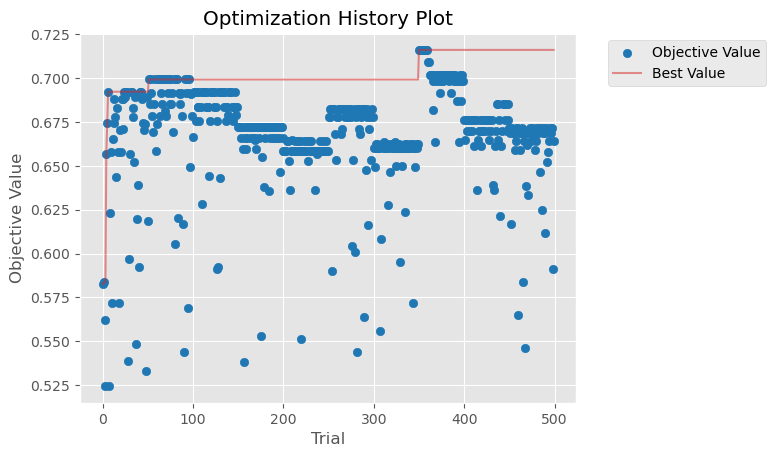

In [128]:
from optuna.visualization.matplotlib import plot_optimization_history

plot_optimization_history(study_knn);

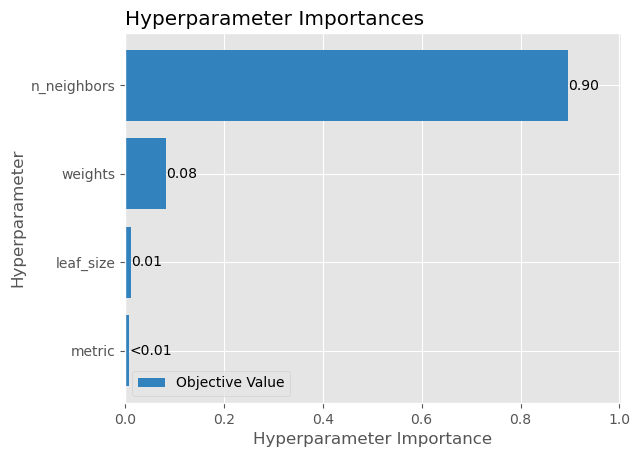

In [129]:

plot_param_importances(study_knn);

In [130]:
detailed_objective_knn_CV(study_knn.best_trial, X, Y, Y_class)

,Metric,Value (average),Value (std)
0,R2,0.691196,0.093625
1,TP,22.200000,2.485514
2,TN,97.900000,1.791957
3,FP,2.600000,1.776388
4,FN,11.200000,2.820559
5,Accuracy,0.896931,0.028783
6,Precision,0.895721,0.073513
7,Sensitivity,0.665459,0.079265
8,Specificity,0.974150,0.017702
9,F1 score,0.761846,0.070625


In [131]:
mat_met_knn_test['ave'] = mat_met_knn_test.iloc[:,1:11].mean(axis='columns', numeric_only=True)
mat_met_knn_test['std'] = mat_met_knn_test.iloc[:,1:11].std(axis='columns', numeric_only=True)
mat_met_knn_test

,Metric,Set0,Set1,Set2,Set3,Set4,Set5,Set6,Set7,Set8,Set9,ave,std
0,R2,0.698571,0.677845,0.679705,0.719101,0.713544,0.685845,0.724100,0.630683,0.713009,0.745201,0.698760,0.032035
1,TP,44.000000,44.000000,45.000000,44.000000,47.000000,48.000000,43.000000,43.000000,47.000000,41.000000,44.600000,2.170509
2,TN,198.000000,197.000000,194.000000,193.000000,198.000000,197.000000,194.000000,195.000000,196.000000,198.000000,196.000000,1.885618
3,FP,4.000000,3.000000,6.000000,6.000000,4.000000,3.000000,6.000000,6.000000,4.000000,3.000000,4.500000,1.354006
4,FN,22.000000,24.000000,23.000000,25.000000,19.000000,20.000000,25.000000,24.000000,21.000000,26.000000,22.900000,2.330951
5,Accuracy,0.902985,0.899254,0.891791,0.884328,0.914179,0.914179,0.884328,0.888060,0.906716,0.891791,0.897761,0.011427
6,Precision,0.916667,0.936170,0.882353,0.880000,0.921569,0.941176,0.877551,0.877551,0.921569,0.931818,0.908642,0.026240
7,Sensitivity,0.666667,0.647059,0.661765,0.637681,0.712121,0.705882,0.632353,0.641791,0.691176,0.611940,0.660844,0.033175
8,Specificity,0.980200,0.985000,0.970000,0.969800,0.980200,0.985000,0.970000,0.970100,0.980000,0.985100,0.977540,0.006812
9,F1 score,0.771930,0.765217,0.756303,0.739496,0.803419,0.806723,0.735043,0.741379,0.789916,0.738739,0.764816,0.027399


In [132]:
#change to fit into these X values 

TP = np.empty(10)
FP = np.empty(10)
TN = np.empty(10)
FN = np.empty(10)

r2_scores_outer = []
Accuracy_outer = []
Precision_outer = [] #Also called Positive Predictive Value(PPV)
Sensitivity_outer = [] # Also called Recall or True Positive Rate (TPR)
Specificity_outer = [] #Also called selectivity or True Negative Rate  (TNR)
f1_scores_outer = []
f1_scores_W_outer = []
f1_scores_M_outer = []
BA_scores_outer = []
MCC_outer = []
NPV_outer = []
ROC_AUC_outer = []

NUM_TRIALS = 5
random_state= [687266, 98656, 56, 280189, 76543] # 
data_knn=pd.DataFrame()

for i in range(NUM_TRIALS):
    cv_change = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state[i])
    data_inner = pd.DataFrame({'y_test_idx': pd.Series(dtype='int'),
                   'y_test': pd.Series(dtype='float'),
                   'y_pred': pd.Series(dtype='float')})
    
    
    for idx, (train_idx, test_idx) in enumerate(cv_change.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        eval_set = [(X_train, y_train), (X_test, y_test)]
        optimizedCV_knn = KNeighborsRegressor(n_neighbors = study_knn.best_params['n_neighbors'],
                                                  weights= study_knn.best_params['weights'],
                                                  metric= study_knn.best_params['metric'],
                                                  leaf_size= study_knn.best_params['leaf_size'],
                                                  n_jobs=4,
                                                 )


        #learn
        
        optimizedCV_knn.fit(X_train,y_train)
                          
                  
        #print(test_idx)
        y_pred_optimized_knn = optimizedCV_knn.predict(X_test) 
        data_inner = data_inner.append(pd.DataFrame({'y_test_idx': test_idx, 'y_test': y_test, 'y_pred_knn': y_pred_optimized_knn } ), )
        data_inner.reset_index(inplace=True, drop=True) 
        data_inner.sort_values(by='y_test_idx', inplace=True) 
        
        y_test_cat = np.where(((y_test>=2) | (y_test<=-2)), 1, 0) 
        y_pred_optimized_knn_cat = np.where(((y_pred_optimized_knn >= 2) | (y_pred_optimized_knn <= -2)), 1, 0)
        
        conf_matrix = confusion_matrix(y_test_cat, y_pred_optimized_knn_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        
        
        r2_scores_outer.append(r2_score(y_test, y_pred_optimized_knn))
        Accuracy_outer.append(accuracy_score(y_test_cat, y_pred_optimized_knn_cat))
        Precision_outer.append(precision_score(y_test_cat, y_pred_optimized_knn_cat))
        Sensitivity_outer.append(recall_score(y_test_cat, y_pred_optimized_knn_cat))
        Specificity_outer.append(round( TN[idx] / (TN[idx]+FP[idx]),4 ))
        f1_scores_outer.append(f1_score(y_test_cat, y_pred_optimized_knn_cat))
        f1_scores_W_outer.append(f1_score(y_test_cat, y_pred_optimized_knn_cat, average="weighted"))
        f1_scores_M_outer.append(f1_score(y_test_cat, y_pred_optimized_knn_cat, average="macro"))
        BA_scores_outer.append(balanced_accuracy_score(y_test_cat, y_pred_optimized_knn_cat))
        MCC_outer.append(matthews_corrcoef(y_test_cat, y_pred_optimized_knn_cat))
        NPV_outer.append(round( TN[idx] / (TN[idx]+FN[idx]),4 ))
        ROC_AUC_outer.append(roc_auc_score(y_test_cat, y_pred_optimized_knn_cat))
        
    data_knn['y_test_idx' + str(i)] = data_inner['y_test_idx']
    data_knn['y_test' + str(i)] = data_inner['y_test']
    data_knn['y_pred_knn' + str(i)] = data_inner['y_pred_knn']
   # data_knn['correct' + str(i)] = correct_value
   # data_knn['pred' + str(i)] = y_pred_optimized_knn

mat_met_optimized_knn = pd.DataFrame({'Metric':['R2','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores_outer), np.mean(Accuracy_outer),np.mean(Precision_outer),
                                           np.mean(Sensitivity_outer),np.mean(Specificity_outer),np.mean(f1_scores_outer),
                                           np.mean(f1_scores_W_outer), np.mean(f1_scores_M_outer), np.mean(BA_scores_outer), 
                                           np.mean(MCC_outer),np.mean(NPV_outer),np.mean(ROC_AUC_outer)],
                        'Value (std)': [np.std(r2_scores_outer, ddof=1), np.std(Accuracy_outer, ddof=1),np.std(Precision_outer, ddof=1),
                                        np.std(Sensitivity_outer,ddof=1),np.std(Specificity_outer,ddof=1),np.std(f1_scores_outer, ddof=1),
                                        np.std(f1_scores_W_outer, ddof=1),np.std(f1_scores_M_outer, ddof=1), np.std(BA_scores_outer, ddof=1), 
                                        np.std(MCC_outer, ddof=1),np.std(NPV_outer, ddof=1),np.std(ROC_AUC_outer, ddof=1)]
                       }) 


knn_run0 = data_knn[['y_test_idx0', 'y_test0', 'y_pred_knn0']]
knn_run0.sort_values(by='y_test_idx0', inplace=True)
knn_run0.reset_index(inplace=True, drop=True)
knn_run1 = data_knn[['y_test_idx1', 'y_test1', 'y_pred_knn1']]
knn_run1.sort_values(by='y_test_idx1', inplace=True)
knn_run1.reset_index(inplace=True, drop=True)
knn_run2 = data_knn[['y_test_idx2', 'y_test2', 'y_pred_knn2']]
knn_run2.sort_values(by='y_test_idx2', inplace=True)
knn_run2.reset_index(inplace=True, drop=True)
knn_run3 = data_knn[['y_test_idx3', 'y_test3', 'y_pred_knn3']]
knn_run3.sort_values(by='y_test_idx3', inplace=True)
knn_run3.reset_index(inplace=True, drop=True)
knn_run4 = data_knn[['y_test_idx4', 'y_test4', 'y_pred_knn4']]
knn_run4.sort_values(by='y_test_idx4', inplace=True)
knn_run4.reset_index(inplace=True, drop=True)
chembl_id = df['molecule_chembl_id']
knn_5preds = pd.concat([chembl_id, knn_run0, knn_run1, knn_run2, knn_run3, knn_run4], axis=1)
knn_5preds = knn_5preds[['molecule_chembl_id', 'y_test_idx0', 'y_test0', 'y_pred_knn0', 'y_pred_knn1', 'y_pred_knn2', 'y_pred_knn3', 'y_pred_knn4']]
knn_5preds['y_pred_knn_ave'] = knn_5preds.iloc[:,2:11].mean(axis='columns', numeric_only=True)
knn_5preds['y_pred_knn_std'] = knn_5preds.iloc[:,2:].std(axis='columns', numeric_only=True)

mat_met_optimized_knn

,Metric,Value (average),Value (std)
0,R2,0.704124,0.066491
1,Accuracy,0.904703,0.020451
2,Precision,0.910285,0.054644
3,Sensitivity,0.687247,0.069880
4,Specificity,0.976924,0.014379
5,F1 score,0.780945,0.052457
6,F1 score (weighted),0.899658,0.022438
7,F1 score (macro),0.859994,0.032403
8,Balanced Accuracy,0.832084,0.035680
9,MCC,0.734881,0.060820


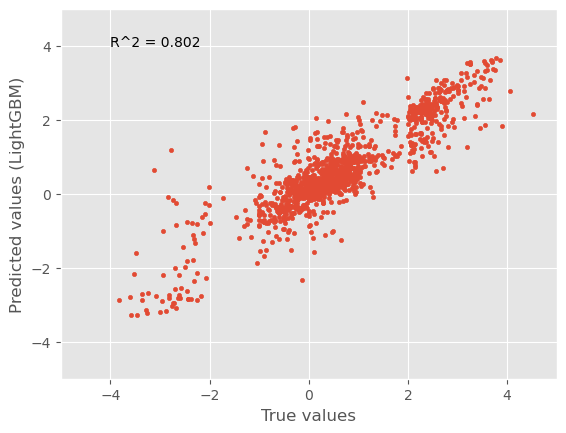

In [133]:
# Scatter plot

limits = -5,5
plt.figsize=(10,10)

plt.scatter(knn_5preds['y_test0'], knn_5preds['y_pred_knn_ave'], marker=".")
lin = np.linspace(*limits, 100)

plt.ylabel("Predicted values (LightGBM)")
plt.xlabel("True values")

plt.xlim(limits)
plt.ylim(limits)

plt.annotate("R^2 = {:.3f}".format(r2_score(knn_5preds['y_test0'], knn_5preds['y_pred_knn_ave'])), (-4, 4))
plt.show()

In [134]:
#cross valide using this optimized KNN 
knn_baseline_CVscore = cross_val_score(knn_reg, X, Y, cv=10, scoring="r2")
#cv_knn_opt_testSet = cross_val_score(optimized_knn, X, Y, cv=10, scoring="r2")
cv_knn_opt = cross_val_score(optimizedCV_knn, X, Y, cv=10, scoring="r2")
print("KNN baseline model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(knn_baseline_CVscore), np.std(knn_baseline_CVscore, ddof=1)))
#print("KNN optimized model (tested on Y_te) r2_score %0.4f with a standard deviation of %0.4f" % (cv_knn_opt_testSet.mean(), cv_knn_opt_testSet.std()))
print("KNN optimized model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(cv_knn_opt), np.std(cv_knn_opt, ddof=1)))

KNN baseline model r2_score 0.6839 with a standard deviation of 0.0760
KNN optimized model r2_score 0.7086 with a standard deviation of 0.0715


In [135]:
joblib.dump(knn_reg, "OUTPUT/knn_reg.joblib")
#joblib.dump(optimized_knn, "OUTPUT/optimized_knn.joblib")
joblib.dump(optimizedCV_knn, "OUTPUT/optimizedCV_knn.joblib")
#loaded_rf = joblib.load("OUTPUT/optimized_rf.joblib")

['OUTPUT/optimizedCV_knn.joblib']

## Support Vector 

In [136]:
%%time

r2_scores = np.empty(10)
TP =np.empty(10)
TN = np.empty(10)
FP = np.empty(10)
FN = np.empty(10)
Accuracy = np.empty(10)
Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
f1_scores = np.empty(10)
f1_scores_W = np.empty(10)
f1_scores_M = np.empty(10)
BA_scores = np.empty(10)
MCC = np.empty(10)
NPV = np.empty(10)
ROC_AUC= np.empty(10)



for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = Y[train_idx], Y[test_idx]

    svm_reg = SVR()
    
    svm_reg.fit(X_train, y_train, )

    y_pred = svm_reg.predict(X_test) 
    # r2 score of the regression model before evaluating categorical evaluation parameters
    r2_scores[idx] = r2_score(y_test, y_pred)
    # now convert the resuls to binary with cutoff 6.3
    y_test_cat = np.where(((y_test>=2) | (y_test<=-2)), 1, 0) 
    y_pred_cat = np.where(((y_pred >= 2) | (y_pred <= -2)), 1, 0)
    #calculate the evaluation results
    conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
    TP[idx] = conf_matrix[1][1]
    TN[idx] = conf_matrix[0][0]
    FP[idx] = conf_matrix[0][1] 
    FN[idx] = conf_matrix[1][0]
    Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
    Precision[idx] = precision_score(y_test_cat, y_pred_cat)
    Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
    Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
    f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
    f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
    f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
    BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
    MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
    NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
    ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)


mat_met = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       }) 
    
print(mat_met)


                 Metric  Value (average)  Value (std)
0                    R2         0.678877     0.073310
1                    TP        15.100000     2.378141
2                    TN        99.600000     1.429841
3                    FP         0.900000     0.875595
4                    FN        18.300000     2.983287
5              Accuracy         0.856632     0.026404
6             Precision         0.941979     0.059686
7           Sensitivity         0.453375     0.079148
8           Specificity         0.991010     0.008780
9              F1 score         0.609639     0.079321
10  F1 score (weighted)         0.836466     0.032970
11     F1 score (macro)         0.760901     0.047464
12    Balanced Accuracy         0.722192     0.042110
13                  MCC         0.590441     0.080931
14                  NPV         0.845130     0.022919
15              ROC_AUC         0.722192     0.042110
CPU times: user 2.04 s, sys: 0 ns, total: 2.04 s
Wall time: 2.04 s


In [137]:
def objective_svm_CV(trial, X, Y, Y_class):
    param_grid = {
        "C" : trial.suggest_categorical("C", [np.exp2(-7), np.exp2(-6), np.exp2(-5), np.exp2(-4), np.exp2(-3), np.exp2(-2),
                                              np.exp2(-1), np.exp2(0), np.exp2(1), np.exp2(2), np.exp2(3), np.exp2(4),
                                             np.exp2(5), np.exp2(6), np.exp2(7)]),
        "gamma" :trial.suggest_categorical("gamma", [np.exp2(-15), np.exp2(-14), np.exp2(-13), np.exp2(-12), np.exp2(-11), 
                                                     np.exp2(-10),np.exp2(-9), np.exp2(-8), np.exp2(-7), np.exp2(-6), np.exp2(-5), 
                                                     np.exp2(-4),np.exp2(-3), np.exp2(-2), np.exp2(-1), np.exp2(0), np.exp2(1),
                                                     np.exp2(2), np.exp2(3)]),
        #"kernel" : trial.suggest_categorical("kernel", ['linear', 'rbf', 'sigmoid']),
        #"degree": trial.suggest_int("degree", 3, 10)
        #"device_type": trial.suggest_categorical("device_type", ['gpu'])
        
    }
    
    
    cv_scores=np.empty(10)
    
    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        svm_model = SVR(**param_grid)
        svm_model.fit(X_train,y_train)
    
        y_pred = svm_model.predict(X_test)
    
    
        cv_scores[idx] = r2_score(y_test, y_pred)
       
        
    return np.mean(cv_scores)


In [138]:
def detailed_objective_svm_cv(trial, X, Y, Y_class):
    param_grid = {
        "C" : trial.suggest_categorical("C", [np.exp2(-7), np.exp2(-6), np.exp2(-5), np.exp2(-4), np.exp2(-3), np.exp2(-2),
                                              np.exp2(-1), np.exp2(0), np.exp2(1), np.exp2(2), np.exp2(3), np.exp2(4),
                                             np.exp2(5), np.exp2(6), np.exp2(7)]),
        "gamma" :trial.suggest_categorical("gamma", [np.exp2(-15), np.exp2(-14), np.exp2(-13), np.exp2(-12), np.exp2(-11), 
                                                     np.exp2(-10),np.exp2(-9), np.exp2(-8), np.exp2(-7), np.exp2(-6), np.exp2(-5), 
                                                     np.exp2(-4),np.exp2(-3), np.exp2(-2), np.exp2(-1), np.exp2(0), np.exp2(1),
                                                     np.exp2(2), np.exp2(3)]),
        #"kernel" : trial.suggest_categorical("kernel", ['linear', 'rbf', 'sigmoid']),
        #"degree": trial.suggest_int("degree", 3, 10)
        #"device_type": trial.suggest_categorical("device_type", ['gpu'])
        
    }
    
    r2_scores = np.empty(10)
    TP =np.empty(10)
    TN = np.empty(10)
    FP = np.empty(10)
    FN = np.empty(10)
    Accuracy = np.empty(10)
    Precision = np.empty(10) #Also called Positive Predictive Value(PPV)
    Sensitivity = np.empty(10) # Also called Recall or True Positive Rate (TPR)
    Specificity = np.empty(10) #Also called selectivity or True Negative Rate  (TNR)
    f1_scores = np.empty(10)
    f1_scores_W = np.empty(10)
    f1_scores_M = np.empty(10)
    BA_scores = np.empty(10)
    MCC = np.empty(10)
    NPV = np.empty(10)
    ROC_AUC= np.empty(10)

    
    for idx, (train_idx, test_idx) in enumerate(cv.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        
        svm_model = SVR(**param_grid)
        svm_model.fit(X_train,y_train)
    
        y_pred = svm_model.predict(X_test)
        
        # r2 score of the regression model before evaluating categorical evaluation parameters
        r2_scores[idx] = r2_score(y_test, y_pred)
        # now convert the resuls to binary with cutoff 6.3
        y_test_cat = np.where(((y_test>=2) | (y_test<=-2)), 1, 0) 
        y_pred_cat = np.where(((y_pred >= 2) | (y_pred <= -2)), 1, 0)
        #calculate the evaluation results
        conf_matrix = confusion_matrix(y_test_cat, y_pred_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        Accuracy[idx] = accuracy_score(y_test_cat, y_pred_cat)
        Precision[idx] = precision_score(y_test_cat, y_pred_cat)
        Sensitivity[idx] = recall_score(y_test_cat, y_pred_cat)
        Specificity[idx] = round( TN[idx] / (TN[idx]+FP[idx]),4 )
        f1_scores[idx] = f1_score(y_test_cat, y_pred_cat)
        f1_scores_W[idx] = f1_score(y_test_cat, y_pred_cat, average="weighted")
        f1_scores_M[idx] = f1_score(y_test_cat, y_pred_cat, average="macro")
        BA_scores[idx] = balanced_accuracy_score(y_test_cat, y_pred_cat)
        MCC[idx] = matthews_corrcoef(y_test_cat, y_pred_cat)
        NPV[idx] = round( TN[idx] / (TN[idx]+FN[idx]),4 )
        ROC_AUC[idx] = roc_auc_score(y_test_cat, y_pred_cat)


    mat_met = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        'Value (std)': [ np.std(r2_scores, ddof=1), np.std(TP,ddof=1),np.std(TN,ddof=1),np.std(FP,ddof=1),np.std(FN, ddof=1),
                                        np.std(Accuracy, ddof=1),np.std(Precision, ddof=1),
                                        np.std(Sensitivity,ddof=1),np.std(Specificity,ddof=1),np.std(f1_scores, ddof=1),
                                        np.std(f1_scores_W, ddof=1),np.std(f1_scores_M, ddof=1), np.std(BA_scores, ddof=1), 
                                        np.std(MCC, ddof=1),np.std(NPV, ddof=1),np.std(ROC_AUC, ddof=1)]
                       })  
    
    return(mat_met)
   

In [139]:
#Execute optuna and set hyperparameters
study_svm = optuna.create_study(direction='maximize', study_name="SVM_regressor_CV")
func_svm_0 = lambda trial: objective_svm_CV(trial, X_trainSet0, Y_trainSet0, Y_trainSet0_class)
study_svm.optimize(func_svm_0, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 08:39:07,889] A new study created in memory with name: SVM_regressor_CV
[I 2023-12-20 08:39:09,288] Trial 0 finished with value: 0.2752388885477531 and parameters: {'C': 0.0625, 'gamma': 0.015625}. Best is trial 0 with value: 0.2752388885477531.
[I 2023-12-20 08:39:10,683] Trial 1 finished with value: 0.028130700965275944 and parameters: {'C': 0.5, 'gamma': 6.103515625e-05}. Best is trial 0 with value: 0.2752388885477531.
[I 2023-12-20 08:39:12,089] Trial 2 finished with value: 0.2561534251966175 and parameters: {'C': 0.25, 'gamma': 0.0625}. Best is trial 0 with value: 0.2752388885477531.
[I 2023-12-20 08:39:13,616] Trial 3 finished with value: 0.5320994647997808 and parameters: {'C': 0.5, 'gamma': 0.00390625}. Best is trial 3 with value: 0.5320994647997808.
[I 2023-12-20 08:39:15,061] Trial 4 finished with value: 0.1254898755780079 and parameters: {'C': 0.125, 'gamma': 0.0009765625}. Best is trial 3 with value: 0.5320994647997808.
[I 2023-12-20 08:39:16,554] Trial 5 fini

	Number of trials: 50.0
	Best value (r2_score): 0.6943
	Best params:
		C: 16.0
		gamma: 0.015625


In [140]:
#Create an instance with tuned hyperparameters

optimized_svm_0 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_0.fit(X_trainSet0,Y_trainSet0,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_0 = optimized_svm_0.predict(X_testSet0)
r2_scores = r2_score(Y_testSet0, y_pred_svm_0)
# now convert the resuls to binary with cutoff 6.3
Y_testSet0_cat = np.where(((Y_testSet0>=2) | (Y_testSet0<=-2)), 1, 0) 
y_pred_svm_0_cat = np.where(((y_pred_svm_0 >= 2) | (y_pred_svm_0 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet0_cat, y_pred_svm_0_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet0_cat, y_pred_svm_0_cat)
Precision = precision_score(Y_testSet0_cat, y_pred_svm_0_cat)
Sensitivity = recall_score(Y_testSet0_cat, y_pred_svm_0_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet0_cat, y_pred_svm_0_cat)      
f1_scores_W = f1_score(Y_testSet0_cat, y_pred_svm_0_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet0_cat, y_pred_svm_0_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet0_cat, y_pred_svm_0_cat)
MCC = matthews_corrcoef(Y_testSet0_cat, y_pred_svm_0_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet0_cat, y_pred_svm_0_cat)
    

mat_met_svm_test = pd.DataFrame({'Metric':['R2','TP','TN','FP','FN','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Set0':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })    
print(mat_met_svm_test)


                 Metric        Set0
0                    R2    0.698333
1                    TP   29.000000
2                    TN  202.000000
3                    FP    0.000000
4                    FN   37.000000
5              Accuracy    0.861940
6             Precision    1.000000
7           Sensitivity    0.439394
8           Specificity    1.000000
9              F1 score    0.610526
10  F1 score (weighted)    0.840847
11     F1 score (macro)    0.763313
12    Balanced Accuracy    0.719697
13                  MCC    0.609402
14                  NPV    0.845200
15              ROC_AUC    0.719697


In [141]:
#Execute optuna and set hyperparameters
func_svm_1 = lambda trial: objective_svm_CV(trial, X_trainSet1, Y_trainSet1, Y_trainSet1_class)
study_svm.optimize(func_svm_1, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 08:40:25,932] Trial 50 finished with value: -0.019870156640204372 and parameters: {'C': 0.0625, 'gamma': 2.0}. Best is trial 29 with value: 0.6943037771339731.
[I 2023-12-20 08:40:27,331] Trial 51 finished with value: 0.6954918672284649 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 51 with value: 0.6954918672284649.
[I 2023-12-20 08:40:28,798] Trial 52 finished with value: 0.6954918672284649 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 51 with value: 0.6954918672284649.
[I 2023-12-20 08:40:30,254] Trial 53 finished with value: 0.6958669752384442 and parameters: {'C': 8.0, 'gamma': 0.015625}. Best is trial 53 with value: 0.6958669752384442.
[I 2023-12-20 08:40:32,056] Trial 54 finished with value: 0.014939667012473845 and parameters: {'C': 8.0, 'gamma': 8.0}. Best is trial 53 with value: 0.6958669752384442.
[I 2023-12-20 08:40:33,567] Trial 55 finished with value: 0.6366311828154735 and parameters: {'C': 8.0, 'gamma': 0.001953125}. Best is 

	Number of trials: 100.0
	Best value (r2_score): 0.6960
	Best params:
		C: 32.0
		gamma: 0.015625


In [142]:
#Create an instance with tuned hyperparameters

optimized_svm_1 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_1.fit(X_trainSet1,Y_trainSet1,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_1 = optimized_svm_1.predict(X_testSet1)
r2_scores = r2_score(Y_testSet1, y_pred_svm_1)
# now convert the resuls to binary with cutoff 6.3
Y_testSet1_cat = np.where(((Y_testSet1>=2) | (Y_testSet1<=-2)), 1, 0) 
y_pred_svm_1_cat = np.where(((y_pred_svm_1 >= 2) | (y_pred_svm_1 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet1_cat, y_pred_svm_1_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet1_cat, y_pred_svm_1_cat)
Precision = precision_score(Y_testSet1_cat, y_pred_svm_1_cat)
Sensitivity = recall_score(Y_testSet1_cat, y_pred_svm_1_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet1_cat, y_pred_svm_1_cat)      
f1_scores_W = f1_score(Y_testSet1_cat, y_pred_svm_1_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet1_cat, y_pred_svm_1_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet1_cat, y_pred_svm_1_cat)
MCC = matthews_corrcoef(Y_testSet1_cat, y_pred_svm_1_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet1_cat, y_pred_svm_1_cat)
    

set1 = pd.DataFrame({'Set1':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set1'] = set1
print(mat_met_svm_test)


                 Metric        Set0        Set1
0                    R2    0.698333    0.720682
1                    TP   29.000000   37.000000
2                    TN  202.000000  195.000000
3                    FP    0.000000    5.000000
4                    FN   37.000000   31.000000
5              Accuracy    0.861940    0.865672
6             Precision    1.000000    0.880952
7           Sensitivity    0.439394    0.544118
8           Specificity    1.000000    0.975000
9              F1 score    0.610526    0.672727
10  F1 score (weighted)    0.840847    0.853896
11     F1 score (macro)    0.763313    0.794110
12    Balanced Accuracy    0.719697    0.759559
13                  MCC    0.609402    0.621379
14                  NPV    0.845200    0.862800
15              ROC_AUC    0.719697    0.759559


In [143]:
#Execute optuna and set hyperparameters
func_svm_2 = lambda trial: objective_svm_CV(trial, X_trainSet2, Y_trainSet2, Y_trainSet2_class)
study_svm.optimize(func_svm_2, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 08:41:39,014] Trial 100 finished with value: 0.05080336048877593 and parameters: {'C': 32.0, 'gamma': 0.25}. Best is trial 94 with value: 0.6959804304570497.
[I 2023-12-20 08:41:40,414] Trial 101 finished with value: 0.7106404476592154 and parameters: {'C': 8.0, 'gamma': 0.015625}. Best is trial 101 with value: 0.7106404476592154.
[I 2023-12-20 08:41:41,815] Trial 102 finished with value: 0.7106404476592154 and parameters: {'C': 8.0, 'gamma': 0.015625}. Best is trial 101 with value: 0.7106404476592154.
[I 2023-12-20 08:41:43,216] Trial 103 finished with value: 0.26423240642698137 and parameters: {'C': 0.0625, 'gamma': 0.015625}. Best is trial 101 with value: 0.7106404476592154.
[I 2023-12-20 08:41:44,572] Trial 104 finished with value: 0.5161068236257458 and parameters: {'C': 0.25, 'gamma': 0.015625}. Best is trial 101 with value: 0.7106404476592154.
[I 2023-12-20 08:41:45,873] Trial 105 finished with value: 0.6598793580538699 and parameters: {'C': 1.0, 'gamma': 0.015625}

	Number of trials: 150.0
	Best value (r2_score): 0.7106
	Best params:
		C: 8.0
		gamma: 0.015625


In [144]:
#Create an instance with tuned hyperparameters

optimized_svm_2 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_2.fit(X_trainSet2,Y_trainSet2,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_2 = optimized_svm_2.predict(X_testSet2)
r2_scores = r2_score(Y_testSet2, y_pred_svm_2)
# now convert the resuls to binary with cutoff 6.3
Y_testSet2_cat = np.where(((Y_testSet2>=2) | (Y_testSet2<=-2)), 1, 0) 
y_pred_svm_2_cat = np.where(((y_pred_svm_2 >= 2) | (y_pred_svm_2 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet2_cat, y_pred_svm_2_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet2_cat, y_pred_svm_2_cat)
Precision = precision_score(Y_testSet2_cat, y_pred_svm_2_cat)
Sensitivity = recall_score(Y_testSet2_cat, y_pred_svm_2_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet2_cat, y_pred_svm_2_cat)      
f1_scores_W = f1_score(Y_testSet2_cat, y_pred_svm_2_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet2_cat, y_pred_svm_2_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet2_cat, y_pred_svm_2_cat)
MCC = matthews_corrcoef(Y_testSet2_cat, y_pred_svm_2_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet2_cat, y_pred_svm_2_cat)
    

Set2 = pd.DataFrame({'Set2':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set2'] = Set2
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2
0                    R2    0.698333    0.720682    0.701664
1                    TP   29.000000   37.000000   35.000000
2                    TN  202.000000  195.000000  198.000000
3                    FP    0.000000    5.000000    2.000000
4                    FN   37.000000   31.000000   33.000000
5              Accuracy    0.861940    0.865672    0.869403
6             Precision    1.000000    0.880952    0.945946
7           Sensitivity    0.439394    0.544118    0.514706
8           Specificity    1.000000    0.975000    0.990000
9              F1 score    0.610526    0.672727    0.666667
10  F1 score (weighted)    0.840847    0.853896    0.854821
11     F1 score (macro)    0.763313    0.794110    0.792730
12    Balanced Accuracy    0.719697    0.759559    0.752353
13                  MCC    0.609402    0.621379    0.636650
14                  NPV    0.845200    0.862800    0.857100
15              ROC_AUC    0.719697    0

In [145]:
#Execute optuna and set hyperparameters
func_svm_3 = lambda trial: objective_svm_CV(trial, X_trainSet3, Y_trainSet3, Y_trainSet3_class)
study_svm.optimize(func_svm_3, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 08:42:53,443] Trial 150 finished with value: 0.03852440717138429 and parameters: {'C': 1.0, 'gamma': 0.25}. Best is trial 101 with value: 0.7106404476592154.
[I 2023-12-20 08:42:54,785] Trial 151 finished with value: 0.6637050489140244 and parameters: {'C': 8.0, 'gamma': 0.0078125}. Best is trial 101 with value: 0.7106404476592154.
[I 2023-12-20 08:42:56,114] Trial 152 finished with value: 0.6637050489140244 and parameters: {'C': 8.0, 'gamma': 0.0078125}. Best is trial 101 with value: 0.7106404476592154.
[I 2023-12-20 08:42:57,474] Trial 153 finished with value: 0.6637050489140244 and parameters: {'C': 8.0, 'gamma': 0.0078125}. Best is trial 101 with value: 0.7106404476592154.
[I 2023-12-20 08:42:58,824] Trial 154 finished with value: 0.6637050489140244 and parameters: {'C': 8.0, 'gamma': 0.0078125}. Best is trial 101 with value: 0.7106404476592154.
[I 2023-12-20 08:43:00,176] Trial 155 finished with value: 0.027264619147422686 and parameters: {'C': 0.0078125, 'gamma': 0.

	Number of trials: 200.0
	Best value (r2_score): 0.7106
	Best params:
		C: 8.0
		gamma: 0.015625


In [146]:
#Create an instance with tuned hyperparameters

optimized_svm_3 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_3.fit(X_trainSet3,Y_trainSet3,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_3 = optimized_svm_3.predict(X_testSet3)
r2_scores = r2_score(Y_testSet3, y_pred_svm_3)
# now convert the resuls to binary with cutoff 6.3
Y_testSet3_cat = np.where(((Y_testSet3>=2) | (Y_testSet3<=-2)), 1, 0) 
y_pred_svm_3_cat = np.where(((y_pred_svm_3 >= 2) | (y_pred_svm_3 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet3_cat, y_pred_svm_3_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet3_cat, y_pred_svm_3_cat)
Precision = precision_score(Y_testSet3_cat, y_pred_svm_3_cat)
Sensitivity = recall_score(Y_testSet3_cat, y_pred_svm_3_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet3_cat, y_pred_svm_3_cat)      
f1_scores_W = f1_score(Y_testSet3_cat, y_pred_svm_3_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet3_cat, y_pred_svm_3_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet3_cat, y_pred_svm_3_cat)
MCC = matthews_corrcoef(Y_testSet3_cat, y_pred_svm_3_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet3_cat, y_pred_svm_3_cat)
    

Set3 = pd.DataFrame({'Set3':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set3'] = Set3
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3
0                    R2    0.698333    0.720682    0.701664    0.747780
1                    TP   29.000000   37.000000   35.000000   41.000000
2                    TN  202.000000  195.000000  198.000000  198.000000
3                    FP    0.000000    5.000000    2.000000    1.000000
4                    FN   37.000000   31.000000   33.000000   28.000000
5              Accuracy    0.861940    0.865672    0.869403    0.891791
6             Precision    1.000000    0.880952    0.945946    0.976190
7           Sensitivity    0.439394    0.544118    0.514706    0.594203
8           Specificity    1.000000    0.975000    0.990000    0.995000
9              F1 score    0.610526    0.672727    0.666667    0.738739
10  F1 score (weighted)    0.840847    0.853896    0.854821    0.882068
11     F1 score (macro)    0.763313    0.794110    0.792730    0.835252
12    Balanced Accuracy    0.719697    0.759559    0.752353    0

In [147]:
#Execute optuna and set hyperparameters
func_svm_4 = lambda trial: objective_svm_CV(trial, X_trainSet4, Y_trainSet4, Y_trainSet4_class)
study_svm.optimize(func_svm_4, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 08:44:03,131] Trial 200 finished with value: 0.23483902135834062 and parameters: {'C': 8.0, 'gamma': 0.125}. Best is trial 101 with value: 0.7106404476592154.
[I 2023-12-20 08:44:04,688] Trial 201 finished with value: 0.38305873576297916 and parameters: {'C': 0.125, 'gamma': 0.0078125}. Best is trial 101 with value: 0.7106404476592154.
[I 2023-12-20 08:44:06,222] Trial 202 finished with value: 0.663815362946822 and parameters: {'C': 8.0, 'gamma': 0.0078125}. Best is trial 101 with value: 0.7106404476592154.
[I 2023-12-20 08:44:07,753] Trial 203 finished with value: 0.663815362946822 and parameters: {'C': 8.0, 'gamma': 0.0078125}. Best is trial 101 with value: 0.7106404476592154.
[I 2023-12-20 08:44:09,293] Trial 204 finished with value: 0.663815362946822 and parameters: {'C': 8.0, 'gamma': 0.0078125}. Best is trial 101 with value: 0.7106404476592154.
[I 2023-12-20 08:44:10,858] Trial 205 finished with value: 0.677158029376824 and parameters: {'C': 64.0, 'gamma': 0.015625}

	Number of trials: 250.0
	Best value (r2_score): 0.7106
	Best params:
		C: 8.0
		gamma: 0.015625


In [148]:
#Create an instance with tuned hyperparameters

optimized_svm_4 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_4.fit(X_trainSet4,Y_trainSet4,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_4 = optimized_svm_4.predict(X_testSet4)
r2_scores = r2_score(Y_testSet4, y_pred_svm_4)
# now convert the resuls to binary with cutoff 6.4
Y_testSet4_cat = np.where(((Y_testSet4>=2) | (Y_testSet4<=-2)), 1, 0) 
y_pred_svm_4_cat = np.where(((y_pred_svm_4 >= 2) | (y_pred_svm_4 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet4_cat, y_pred_svm_4_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet4_cat, y_pred_svm_4_cat)
Precision = precision_score(Y_testSet4_cat, y_pred_svm_4_cat)
Sensitivity = recall_score(Y_testSet4_cat, y_pred_svm_4_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet4_cat, y_pred_svm_4_cat)      
f1_scores_W = f1_score(Y_testSet4_cat, y_pred_svm_4_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet4_cat, y_pred_svm_4_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet4_cat, y_pred_svm_4_cat)
MCC = matthews_corrcoef(Y_testSet4_cat, y_pred_svm_4_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet4_cat, y_pred_svm_4_cat)
    

Set4 = pd.DataFrame({'Set4':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set4'] = Set4
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.698333    0.720682    0.701664    0.747780   
1                    TP   29.000000   37.000000   35.000000   41.000000   
2                    TN  202.000000  195.000000  198.000000  198.000000   
3                    FP    0.000000    5.000000    2.000000    1.000000   
4                    FN   37.000000   31.000000   33.000000   28.000000   
5              Accuracy    0.861940    0.865672    0.869403    0.891791   
6             Precision    1.000000    0.880952    0.945946    0.976190   
7           Sensitivity    0.439394    0.544118    0.514706    0.594203   
8           Specificity    1.000000    0.975000    0.990000    0.995000   
9              F1 score    0.610526    0.672727    0.666667    0.738739   
10  F1 score (weighted)    0.840847    0.853896    0.854821    0.882068   
11     F1 score (macro)    0.763313    0.794110    0.792730    0.835252   
12    Balanced Accuracy  

In [149]:
#Execute optuna and set hyperparameters
func_svm_5 = lambda trial: objective_svm_CV(trial, X_trainSet5, Y_trainSet5, Y_trainSet5_class)
study_svm.optimize(func_svm_5, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 08:45:19,434] Trial 250 finished with value: 0.5679867804574567 and parameters: {'C': 0.5, 'gamma': 0.0078125}. Best is trial 101 with value: 0.7106404476592154.
[I 2023-12-20 08:45:20,934] Trial 251 finished with value: 0.0362228864429421 and parameters: {'C': 8.0, 'gamma': 0.5}. Best is trial 101 with value: 0.7106404476592154.
[I 2023-12-20 08:45:22,380] Trial 252 finished with value: 0.687734509483451 and parameters: {'C': 64.0, 'gamma': 0.015625}. Best is trial 101 with value: 0.7106404476592154.
[I 2023-12-20 08:45:23,860] Trial 253 finished with value: 0.02338232570105254 and parameters: {'C': 8.0, 'gamma': 4.0}. Best is trial 101 with value: 0.7106404476592154.
[I 2023-12-20 08:45:25,240] Trial 254 finished with value: 0.6668536395182562 and parameters: {'C': 8.0, 'gamma': 0.0078125}. Best is trial 101 with value: 0.7106404476592154.
[I 2023-12-20 08:45:26,623] Trial 255 finished with value: 0.06674822974628226 and parameters: {'C': 32.0, 'gamma': 0.25}. Best is t

	Number of trials: 300.0
	Best value (r2_score): 0.7106
	Best params:
		C: 8.0
		gamma: 0.015625


In [150]:
#Create an instance with tuned hyperparameters

optimized_svm_5 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_5.fit(X_trainSet5,Y_trainSet5,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_5 = optimized_svm_5.predict(X_testSet5)
r2_scores = r2_score(Y_testSet5, y_pred_svm_5)
# now convert the resuls to binary with cutoff 6.5
Y_testSet5_cat = np.where(((Y_testSet5>=2) | (Y_testSet5<=-2)), 1, 0) 
y_pred_svm_5_cat = np.where(((y_pred_svm_5 >= 2) | (y_pred_svm_5 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet5_cat, y_pred_svm_5_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet5_cat, y_pred_svm_5_cat)
Precision = precision_score(Y_testSet5_cat, y_pred_svm_5_cat)
Sensitivity = recall_score(Y_testSet5_cat, y_pred_svm_5_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet5_cat, y_pred_svm_5_cat)      
f1_scores_W = f1_score(Y_testSet5_cat, y_pred_svm_5_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet5_cat, y_pred_svm_5_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet5_cat, y_pred_svm_5_cat)
MCC = matthews_corrcoef(Y_testSet5_cat, y_pred_svm_5_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet5_cat, y_pred_svm_5_cat)
    

Set5 = pd.DataFrame({'Set5':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set5'] = Set5
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.698333    0.720682    0.701664    0.747780   
1                    TP   29.000000   37.000000   35.000000   41.000000   
2                    TN  202.000000  195.000000  198.000000  198.000000   
3                    FP    0.000000    5.000000    2.000000    1.000000   
4                    FN   37.000000   31.000000   33.000000   28.000000   
5              Accuracy    0.861940    0.865672    0.869403    0.891791   
6             Precision    1.000000    0.880952    0.945946    0.976190   
7           Sensitivity    0.439394    0.544118    0.514706    0.594203   
8           Specificity    1.000000    0.975000    0.990000    0.995000   
9              F1 score    0.610526    0.672727    0.666667    0.738739   
10  F1 score (weighted)    0.840847    0.853896    0.854821    0.882068   
11     F1 score (macro)    0.763313    0.794110    0.792730    0.835252   
12    Balanced Accuracy  

In [151]:
#Execute optuna and set hyperparameters
func_svm_6 = lambda trial: objective_svm_CV(trial, X_trainSet6, Y_trainSet6, Y_trainSet6_class)
study_svm.optimize(func_svm_6, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 08:46:28,940] Trial 300 finished with value: 0.6800404085938963 and parameters: {'C': 8.0, 'gamma': 0.0078125}. Best is trial 101 with value: 0.7106404476592154.
[I 2023-12-20 08:46:30,488] Trial 301 finished with value: 0.6929699467898144 and parameters: {'C': 8.0, 'gamma': 0.015625}. Best is trial 101 with value: 0.7106404476592154.
[I 2023-12-20 08:46:31,965] Trial 302 finished with value: 0.6800404085938963 and parameters: {'C': 8.0, 'gamma': 0.0078125}. Best is trial 101 with value: 0.7106404476592154.
[I 2023-12-20 08:46:33,470] Trial 303 finished with value: 0.6800404085938963 and parameters: {'C': 8.0, 'gamma': 0.0078125}. Best is trial 101 with value: 0.7106404476592154.
[I 2023-12-20 08:46:34,953] Trial 304 finished with value: 0.692185533492272 and parameters: {'C': 4.0, 'gamma': 0.015625}. Best is trial 101 with value: 0.7106404476592154.
[I 2023-12-20 08:46:36,274] Trial 305 finished with value: 0.6800404085938963 and parameters: {'C': 8.0, 'gamma': 0.0078125

	Number of trials: 350.0
	Best value (r2_score): 0.7106
	Best params:
		C: 8.0
		gamma: 0.015625


In [152]:
#Create an instance with tuned hyperparameters

optimized_svm_6 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_6.fit(X_trainSet6,Y_trainSet6,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_6 = optimized_svm_6.predict(X_testSet6)
r2_scores = r2_score(Y_testSet6, y_pred_svm_6)
# now convert the resuls to binary with cutoff 6.6
Y_testSet6_cat = np.where(((Y_testSet6>=2) | (Y_testSet6<=-2)), 1, 0) 
y_pred_svm_6_cat = np.where(((y_pred_svm_6 >= 2) | (y_pred_svm_6 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet6_cat, y_pred_svm_6_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet6_cat, y_pred_svm_6_cat)
Precision = precision_score(Y_testSet6_cat, y_pred_svm_6_cat)
Sensitivity = recall_score(Y_testSet6_cat, y_pred_svm_6_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet6_cat, y_pred_svm_6_cat)      
f1_scores_W = f1_score(Y_testSet6_cat, y_pred_svm_6_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet6_cat, y_pred_svm_6_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet6_cat, y_pred_svm_6_cat)
MCC = matthews_corrcoef(Y_testSet6_cat, y_pred_svm_6_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet6_cat, y_pred_svm_6_cat)
    

Set6 = pd.DataFrame({'Set6':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set6'] = Set6
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.698333    0.720682    0.701664    0.747780   
1                    TP   29.000000   37.000000   35.000000   41.000000   
2                    TN  202.000000  195.000000  198.000000  198.000000   
3                    FP    0.000000    5.000000    2.000000    1.000000   
4                    FN   37.000000   31.000000   33.000000   28.000000   
5              Accuracy    0.861940    0.865672    0.869403    0.891791   
6             Precision    1.000000    0.880952    0.945946    0.976190   
7           Sensitivity    0.439394    0.544118    0.514706    0.594203   
8           Specificity    1.000000    0.975000    0.990000    0.995000   
9              F1 score    0.610526    0.672727    0.666667    0.738739   
10  F1 score (weighted)    0.840847    0.853896    0.854821    0.882068   
11     F1 score (macro)    0.763313    0.794110    0.792730    0.835252   
12    Balanced Accuracy  

In [153]:
#Execute optuna and set hyperparameters
func_svm_7 = lambda trial: objective_svm_CV(trial, X_trainSet7, Y_trainSet7, Y_trainSet7_class)
study_svm.optimize(func_svm_7, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 08:47:40,770] Trial 350 finished with value: 0.6847600637085776 and parameters: {'C': 8.0, 'gamma': 0.00390625}. Best is trial 101 with value: 0.7106404476592154.
[I 2023-12-20 08:47:42,076] Trial 351 finished with value: 0.25113766395687376 and parameters: {'C': 0.0625, 'gamma': 0.0078125}. Best is trial 101 with value: 0.7106404476592154.
[I 2023-12-20 08:47:43,400] Trial 352 finished with value: 0.7180691487213032 and parameters: {'C': 8.0, 'gamma': 0.015625}. Best is trial 352 with value: 0.7180691487213032.
[I 2023-12-20 08:47:44,689] Trial 353 finished with value: 0.7180691487213032 and parameters: {'C': 8.0, 'gamma': 0.015625}. Best is trial 352 with value: 0.7180691487213032.
[I 2023-12-20 08:47:46,015] Trial 354 finished with value: 0.7180691487213032 and parameters: {'C': 8.0, 'gamma': 0.015625}. Best is trial 352 with value: 0.7180691487213032.
[I 2023-12-20 08:47:47,388] Trial 355 finished with value: 0.7176985564753953 and parameters: {'C': 16.0, 'gamma': 0.0

	Number of trials: 400.0
	Best value (r2_score): 0.7181
	Best params:
		C: 8.0
		gamma: 0.015625


In [154]:
#Create an instance with tuned hyperparameters

optimized_svm_7 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_7.fit(X_trainSet7,Y_trainSet7,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_7 = optimized_svm_7.predict(X_testSet7)
r2_scores = r2_score(Y_testSet7, y_pred_svm_7)
# now convert the resuls to binary with cutoff 6.7
Y_testSet7_cat = np.where(((Y_testSet7>=2) | (Y_testSet7<=-2)), 1, 0) 
y_pred_svm_7_cat = np.where(((y_pred_svm_7 >= 2) | (y_pred_svm_7 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet7_cat, y_pred_svm_7_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet7_cat, y_pred_svm_7_cat)
Precision = precision_score(Y_testSet7_cat, y_pred_svm_7_cat)
Sensitivity = recall_score(Y_testSet7_cat, y_pred_svm_7_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet7_cat, y_pred_svm_7_cat)      
f1_scores_W = f1_score(Y_testSet7_cat, y_pred_svm_7_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet7_cat, y_pred_svm_7_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet7_cat, y_pred_svm_7_cat)
MCC = matthews_corrcoef(Y_testSet7_cat, y_pred_svm_7_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet7_cat, y_pred_svm_7_cat)
    

Set7 = pd.DataFrame({'Set7':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set7'] = Set7
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.698333    0.720682    0.701664    0.747780   
1                    TP   29.000000   37.000000   35.000000   41.000000   
2                    TN  202.000000  195.000000  198.000000  198.000000   
3                    FP    0.000000    5.000000    2.000000    1.000000   
4                    FN   37.000000   31.000000   33.000000   28.000000   
5              Accuracy    0.861940    0.865672    0.869403    0.891791   
6             Precision    1.000000    0.880952    0.945946    0.976190   
7           Sensitivity    0.439394    0.544118    0.514706    0.594203   
8           Specificity    1.000000    0.975000    0.990000    0.995000   
9              F1 score    0.610526    0.672727    0.666667    0.738739   
10  F1 score (weighted)    0.840847    0.853896    0.854821    0.882068   
11     F1 score (macro)    0.763313    0.794110    0.792730    0.835252   
12    Balanced Accuracy  

In [155]:
#Execute optuna and set hyperparameters
func_svm_8 = lambda trial: objective_svm_CV(trial, X_trainSet8, Y_trainSet8, Y_trainSet8_class)
study_svm.optimize(func_svm_8, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 08:48:48,060] Trial 400 finished with value: 0.7091487652774732 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 352 with value: 0.7180691487213032.
[I 2023-12-20 08:48:49,477] Trial 401 finished with value: 0.7091487652774732 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 352 with value: 0.7180691487213032.
[I 2023-12-20 08:48:50,894] Trial 402 finished with value: 0.7091487652774732 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 352 with value: 0.7180691487213032.
[I 2023-12-20 08:48:52,325] Trial 403 finished with value: 0.7091487652774732 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 352 with value: 0.7180691487213032.
[I 2023-12-20 08:48:53,753] Trial 404 finished with value: 0.7091487652774732 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 352 with value: 0.7180691487213032.
[I 2023-12-20 08:48:55,164] Trial 405 finished with value: 0.7091487652774732 and parameters: {'C': 16.0, 'gamma': 0.015

	Number of trials: 450.0
	Best value (r2_score): 0.7181
	Best params:
		C: 8.0
		gamma: 0.015625


In [156]:
#Create an instance with tuned hyperparameters

optimized_svm_8 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_8.fit(X_trainSet8,Y_trainSet8,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_8 = optimized_svm_8.predict(X_testSet8)
r2_scores = r2_score(Y_testSet8, y_pred_svm_8)
# now convert the resuls to binary with cutoff 6.8
Y_testSet8_cat = np.where(((Y_testSet8>=2) | (Y_testSet8<=-2)), 1, 0) 
y_pred_svm_8_cat = np.where(((y_pred_svm_8 >= 2) | (y_pred_svm_8 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet8_cat, y_pred_svm_8_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet8_cat, y_pred_svm_8_cat)
Precision = precision_score(Y_testSet8_cat, y_pred_svm_8_cat)
Sensitivity = recall_score(Y_testSet8_cat, y_pred_svm_8_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet8_cat, y_pred_svm_8_cat)      
f1_scores_W = f1_score(Y_testSet8_cat, y_pred_svm_8_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet8_cat, y_pred_svm_8_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet8_cat, y_pred_svm_8_cat)
MCC = matthews_corrcoef(Y_testSet8_cat, y_pred_svm_8_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet8_cat, y_pred_svm_8_cat)
    

Set8 = pd.DataFrame({'Set8':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set8'] = Set8
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.698333    0.720682    0.701664    0.747780   
1                    TP   29.000000   37.000000   35.000000   41.000000   
2                    TN  202.000000  195.000000  198.000000  198.000000   
3                    FP    0.000000    5.000000    2.000000    1.000000   
4                    FN   37.000000   31.000000   33.000000   28.000000   
5              Accuracy    0.861940    0.865672    0.869403    0.891791   
6             Precision    1.000000    0.880952    0.945946    0.976190   
7           Sensitivity    0.439394    0.544118    0.514706    0.594203   
8           Specificity    1.000000    0.975000    0.990000    0.995000   
9              F1 score    0.610526    0.672727    0.666667    0.738739   
10  F1 score (weighted)    0.840847    0.853896    0.854821    0.882068   
11     F1 score (macro)    0.763313    0.794110    0.792730    0.835252   
12    Balanced Accuracy  

In [157]:
#Execute optuna and set hyperparameters
func_svm_9 = lambda trial: objective_svm_CV(trial, X_trainSet9, Y_trainSet9, Y_trainSet9_class)
study_svm.optimize(func_svm_9, n_trials=50)
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

[I 2023-12-20 08:50:02,530] Trial 450 finished with value: 0.01957819986408198 and parameters: {'C': 16.0, 'gamma': 1.0}. Best is trial 352 with value: 0.7180691487213032.
[I 2023-12-20 08:50:03,984] Trial 451 finished with value: 0.7155271814900284 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 352 with value: 0.7180691487213032.
[I 2023-12-20 08:50:05,361] Trial 452 finished with value: 0.7155271814900284 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 352 with value: 0.7180691487213032.
[I 2023-12-20 08:50:06,883] Trial 453 finished with value: 0.02680990508242098 and parameters: {'C': 16.0, 'gamma': 0.5}. Best is trial 352 with value: 0.7180691487213032.
[I 2023-12-20 08:50:08,318] Trial 454 finished with value: 0.7155271814900284 and parameters: {'C': 16.0, 'gamma': 0.015625}. Best is trial 352 with value: 0.7180691487213032.
[I 2023-12-20 08:50:09,721] Trial 455 finished with value: 0.5927049233953656 and parameters: {'C': 16.0, 'gamma': 0.00024414062

	Number of trials: 500.0
	Best value (r2_score): 0.7181
	Best params:
		C: 8.0
		gamma: 0.015625


In [158]:
#Create an instance with tuned hyperparameters

optimized_svm_9 = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )
#learn
optimized_svm_9.fit(X_trainSet9,Y_trainSet9,)

# r2 score of the regression model before evaluating categorical evaluation parameters
y_pred_svm_9 = optimized_svm_9.predict(X_testSet9)
r2_scores = r2_score(Y_testSet9, y_pred_svm_9)
# now convert the resuls to binary with cutoff 6.9
Y_testSet9_cat = np.where(((Y_testSet9>=2) | (Y_testSet9<=-2)), 1, 0) 
y_pred_svm_9_cat = np.where(((y_pred_svm_9 >= 2) | (y_pred_svm_9 <= -2)), 1, 0)
#calculate the evaluation results
conf_matrix = confusion_matrix(Y_testSet9_cat, y_pred_svm_9_cat)
TP = conf_matrix[1][1]
TN = conf_matrix[0][0]
FP = conf_matrix[0][1] 
FN = conf_matrix[1][0]
Accuracy = accuracy_score(Y_testSet9_cat, y_pred_svm_9_cat)
Precision = precision_score(Y_testSet9_cat, y_pred_svm_9_cat)
Sensitivity = recall_score(Y_testSet9_cat, y_pred_svm_9_cat)
Specificity = round( TN / (TN+FP),4 )
f1_scores = f1_score(Y_testSet9_cat, y_pred_svm_9_cat)      
f1_scores_W = f1_score(Y_testSet9_cat, y_pred_svm_9_cat, average="weighted")
f1_scores_M = f1_score(Y_testSet9_cat, y_pred_svm_9_cat, average="macro")
BA_scores = balanced_accuracy_score(Y_testSet9_cat, y_pred_svm_9_cat)
MCC = matthews_corrcoef(Y_testSet9_cat, y_pred_svm_9_cat)
NPV = round( TN / (TN+FN),4 )
ROC_AUC = roc_auc_score(Y_testSet9_cat, y_pred_svm_9_cat)
    

Set9 = pd.DataFrame({'Set9':[np.mean(r2_scores), np.mean(TP),np.mean(TN),np.mean(FP),np.mean(FN),np.mean(Accuracy),np.mean(Precision),
                                           np.mean(Sensitivity),np.mean(Specificity),np.mean(f1_scores),
                                            np.mean(f1_scores_W), np.mean(f1_scores_M), np.mean(BA_scores), 
                                           np.mean(MCC),np.mean(NPV),np.mean(ROC_AUC)],
                        
                       })

mat_met_svm_test['Set9'] = Set9
print(mat_met_svm_test)


                 Metric        Set0        Set1        Set2        Set3  \
0                    R2    0.698333    0.720682    0.701664    0.747780   
1                    TP   29.000000   37.000000   35.000000   41.000000   
2                    TN  202.000000  195.000000  198.000000  198.000000   
3                    FP    0.000000    5.000000    2.000000    1.000000   
4                    FN   37.000000   31.000000   33.000000   28.000000   
5              Accuracy    0.861940    0.865672    0.869403    0.891791   
6             Precision    1.000000    0.880952    0.945946    0.976190   
7           Sensitivity    0.439394    0.544118    0.514706    0.594203   
8           Specificity    1.000000    0.975000    0.990000    0.995000   
9              F1 score    0.610526    0.672727    0.666667    0.738739   
10  F1 score (weighted)    0.840847    0.853896    0.854821    0.882068   
11     F1 score (macro)    0.763313    0.794110    0.792730    0.835252   
12    Balanced Accuracy  

In [159]:
print(f"\tNumber of trials: {len(study_svm.trials):.1f}")
print(f"\tBest value (r2_score): {study_svm.best_value:.4f}")
print(f"\tBest params:")

for key, value in study_svm.best_params.items():
    print(f"\t\t{key}: {value}")

	Number of trials: 500.0
	Best value (r2_score): 0.7181
	Best params:
		C: 8.0
		gamma: 0.015625


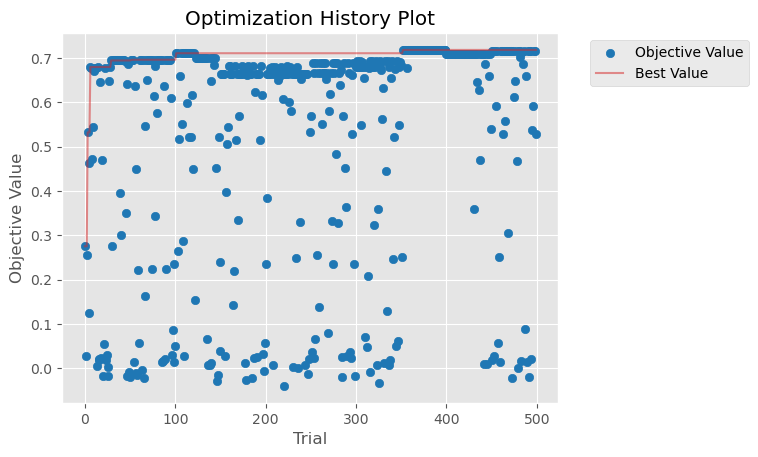

In [160]:
from optuna.visualization.matplotlib import plot_optimization_history

plot_optimization_history(study_svm);

In [161]:
#from optuna.visualization.matplotlib import plot_param_importances

#plot_param_importances(study_svm);

In [162]:
detailed_objective_svm_cv(study_svm.best_trial, X, Y, Y_class)

,Metric,Value (average),Value (std)
0,R2,0.706634,0.052244
1,TP,17.800000,1.751190
2,TN,99.500000,1.080123
3,FP,1.000000,0.816497
4,FN,15.600000,2.366432
5,Accuracy,0.876041,0.016846
6,Precision,0.949129,0.039241
7,Sensitivity,0.533972,0.061923
8,Specificity,0.990050,0.008111
9,F1 score,0.681016,0.048869


In [163]:
mat_met_svm_test['ave'] = mat_met_svm_test.iloc[:,1:11].mean(axis='columns', numeric_only=True)
mat_met_svm_test['std'] = mat_met_svm_test.iloc[:,1:11].std(axis='columns', numeric_only=True)
mat_met_svm_test

,Metric,Set0,Set1,Set2,Set3,Set4,Set5,Set6,Set7,Set8,Set9,ave,std
0,R2,0.698333,0.720682,0.701664,0.747780,0.736532,0.714568,0.729086,0.641458,0.682945,0.668332,0.704138,0.032759
1,TP,29.000000,37.000000,35.000000,41.000000,37.000000,38.000000,33.000000,35.000000,38.000000,32.000000,35.500000,3.472111
2,TN,202.000000,195.000000,198.000000,198.000000,201.000000,197.000000,199.000000,199.000000,198.000000,198.000000,198.500000,1.957890
3,FP,0.000000,5.000000,2.000000,1.000000,1.000000,3.000000,1.000000,2.000000,2.000000,3.000000,2.000000,1.414214
4,FN,37.000000,31.000000,33.000000,28.000000,29.000000,30.000000,35.000000,32.000000,30.000000,35.000000,32.000000,2.943920
5,Accuracy,0.861940,0.865672,0.869403,0.891791,0.888060,0.876866,0.865672,0.873134,0.880597,0.858209,0.873134,0.011125
6,Precision,1.000000,0.880952,0.945946,0.976190,0.973684,0.926829,0.970588,0.945946,0.950000,0.914286,0.948442,0.034576
7,Sensitivity,0.439394,0.544118,0.514706,0.594203,0.560606,0.558824,0.485294,0.522388,0.558824,0.477612,0.525597,0.047105
8,Specificity,1.000000,0.975000,0.990000,0.995000,0.995000,0.985000,0.995000,0.990000,0.990000,0.985100,0.990010,0.007063
9,F1 score,0.610526,0.672727,0.666667,0.738739,0.711538,0.697248,0.647059,0.673077,0.703704,0.627451,0.674874,0.039431


In [164]:
#change to fit into these X values 

TP = np.empty(10)
FP = np.empty(10)
TN = np.empty(10)
FN = np.empty(10)

r2_scores_outer = []
Accuracy_outer = []
Precision_outer = [] #Also called Positive Predictive Value(PPV)
Sensitivity_outer = [] # Also called Recall or True Positive Rate (TPR)
Specificity_outer = [] #Also called selectivity or True Negative Rate  (TNR)
f1_scores_outer = []
f1_scores_W_outer = []
f1_scores_M_outer = []
BA_scores_outer = []
MCC_outer = []
NPV_outer = []
ROC_AUC_outer = []

NUM_TRIALS = 5
random_state= [687266, 98656, 56, 280189, 76543] # 
data_svm=pd.DataFrame()

for i in range(NUM_TRIALS):
    cv_change = StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state[i])
    data_inner = pd.DataFrame({'y_test_idx': pd.Series(dtype='int'),
                   'y_test': pd.Series(dtype='float'),
                   'y_pred': pd.Series(dtype='float')})
    
    
    for idx, (train_idx, test_idx) in enumerate(cv_change.split(X, Y_class)):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = Y[train_idx], Y[test_idx]
        eval_set = [(X_train, y_train), (X_test, y_test)]
        optimizedCV_svm = SVR(C = study_svm.best_params['C'], 
                        gamma=study_svm.best_params["gamma"],
                        )


        #learn
        
        optimizedCV_svm.fit(X_train,y_train)
                          
                  
        #print(test_idx)
        y_pred_optimized_svm = optimizedCV_svm.predict(X_test) 
        data_inner = data_inner.append(pd.DataFrame({'y_test_idx': test_idx, 'y_test': y_test, 'y_pred_svm': y_pred_optimized_svm } ), )
        data_inner.reset_index(inplace=True, drop=True) 
        data_inner.sort_values(by='y_test_idx', inplace=True) 
        
        y_test_cat = np.where(((y_test>=2) | (y_test<=-2)), 1, 0) 
        y_pred_optimized_svm_cat = np.where(((y_pred_optimized_svm >= 2) | (y_pred_optimized_svm <= -2)), 1, 0)
        
        conf_matrix = confusion_matrix(y_test_cat, y_pred_optimized_svm_cat)
        TP[idx] = conf_matrix[1][1]
        TN[idx] = conf_matrix[0][0]
        FP[idx] = conf_matrix[0][1] 
        FN[idx] = conf_matrix[1][0]
        
        
        r2_scores_outer.append(r2_score(y_test, y_pred_optimized_svm))
        Accuracy_outer.append(accuracy_score(y_test_cat, y_pred_optimized_svm_cat))
        Precision_outer.append(precision_score(y_test_cat, y_pred_optimized_svm_cat))
        Sensitivity_outer.append(recall_score(y_test_cat, y_pred_optimized_svm_cat))
        Specificity_outer.append(round( TN[idx] / (TN[idx]+FP[idx]),4 ))
        f1_scores_outer.append(f1_score(y_test_cat, y_pred_optimized_svm_cat))
        f1_scores_W_outer.append(f1_score(y_test_cat, y_pred_optimized_svm_cat, average="weighted"))
        f1_scores_M_outer.append(f1_score(y_test_cat, y_pred_optimized_svm_cat, average="macro"))
        BA_scores_outer.append(balanced_accuracy_score(y_test_cat, y_pred_optimized_svm_cat))
        MCC_outer.append(matthews_corrcoef(y_test_cat, y_pred_optimized_svm_cat))
        NPV_outer.append(round( TN[idx] / (TN[idx]+FN[idx]),4 ))
        ROC_AUC_outer.append(roc_auc_score(y_test_cat, y_pred_optimized_svm_cat))
        
    data_svm['y_test_idx' + str(i)] = data_inner['y_test_idx']
    data_svm['y_test' + str(i)] = data_inner['y_test']
    data_svm['y_pred_svm' + str(i)] = data_inner['y_pred_svm']
   # data_svm['correct' + str(i)] = correct_value
   # data_svm['pred' + str(i)] = y_pred_optimized_svm

mat_met_optimized_svm = pd.DataFrame({'Metric':['R2','Accuracy','Precision','Sensitivity','Specificity','F1 score','F1 score (weighted)','F1 score (macro)','Balanced Accuracy','MCC','NPV','ROC_AUC'],     
                        'Value (average)':[np.mean(r2_scores_outer), np.mean(Accuracy_outer),np.mean(Precision_outer),
                                           np.mean(Sensitivity_outer),np.mean(Specificity_outer),np.mean(f1_scores_outer),
                                           np.mean(f1_scores_W_outer), np.mean(f1_scores_M_outer), np.mean(BA_scores_outer), 
                                           np.mean(MCC_outer),np.mean(NPV_outer),np.mean(ROC_AUC_outer)],
                        'Value (std)': [np.std(r2_scores_outer, ddof=1), np.std(Accuracy_outer, ddof=1),np.std(Precision_outer, ddof=1),
                                        np.std(Sensitivity_outer,ddof=1),np.std(Specificity_outer,ddof=1),np.std(f1_scores_outer, ddof=1),
                                        np.std(f1_scores_W_outer, ddof=1),np.std(f1_scores_M_outer, ddof=1), np.std(BA_scores_outer, ddof=1), 
                                        np.std(MCC_outer, ddof=1),np.std(NPV_outer, ddof=1),np.std(ROC_AUC_outer, ddof=1)]
                       }) 


svm_run0 = data_svm[['y_test_idx0', 'y_test0', 'y_pred_svm0']]
svm_run0.sort_values(by='y_test_idx0', inplace=True)
svm_run0.reset_index(inplace=True, drop=True)
svm_run1 = data_svm[['y_test_idx1', 'y_test1', 'y_pred_svm1']]
svm_run1.sort_values(by='y_test_idx1', inplace=True)
svm_run1.reset_index(inplace=True, drop=True)
svm_run2 = data_svm[['y_test_idx2', 'y_test2', 'y_pred_svm2']]
svm_run2.sort_values(by='y_test_idx2', inplace=True)
svm_run2.reset_index(inplace=True, drop=True)
svm_run3 = data_svm[['y_test_idx3', 'y_test3', 'y_pred_svm3']]
svm_run3.sort_values(by='y_test_idx3', inplace=True)
svm_run3.reset_index(inplace=True, drop=True)
svm_run4 = data_svm[['y_test_idx4', 'y_test4', 'y_pred_svm4']]
svm_run4.sort_values(by='y_test_idx4', inplace=True)
svm_run4.reset_index(inplace=True, drop=True)
chembl_id = df['molecule_chembl_id']
svm_5preds = pd.concat([chembl_id,svm_run0, svm_run1, svm_run2, svm_run3, svm_run4], axis=1)
svm_5preds = svm_5preds[['molecule_chembl_id', 'y_test_idx0', 'y_test0', 'y_pred_svm0', 'y_pred_svm1', 'y_pred_svm2', 'y_pred_svm3', 'y_pred_svm4']]
svm_5preds['y_pred_svm_ave'] = svm_5preds.iloc[:,2:11].mean(axis='columns', numeric_only=True)
svm_5preds['y_pred_svm_std'] = svm_5preds.iloc[:,2:].std(axis='columns', numeric_only=True)
# maybe also calculate the std for each value
mat_met_optimized_svm

,Metric,Value (average),Value (std)
0,R2,0.719408,0.046880
1,Accuracy,0.877519,0.020528
2,Precision,0.949802,0.041396
3,Sensitivity,0.537888,0.081152
4,Specificity,0.990246,0.008868
5,F1 score,0.683061,0.068897
6,F1 score (weighted),0.863979,0.025853
7,F1 score (macro),0.803526,0.040174
8,Balanced Accuracy,0.764066,0.040380
9,MCC,0.655111,0.063491


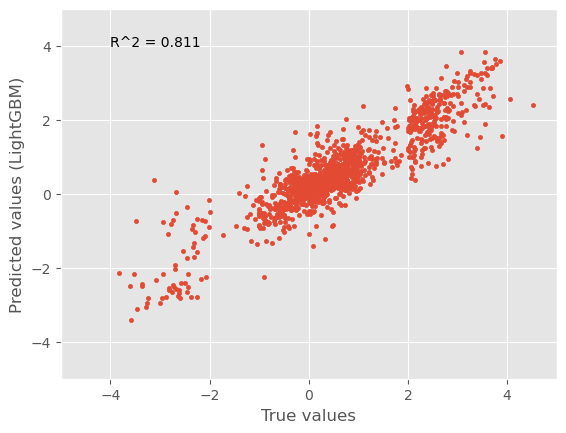

In [165]:
# Scatter plot

limits = -5,5
plt.figsize=(10,10)

plt.scatter(svm_5preds['y_test0'], svm_5preds['y_pred_svm_ave'], marker=".")
lin = np.linspace(*limits, 100)

plt.ylabel("Predicted values (LightGBM)")
plt.xlabel("True values")

plt.xlim(limits)
plt.ylim(limits)

plt.annotate("R^2 = {:.3f}".format(r2_score(svm_5preds['y_test0'], svm_5preds['y_pred_svm_ave'])), (-4, 4))
plt.show()

In [166]:
#cross valide using this optimized SVR 
svm_baseline_CVscore = cross_val_score(svm_reg, X, Y, cv=10, scoring="r2")
#cv_svm_opt_testSet = cross_val_score(optimized_svm, X, Y, cv=10, scoring="r2")
cv_svm_opt = cross_val_score(optimizedCV_svm, X, Y, cv=10, scoring="r2")
print("SVM baseline model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(svm_baseline_CVscore), np.std(svm_baseline_CVscore, ddof=1)))
#print("SVM optimized model (tested on Y_te) r2_score %0.4f with a standard deviation of %0.4f" % (svm_baseline_CVscore.mean(), svm_baseline_CVscore.std()))
print("SVM optimized model r2_score %0.4f with a standard deviation of %0.4f" % (np.mean(cv_svm_opt), np.std(cv_svm_opt, ddof=1)))

SVM baseline model r2_score 0.6822 with a standard deviation of 0.0650
SVM optimized model r2_score 0.7164 with a standard deviation of 0.0690


In [167]:
joblib.dump(svm_reg, "OUTPUT/svm_reg.joblib")
#joblib.dump(optimized_svm, "OUTPUT/optimized_svm.joblib")
joblib.dump(optimizedCV_svm, "OUTPUT/optimizedCV_svm.joblib")

['OUTPUT/optimizedCV_svm.joblib']

In [168]:
# save the evaluation results of Optimized and saved models to an Excel file

with pd.ExcelWriter("OUTPUT/TestSet_EvaluationResults.xlsx") as writer:
   
    # use to_excel function and specify the sheet_name and index 
    # to store the dataframe in specified sheet
    mat_met_rf_test.to_excel(writer, sheet_name="RF", )
    mat_met_lgbm_test.to_excel(writer, sheet_name="LGBM", )
    mat_met_xgb_test.to_excel(writer, sheet_name="XGB", )
    mat_met_knn_test.to_excel(writer, sheet_name="KNN", )
    mat_met_svm_test.to_excel(writer, sheet_name="SVM", )
   

In [169]:
# save the evaluation results of Optimized and saved models to an Excel file

with pd.ExcelWriter("OUTPUT/EvaluationResults.xlsx") as writer:
   
    # use to_excel function and specify the sheet_name and index 
    # to store the dataframe in specified sheet
    mat_met_optimized_rf.to_excel(writer, sheet_name="RF", )
    mat_met_optimized_lgbm.to_excel(writer, sheet_name="LGBM", )
    mat_met_optimized_xgb.to_excel(writer, sheet_name="XGB", )
    mat_met_optimized_knn.to_excel(writer, sheet_name="KNN", )
    mat_met_optimized_svm.to_excel(writer, sheet_name="SVM", )

In [170]:
# save the evaluation results of Optimized and saved models to an Excel file

with pd.ExcelWriter("OUTPUT/PredResults.xlsx") as writer:
   
    # use to_excel function and specify the sheet_name and index 
    # to store the dataframe in specified sheet
    rf_5preds.to_excel(writer, sheet_name="RF", )
    lgbm_5preds.to_excel(writer, sheet_name="LGBM", )
    xgb_5preds.to_excel(writer, sheet_name="XGB", )
    knn_5preds.to_excel(writer, sheet_name="KNN", )
    svm_5preds.to_excel(writer, sheet_name="SVM", )